In [1]:
library("tidyverse")
library("DT")
library("ggplot2")
library("dplyr")
library(cluster)
library(pheatmap)
library(tigris)
library(sf)
library(geojsonio)
library(corrplot)
library("ggrepel")
library("ggcorrplot")
library(factoextra )

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
"package 'pheatmap' was built under R version 4.2.3"
Warning message:
"package 'tigris' was built under R version 4.2.3"
To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.

Warning message:
"package 'sf' was built under R version 4.2.3"
Linking to GEOS 3.9.3, GDAL 3.5.2, PROJ 8.2.1; sf_use_s2() is TRUE

Warning message:
"package 'geojsonio' was built under R version 4.2.3"
Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson


Attaching package: 'geojsonio'


The following object is masked from 'p

In [2]:
snapshot_urlfile = "https://raw.githubusercontent.com/ncliu95/smu_dm_project_2/main/texas_snapshot_with_census_pol.csv"

In [3]:
snapshot_cases <- read_csv(url(snapshot_urlfile))

Rows: 254 Columns: 270
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (9): county_name.x, state.x, state.y, state_po, county_name.y, office...
dbl  (250): county_fips_code, state_fips_code, confirmed_cases, deaths, geo_...
lgl   (10): pop_5_years_over, speak_only_english_at_home, speak_spanish_at_h...
date   (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
snapshot_cases <- snapshot_cases %>% mutate(
  cases_per_1000 = confirmed_cases/total_pop*1000, 
  deaths_per_1000 = deaths/total_pop*1000, 
  death_per_case = deaths/confirmed_cases,
    hispanic_ratio = hispanic_pop/total_pop,
    percent_male_pop = male_pop/total_pop,
    percent_female_pop = female_pop/total_pop,
    white_ratio = white_pop/total_pop,
    black_ratio = black_pop/total_pop,
    asian_ratio = asian_pop/total_pop,
    amerindian_ratio = amerindian_pop/total_pop,
    other_race_ratio = other_race_pop/total_pop,
    percent_unemployed = unemployed_pop/total_pop,
    percent_children = children/total_pop,
    percent_employed_agriculture_forestry_fishing_hunting_mining = employed_agriculture_forestry_fishing_hunting_mining/total_pop,
    percent_employed_arts_entertainment_recreation_accommodation_food = employed_arts_entertainment_recreation_accommodation_food/total_pop,
    percent_employed_construction = employed_construction/total_pop,
    percent_employed_education_health_social = employed_education_health_social/total_pop,
    percent_employed_finance_insurance_real_estate = employed_finance_insurance_real_estate/total_pop,
    percent_employed_information = employed_information/total_pop,
    percent_employed_manufacturing = employed_manufacturing/total_pop,
    percent_employed_other_services_not_public_admin = employed_other_services_not_public_admin/total_pop,
    percent_employed_public_administration = employed_public_administration/total_pop,
    percent_employed_retail_trade = employed_retail_trade/total_pop,
    percent_employed_science_management_admin_waste = employed_science_management_admin_waste/total_pop,
    percent_employed_transportation_warehousing_utilities = employed_transportation_warehousing_utilities/total_pop,
    percent_employed_wholesale_trade = employed_wholesale_trade/total_pop,
    percent_unemployed = unemployed_pop/total_pop,
    percent_children = children/total_pop,
    percent_commute_by_bus = commuters_by_bus/employed_pop,
    percent_commute_by_car_truck_van = commuters_by_car_truck_van/employed_pop,
    percent_commute_by_carpool = commuters_by_carpool/employed_pop,
    percent_commute_by_subway = commuters_by_subway_or_elevated/employed_pop,
    percent_commute_by_driving_alone = commuters_drove_alone/employed_pop,
    percent_wfh = worked_at_home/employed_pop
)

In [5]:
# Download county data for Texas
tx_counties <- counties(state = "TX")
tx_counties$GEOID <- as.numeric(tx_counties$GEOID)
snapshot_cases <- left_join(snapshot_cases, tx_counties[, c("GEOID", "ALAND")], by = c("county_fips_code" = "GEOID"))
snapshot_cases <- snapshot_cases %>% mutate(
  pop_density = total_pop/ALAND)
    

Retrieving data for the year 2021



  |======================================================================| 100%


In [6]:
data <- select(snapshot_cases, 
                  'county_name.x',
'median_income',
'cases_per_1000',
'deaths_per_1000',
'death_per_case',
'hispanic_ratio',
'pop_density',
'party',
'median_age',
'poverty',
'bachelors_degree',   
'commuters_by_public_transportation',
'percent_male_pop',
'percent_female_pop',
'median_age',
'median_rent',
'white_ratio',
'black_ratio',
'asian_ratio',
'amerindian_ratio',
'other_race_ratio',
'percent_employed_agriculture_forestry_fishing_hunting_mining',
'percent_employed_arts_entertainment_recreation_accommodation_food', 
'percent_employed_construction' ,
'percent_employed_education_health_social',
'percent_employed_finance_insurance_real_estate',
'percent_employed_information', 
'percent_employed_manufacturing', 
'percent_employed_other_services_not_public_admin',
'percent_employed_public_administration',
'percent_employed_retail_trade',
'percent_employed_science_management_admin_waste',
'percent_employed_transportation_warehousing_utilities',
'percent_employed_wholesale_trade',
'percent_unemployed',
'percent_children',
 'percent_commute_by_bus',
'percent_commute_by_car_truck_van',
'percent_commute_by_carpool',
'percent_commute_by_subway',
'percent_commute_by_driving_alone',
'percent_wfh'             )

In [7]:
data <- data %>% mutate(party = ifelse(party == "REPUBLICAN", 0, 1))

In [8]:
exclude_cols <- c(
    'cases_per_1000',
'deaths_per_1000',
'death_per_case')
data_temp <- data[, -which(names(data) %in% exclude_cols)]

# Select the numeric columns in the data frame
num_cols <- sapply(data_temp, is.numeric)
# Apply the scale() function to the numeric columns
data_temp[num_cols] <- scale(data_temp[num_cols])

data_updated <- cbind(data_temp, data[, which(names(data) %in% exclude_cols)])
data <- data_updated

# Socioeconomic Indicators

In [9]:
# Socioeconomic Indicators:
se_data <- subset(data, select = c(county_name.x, cases_per_1000, deaths_per_1000, death_per_case, median_income, poverty, median_rent, percent_employed_agriculture_forestry_fishing_hunting_mining, percent_employed_arts_entertainment_recreation_accommodation_food, percent_employed_construction, percent_employed_education_health_social, percent_employed_finance_insurance_real_estate, percent_employed_information, percent_employed_manufacturing, percent_employed_other_services_not_public_admin, percent_employed_public_administration, percent_employed_retail_trade, percent_employed_science_management_admin_waste, percent_employed_transportation_warehousing_utilities, percent_employed_wholesale_trade, percent_unemployed))
write.csv(se_data, "socioeconomic_feature_set.csv")
summary(se_data)

 county_name.x      cases_per_1000   deaths_per_1000 death_per_case   
 Length:254         Min.   : 13.51   Min.   :0.000   Min.   :0.00000  
 Class :character   1st Qu.: 58.96   1st Qu.:1.199   1st Qu.:0.01482  
 Mode  :character   Median : 73.94   Median :1.727   Median :0.02262  
                    Mean   : 77.99   Mean   :1.855   Mean   :0.02469  
                    3rd Qu.: 94.10   3rd Qu.:2.394   3rd Qu.:0.03087  
                    Max.   :182.90   Max.   :6.284   Max.   :0.09322  
 median_income        poverty         median_rent     
 Min.   :-2.0688   Min.   :-0.2618   Min.   :-2.2777  
 1st Qu.:-0.6238   1st Qu.:-0.2452   1st Qu.:-0.6760  
 Median :-0.1305   Median :-0.2195   Median :-0.1189  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4819   3rd Qu.:-0.1449   3rd Qu.: 0.4936  
 Max.   : 3.6060   Max.   :11.3992   Max.   : 3.5403  
 percent_employed_agriculture_forestry_fishing_hunting_mining
 Min.   :-1.1518                                        

#  Demographic Indicators

In [10]:

demo_data <- subset(data, select = c(    
    county_name.x,
    cases_per_1000,
    deaths_per_1000,
    death_per_case,
    hispanic_ratio,
    median_age,
    bachelors_degree,
    percent_male_pop,
    percent_female_pop,
    white_ratio,
    black_ratio,
    asian_ratio,
    amerindian_ratio,
    other_race_ratio,
    percent_children))
write.csv(demo_data, "demographic_feature_set.csv")
summary(demo_data)

 county_name.x      cases_per_1000   deaths_per_1000 death_per_case   
 Length:254         Min.   : 13.51   Min.   :0.000   Min.   :0.00000  
 Class :character   1st Qu.: 58.96   1st Qu.:1.199   1st Qu.:0.01482  
 Mode  :character   Median : 73.94   Median :1.727   Median :0.02262  
                    Mean   : 77.99   Mean   :1.855   Mean   :0.02469  
                    3rd Qu.: 94.10   3rd Qu.:2.394   3rd Qu.:0.03087  
                    Max.   :182.90   Max.   :6.284   Max.   :0.09322  
 hispanic_ratio      median_age       bachelors_degree  percent_male_pop 
 Min.   :-1.3371   Min.   :-2.21579   Min.   :-0.2546   Min.   :-1.6714  
 1st Qu.:-0.7166   1st Qu.:-0.69047   1st Qu.:-0.2457   1st Qu.:-0.5365  
 Median :-0.3504   Median :-0.07866   Median :-0.2293   Median :-0.3031  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.6547   3rd Qu.: 0.65048   3rd Qu.:-0.1731   3rd Qu.: 0.1778  
 Max.   : 2.7833   Max.   : 3.09769   Max.   :10.7466   Max

#  Transportation Metrics

In [11]:
transport_data <- subset(data, select = c(
county_name.x,
    cases_per_1000,
    deaths_per_1000,
    death_per_case,
    pop_density,
    commuters_by_public_transportation,
    percent_commute_by_bus,
    percent_commute_by_car_truck_van,
    percent_commute_by_carpool,
    percent_commute_by_subway,
    percent_commute_by_driving_alone,
    percent_wfh)
)
write.csv(transport_data, "transportation_feature_set.csv")
summary(transport_data)

 county_name.x      cases_per_1000   deaths_per_1000 death_per_case   
 Length:254         Min.   : 13.51   Min.   :0.000   Min.   :0.00000  
 Class :character   1st Qu.: 58.96   1st Qu.:1.199   1st Qu.:0.01482  
 Mode  :character   Median : 73.94   Median :1.727   Median :0.02262  
                    Mean   : 77.99   Mean   :1.855   Mean   :0.02469  
                    3rd Qu.: 94.10   3rd Qu.:2.394   3rd Qu.:0.03087  
                    Max.   :182.90   Max.   :6.284   Max.   :0.09322  
  pop_density      commuters_by_public_transportation percent_commute_by_bus
 Min.   :-0.3386   Min.   :-0.1577                    Min.   :-0.5705       
 1st Qu.:-0.3198   1st Qu.:-0.1577                    1st Qu.:-0.5705       
 Median :-0.2748   Median :-0.1556                    Median :-0.4297       
 Mean   : 0.0000   Mean   : 0.0000                    Mean   : 0.0000       
 3rd Qu.:-0.1504   3rd Qu.:-0.1456                    3rd Qu.: 0.2010       
 Max.   : 8.3510   Max.   :12.2337       

#  Employment and Industry Indicators

In [12]:
emp_data <- subset(data, select = c(
    county_name.x,
    cases_per_1000,
    deaths_per_1000,
    death_per_case,
    percent_employed_agriculture_forestry_fishing_hunting_mining,
    percent_employed_arts_entertainment_recreation_accommodation_food,
    percent_employed_construction,
    percent_employed_education_health_social,
    percent_employed_finance_insurance_real_estate,
    percent_employed_information,
    percent_employed_manufacturing,
    percent_employed_other_services_not_public_admin,
    percent_employed_public_administration,
    percent_employed_retail_trade,
    percent_employed_science_management_admin_waste,
    percent_employed_transportation_warehousing_utilities,
    percent_employed_wholesale_trade,
    percent_unemployed)
)
write.csv(emp_data, "employment_and_industry_feature_set.csv")
summary(emp_data)

 county_name.x      cases_per_1000   deaths_per_1000 death_per_case   
 Length:254         Min.   : 13.51   Min.   :0.000   Min.   :0.00000  
 Class :character   1st Qu.: 58.96   1st Qu.:1.199   1st Qu.:0.01482  
 Mode  :character   Median : 73.94   Median :1.727   Median :0.02262  
                    Mean   : 77.99   Mean   :1.855   Mean   :0.02469  
                    3rd Qu.: 94.10   3rd Qu.:2.394   3rd Qu.:0.03087  
                    Max.   :182.90   Max.   :6.284   Max.   :0.09322  
 percent_employed_agriculture_forestry_fishing_hunting_mining
 Min.   :-1.1518                                             
 1st Qu.:-0.7294                                             
 Median :-0.2940                                             
 Mean   : 0.0000                                             
 3rd Qu.: 0.4591                                             
 Max.   : 5.1237                                             
 percent_employed_arts_entertainment_recreation_accommodation_food
 M

#  Socioeconomic Indicators Dataset Analysis

### K - means Clustering

In [13]:
county_names <- se_data$county_name.x
se_data_prepped <- se_data[, !(colnames(se_data) %in% c("county_name.x", "cases_per_1000", "deaths_per_1000", "death_per_case"))]

In [14]:
set.seed(123)
km <- kmeans(se_data_prepped, centers = 4)
km

K-means clustering with 4 clusters of sizes 54, 74, 101, 25

Cluster means:
  median_income     poverty median_rent
1    0.22214989 -0.22374597  -0.3441248
2   -0.75957607 -0.18754072  -0.6629317
3    0.07236232 -0.09898131   0.1667856
4    1.47615762  1.43829631   2.0317736
  percent_employed_agriculture_forestry_fishing_hunting_mining
1                                                   1.38320347
2                                                  -0.08313192
3                                                  -0.45772614
4                                                  -0.89243539
  percent_employed_arts_entertainment_recreation_accommodation_food
1                                                        -0.4794679
2                                                        -0.1867445
3                                                         0.1619325
4                                                         0.9342070
  percent_employed_construction percent_employed_education_health_soc

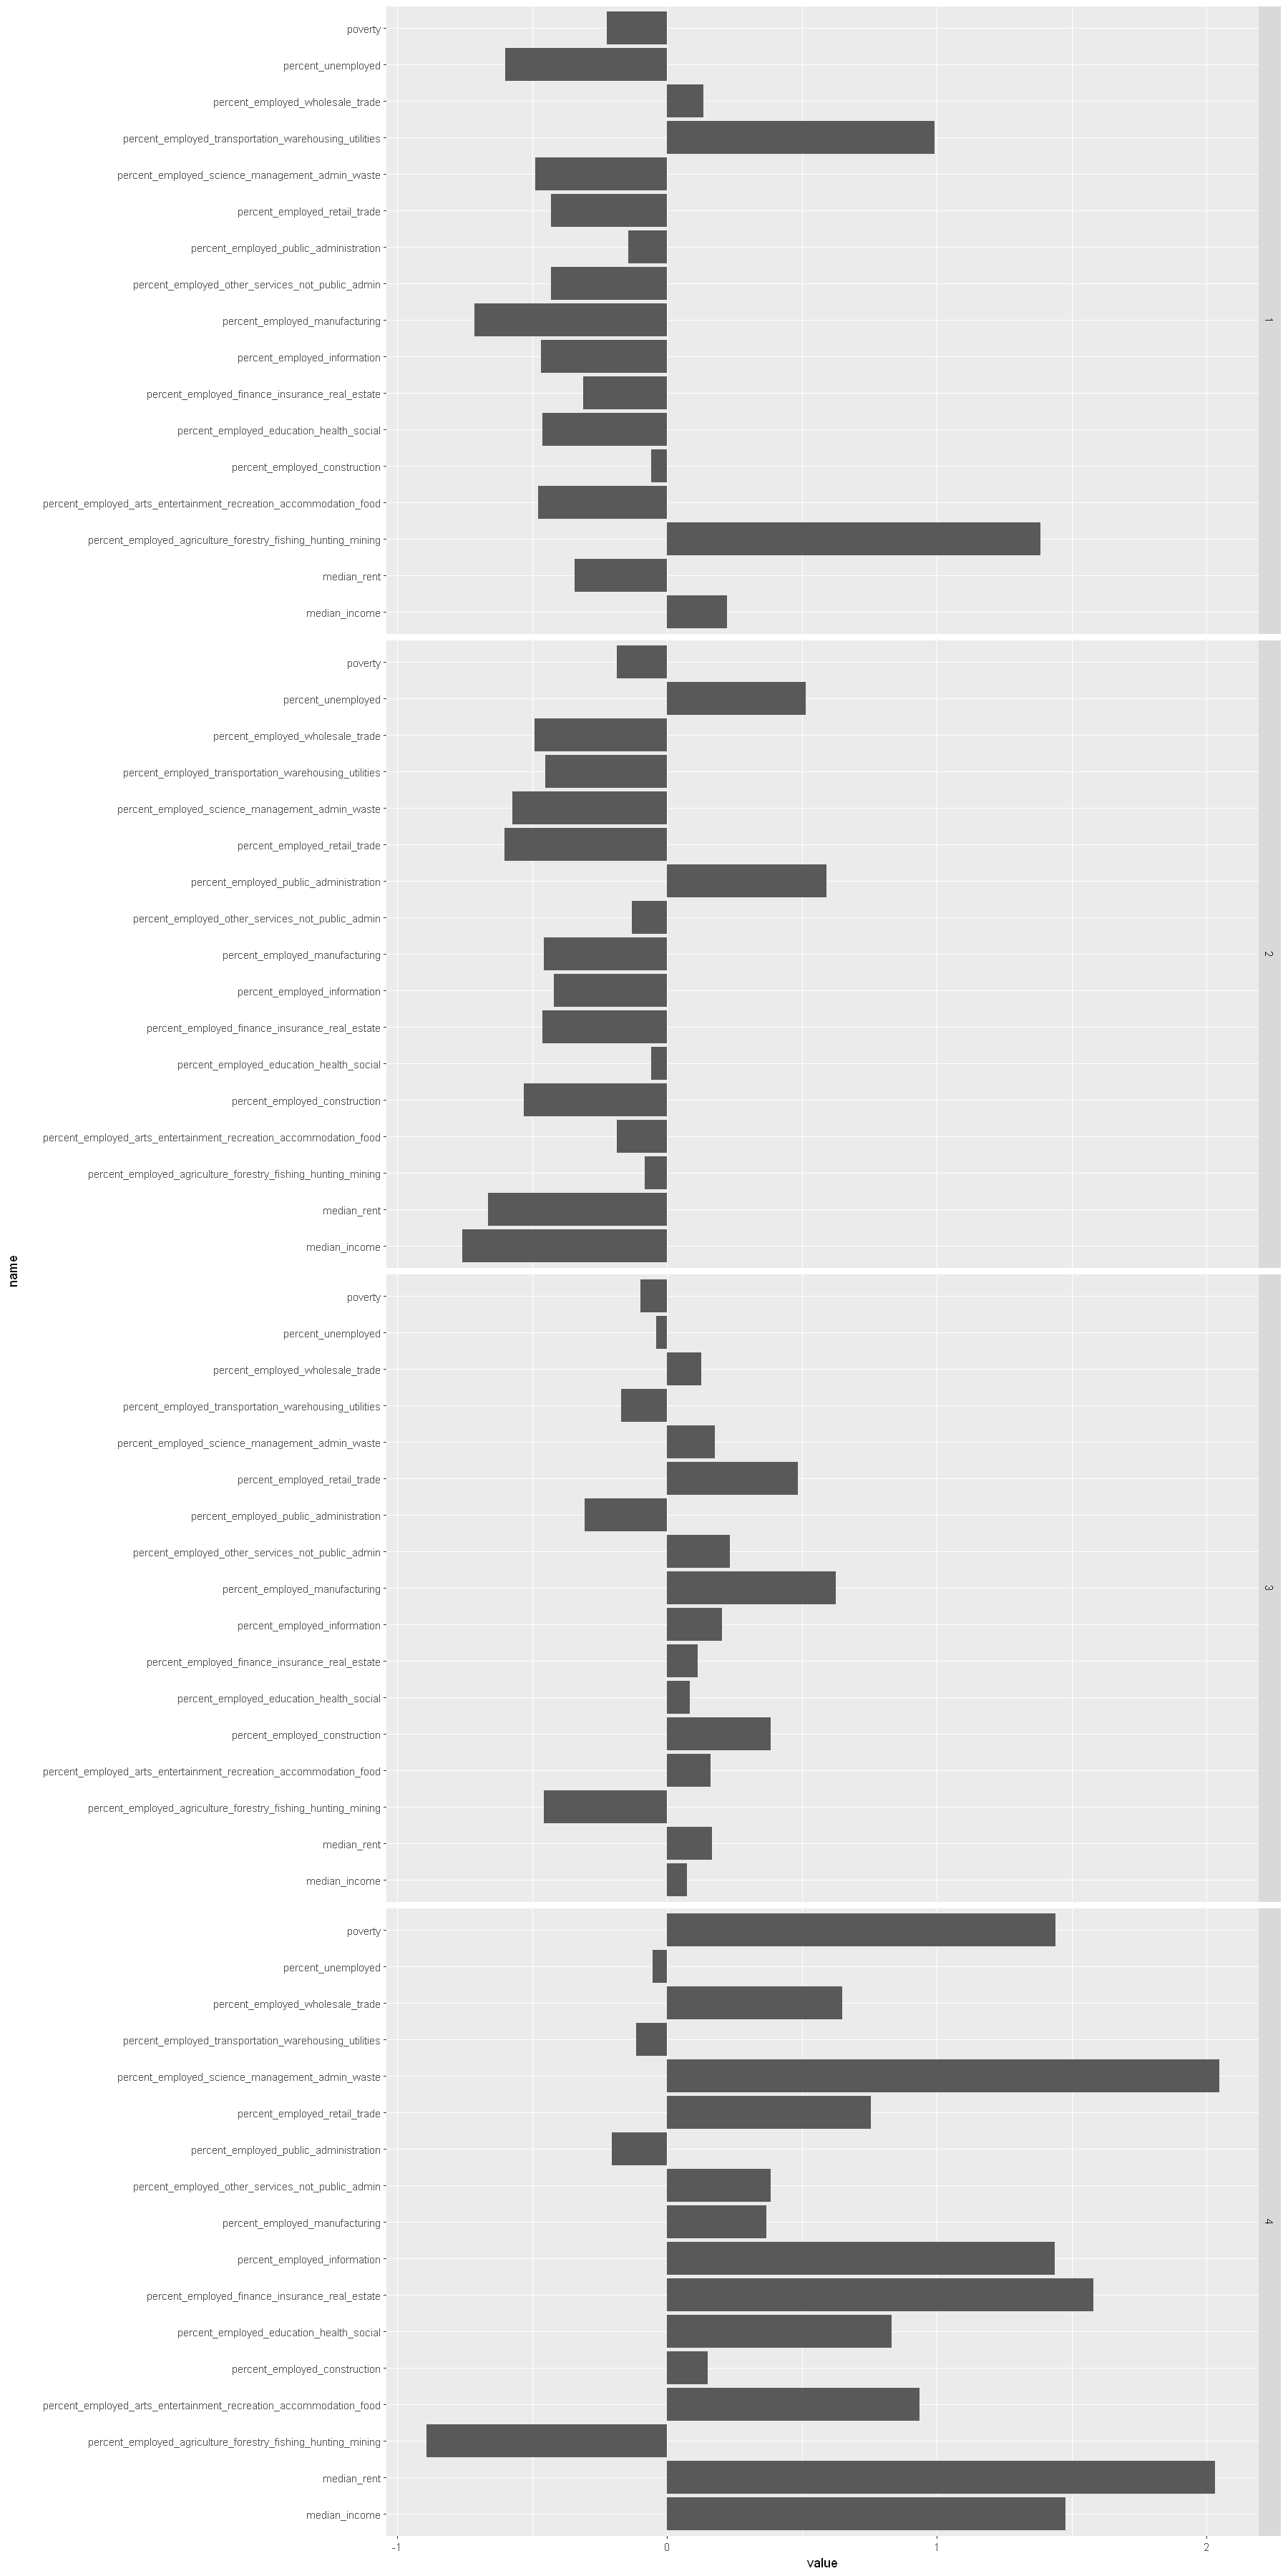

In [15]:
options(repr.plot.width = 15, repr.plot.height = 30)
ggplot(pivot_longer(as_tibble(km$centers,  rownames = "cluster"), 
  cols = colnames(km$centers)), 
  aes(y = name, x = value)) +
  geom_bar(stat = "identity") +
  facet_grid(rows = vars(cluster))

In [16]:
counties <- as_tibble(map_data("county"))
counties_TX <- counties %>% dplyr::filter(region == "texas") %>% 
  rename(c(county = subregion))

In [17]:
se_data <- se_data %>% mutate(county = county_name.x %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_TX_clust <- counties_TX %>% left_join(se_data %>% 
    add_column(cluster = factor(km$cluster)))

Joining, by = "county"


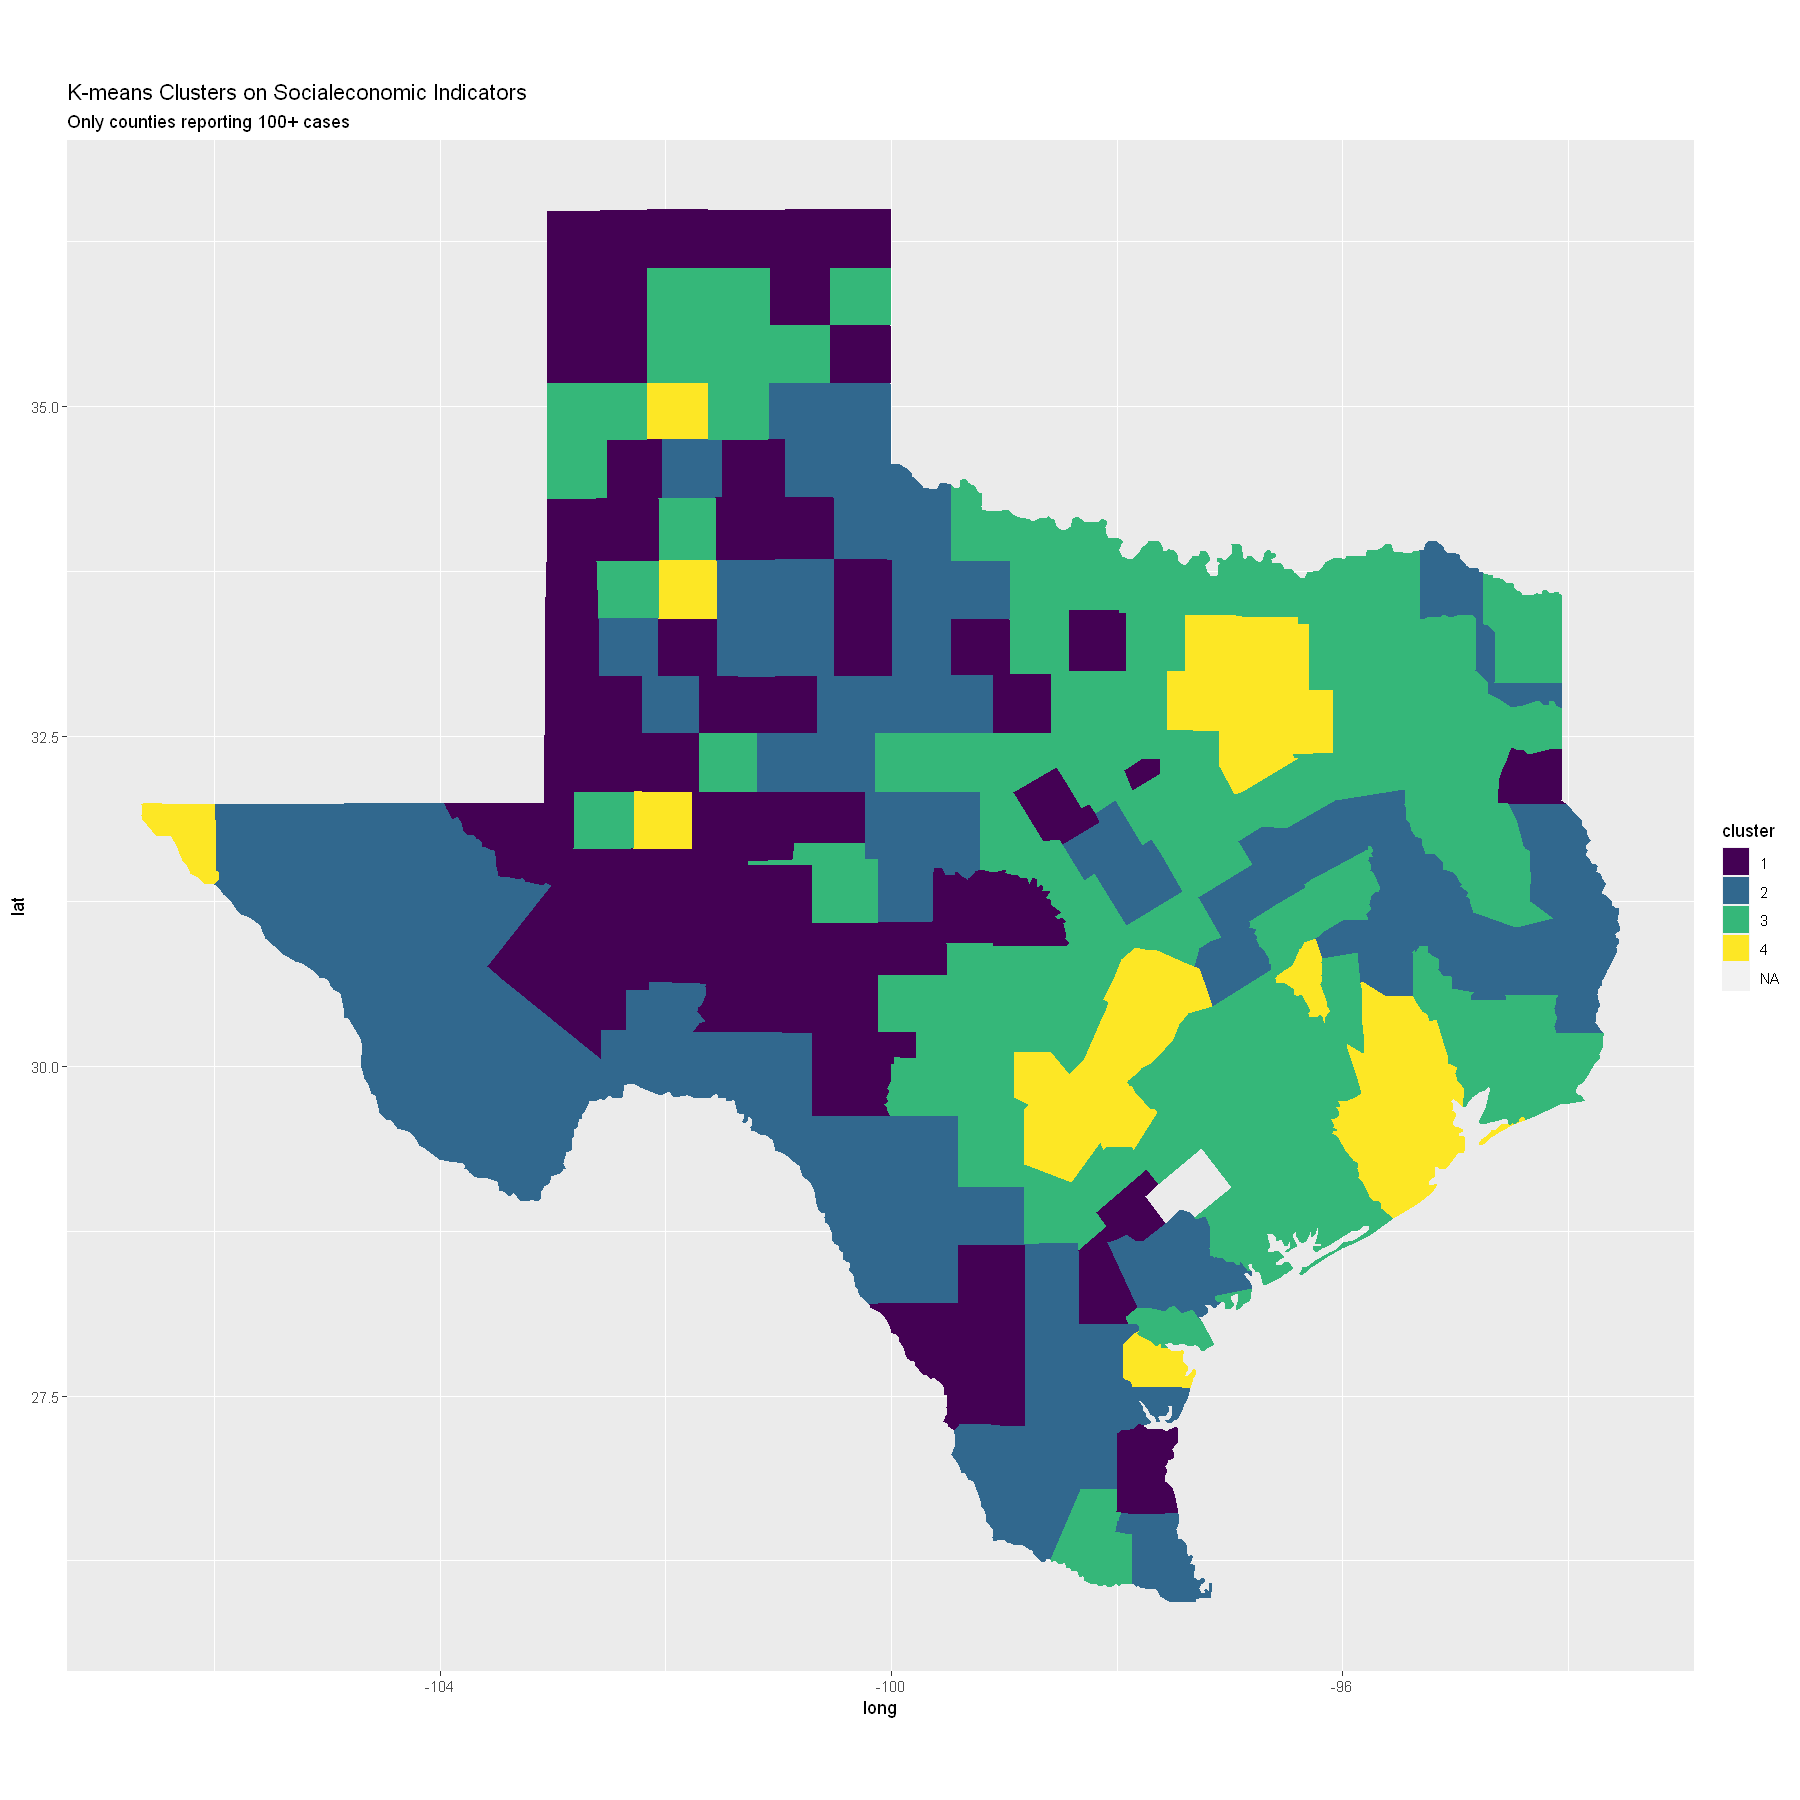

In [18]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_clust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "K-means Clusters on Socialeconomic Indicators", subtitle = "Only counties reporting 100+ cases")

In [19]:
se_data_km <- se_data %>% add_column(cluster = factor(km$cluster))

se_data_km %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,82.28162,2.210219,0.02739127
2,81.40534,2.148647,0.02838551
3,72.35499,1.654035,0.02352106
4,81.36782,1.032447,0.01267792


#### K-means Observations

We see a substaintial drop of deaths per cases in areas in cluster 4.
Areas of cluster 1 also has less average cases than other clusters

### Hierarchical Clustering

In [20]:
county_names <- se_data$county_name.x
summary(se_data_prepped)

 median_income        poverty         median_rent     
 Min.   :-2.0688   Min.   :-0.2618   Min.   :-2.2777  
 1st Qu.:-0.6238   1st Qu.:-0.2452   1st Qu.:-0.6760  
 Median :-0.1305   Median :-0.2195   Median :-0.1189  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4819   3rd Qu.:-0.1449   3rd Qu.: 0.4936  
 Max.   : 3.6060   Max.   :11.3992   Max.   : 3.5403  
 percent_employed_agriculture_forestry_fishing_hunting_mining
 Min.   :-1.1518                                             
 1st Qu.:-0.7294                                             
 Median :-0.2940                                             
 Mean   : 0.0000                                             
 3rd Qu.: 0.4591                                             
 Max.   : 5.1237                                             
 percent_employed_arts_entertainment_recreation_accommodation_food
 Min.   :-2.27150                                                 
 1st Qu.:-0.67314                              

In [21]:
dist_se_prepped <- dist(se_data_prepped)

In [22]:
dist_se_prepped <- dist(se_data_prepped)
hc <- hclust(dist_se_prepped, method="complete")

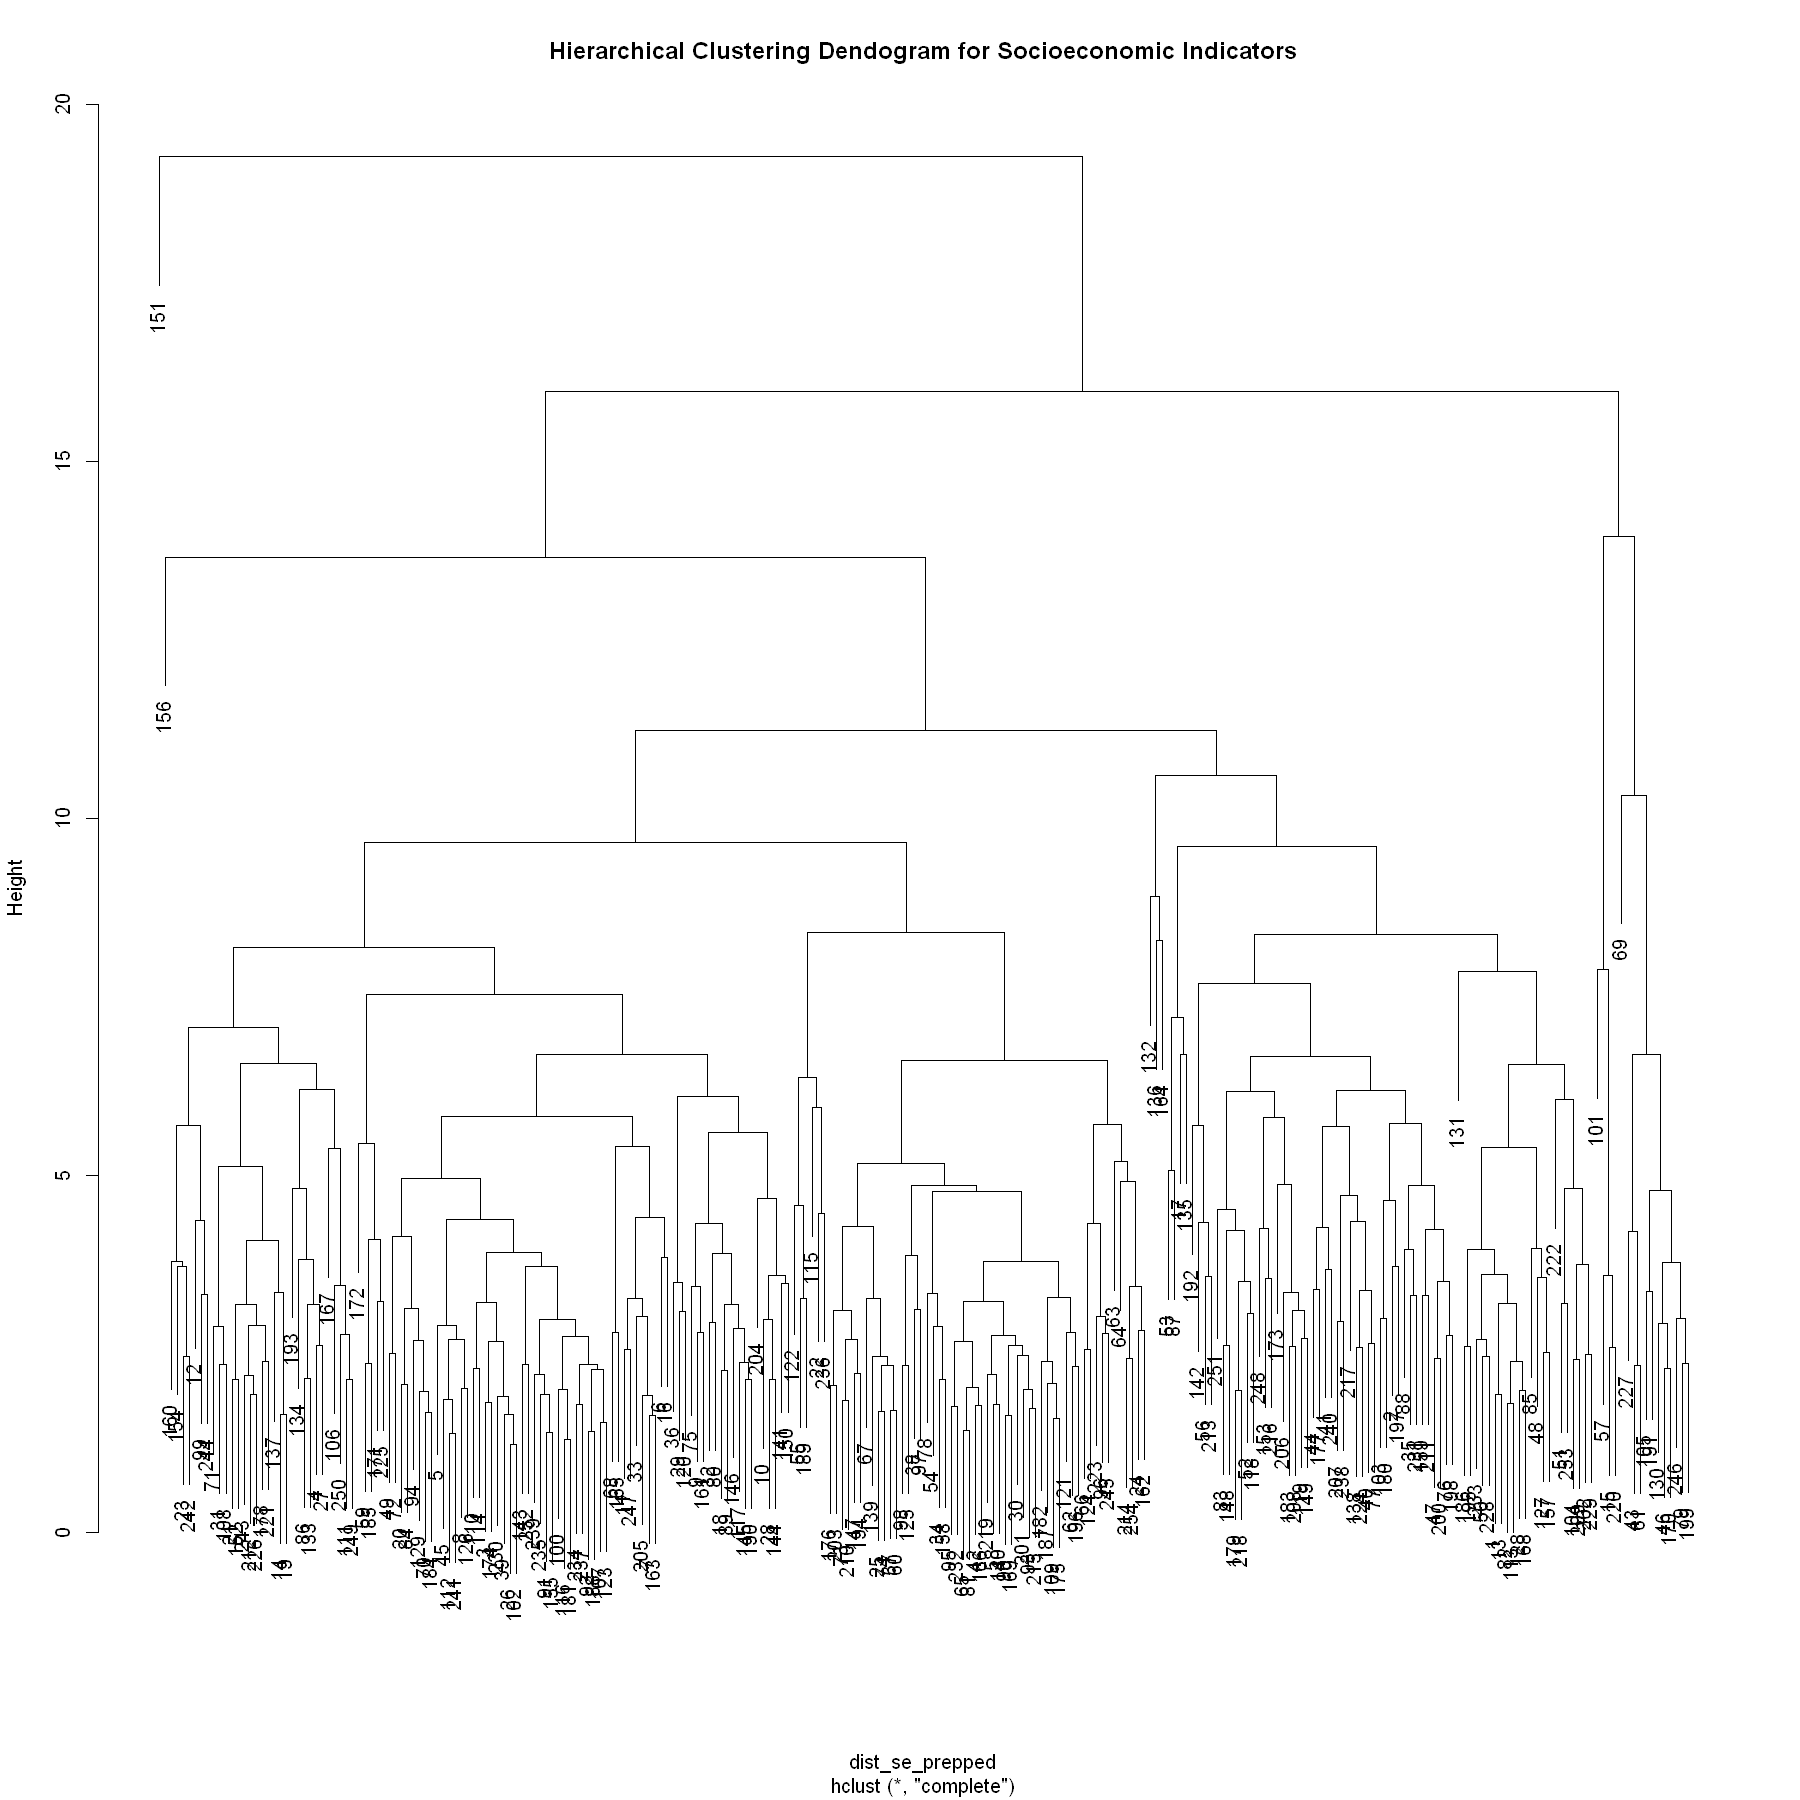

In [23]:
plot(hc, main = "Hierarchical Clustering Dendogram for Socioeconomic Indicators")

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


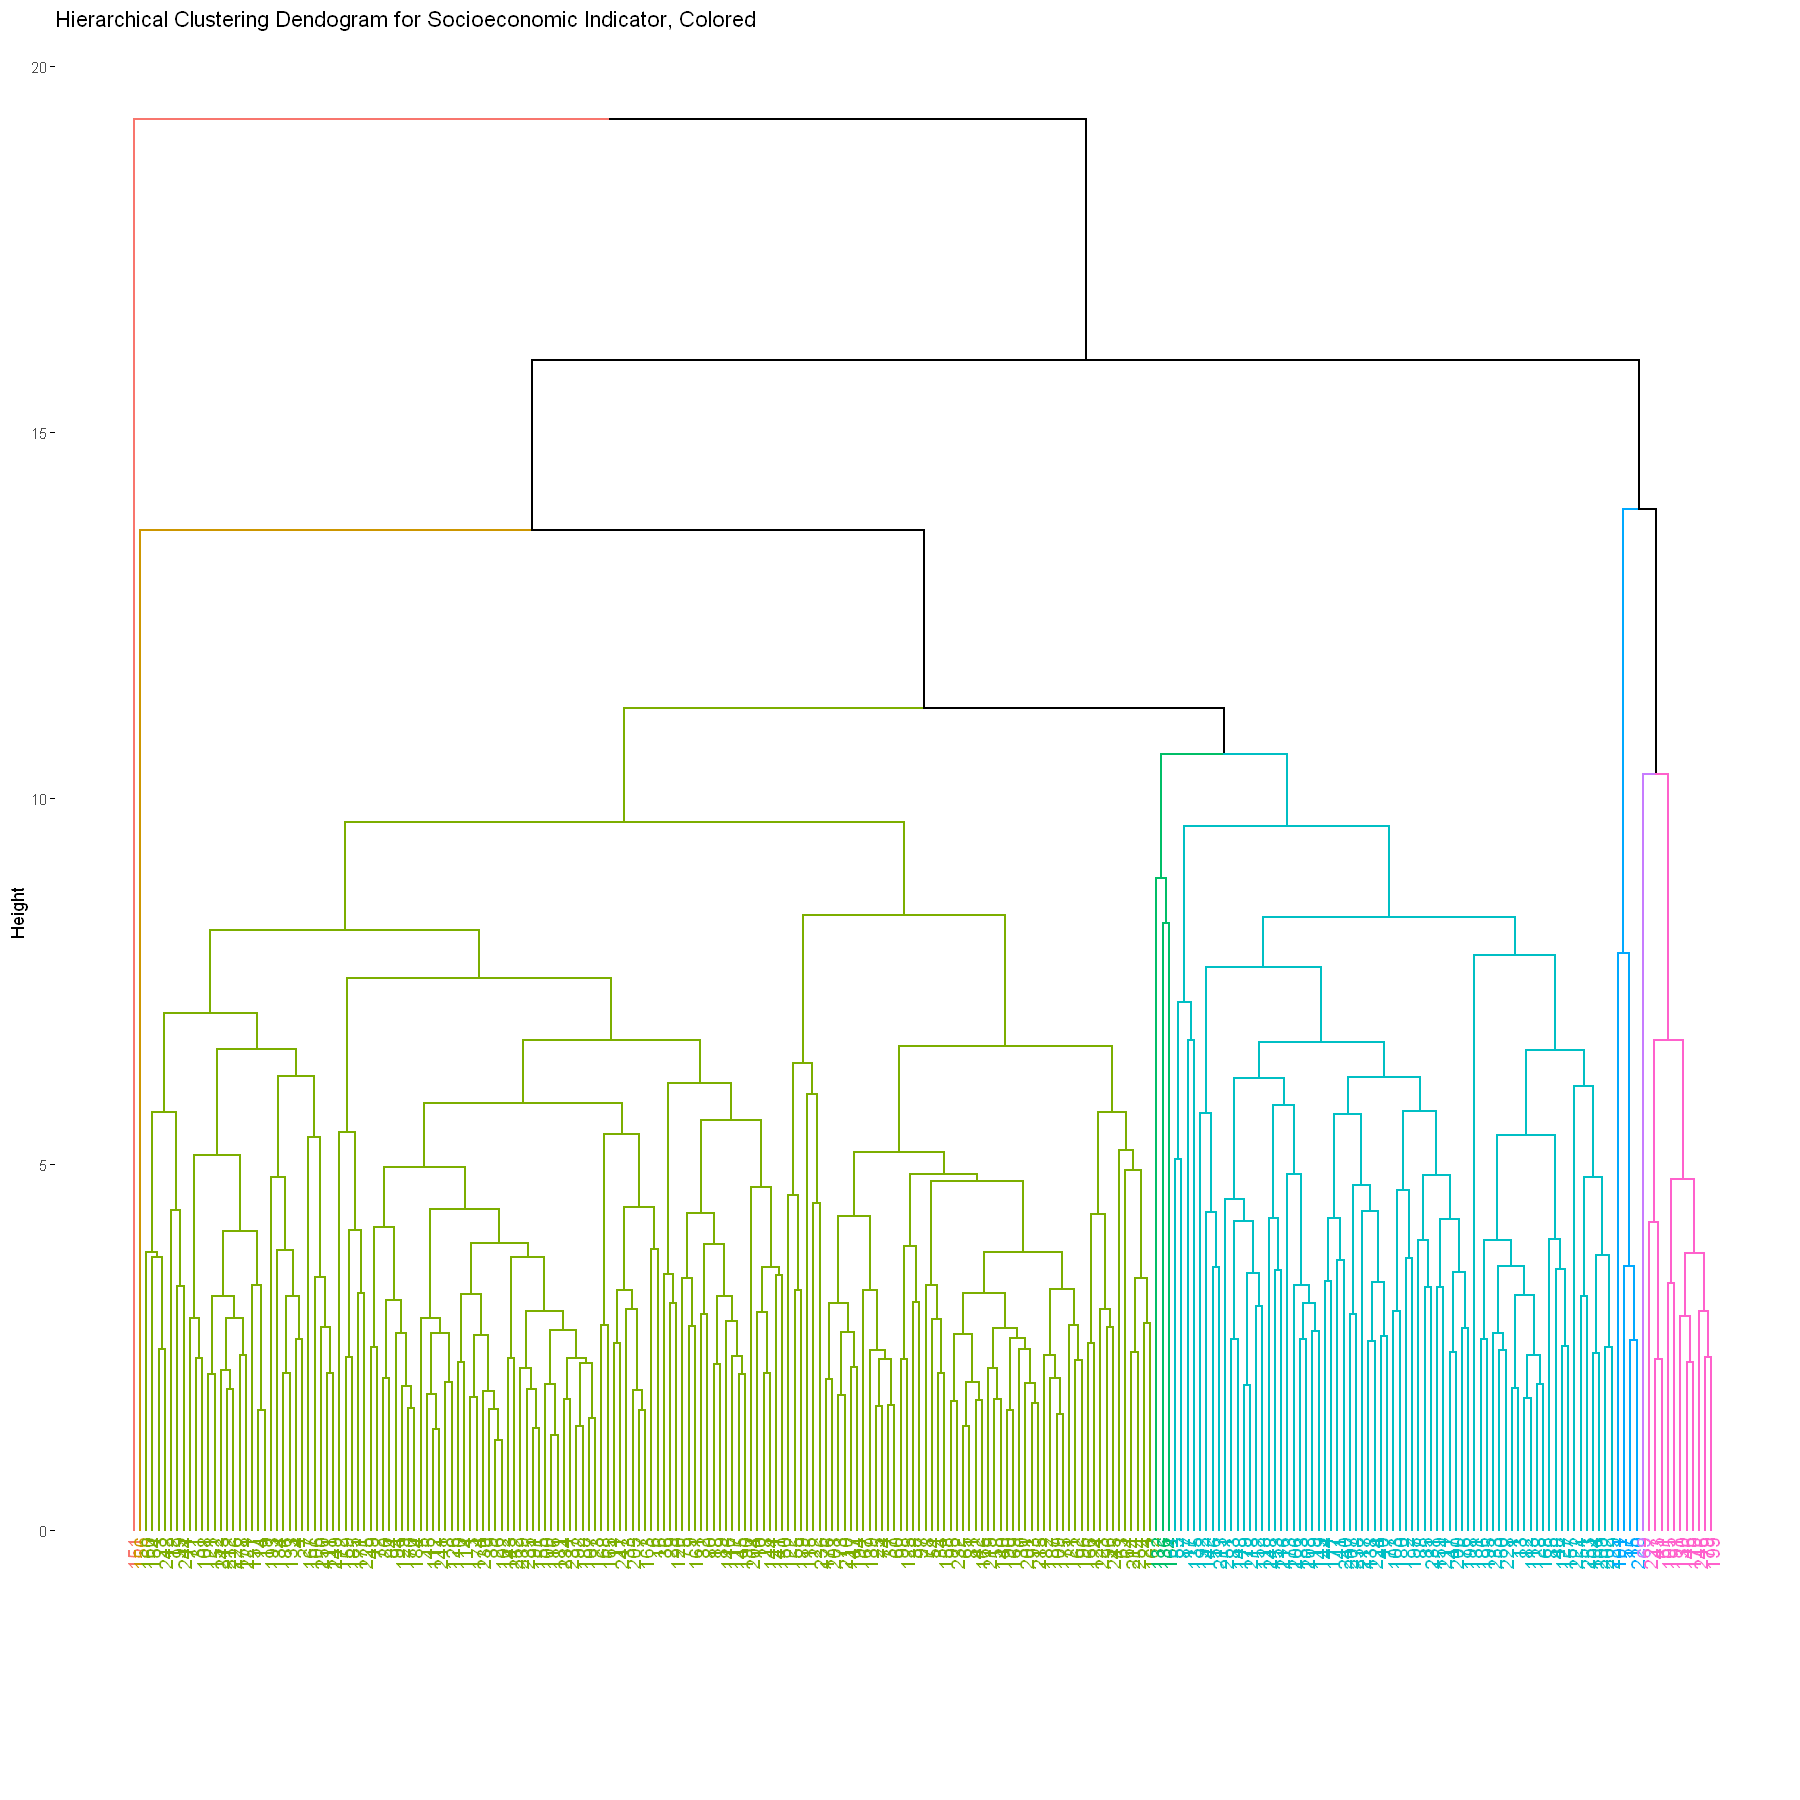

In [24]:
fviz_dend(hc, k=8, main="Hierarchical Clustering Dendogram for Socioeconomic Indicator, Colored")

In [419]:
h_clusters <- cutree(hc, k=8)
se_data_hclust <- se_data_prepped %>% add_column(cluster = factor(h_clusters))

In [420]:
se_data <- se_data %>% mutate(county = county_name.x %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_TX_hclust <- counties_TX %>% left_join(se_data %>% 
    add_column(cluster = se_data_hclust$cluster))

Joining, by = "county"


In [421]:
counties_TX_hclust

long,lat,group,order,region,county,county_name.x,cases_per_1000,deaths_per_1000,death_per_case,⋯,percent_employed_information,percent_employed_manufacturing,percent_employed_other_services_not_public_admin,percent_employed_public_administration,percent_employed_retail_trade,percent_employed_science_management_admin_waste,percent_employed_transportation_warehousing_utilities,percent_employed_wholesale_trade,percent_unemployed,cluster
<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-95.75271,31.53560,2492,74520,texas,anderson,Anderson County,96.54181,1.298769,0.01345291,⋯,-0.4592636,-0.6661024,-1.075822,0.8028068,1.267599,-0.2649101,-0.4903968,-0.4403689,-0.9317144,1
-95.76989,31.55852,2492,74521,texas,anderson,Anderson County,96.54181,1.298769,0.01345291,⋯,-0.4592636,-0.6661024,-1.075822,0.8028068,1.267599,-0.2649101,-0.4903968,-0.4403689,-0.9317144,1
-95.76416,31.58143,2492,74522,texas,anderson,Anderson County,96.54181,1.298769,0.01345291,⋯,-0.4592636,-0.6661024,-1.075822,0.8028068,1.267599,-0.2649101,-0.4903968,-0.4403689,-0.9317144,1
-95.72979,31.58143,2492,74523,texas,anderson,Anderson County,96.54181,1.298769,0.01345291,⋯,-0.4592636,-0.6661024,-1.075822,0.8028068,1.267599,-0.2649101,-0.4903968,-0.4403689,-0.9317144,1
-95.74698,31.61008,2492,74524,texas,anderson,Anderson County,96.54181,1.298769,0.01345291,⋯,-0.4592636,-0.6661024,-1.075822,0.8028068,1.267599,-0.2649101,-0.4903968,-0.4403689,-0.9317144,1
-95.72405,31.63873,2492,74525,texas,anderson,Anderson County,96.54181,1.298769,0.01345291,⋯,-0.4592636,-0.6661024,-1.075822,0.8028068,1.267599,-0.2649101,-0.4903968,-0.4403689,-0.9317144,1
-95.75271,31.67311,2492,74526,texas,anderson,Anderson County,96.54181,1.298769,0.01345291,⋯,-0.4592636,-0.6661024,-1.075822,0.8028068,1.267599,-0.2649101,-0.4903968,-0.4403689,-0.9317144,1
-95.76989,31.66738,2492,74527,texas,anderson,Anderson County,96.54181,1.298769,0.01345291,⋯,-0.4592636,-0.6661024,-1.075822,0.8028068,1.267599,-0.2649101,-0.4903968,-0.4403689,-0.9317144,1
-95.77563,31.63300,2492,74528,texas,anderson,Anderson County,96.54181,1.298769,0.01345291,⋯,-0.4592636,-0.6661024,-1.075822,0.8028068,1.267599,-0.2649101,-0.4903968,-0.4403689,-0.9317144,1


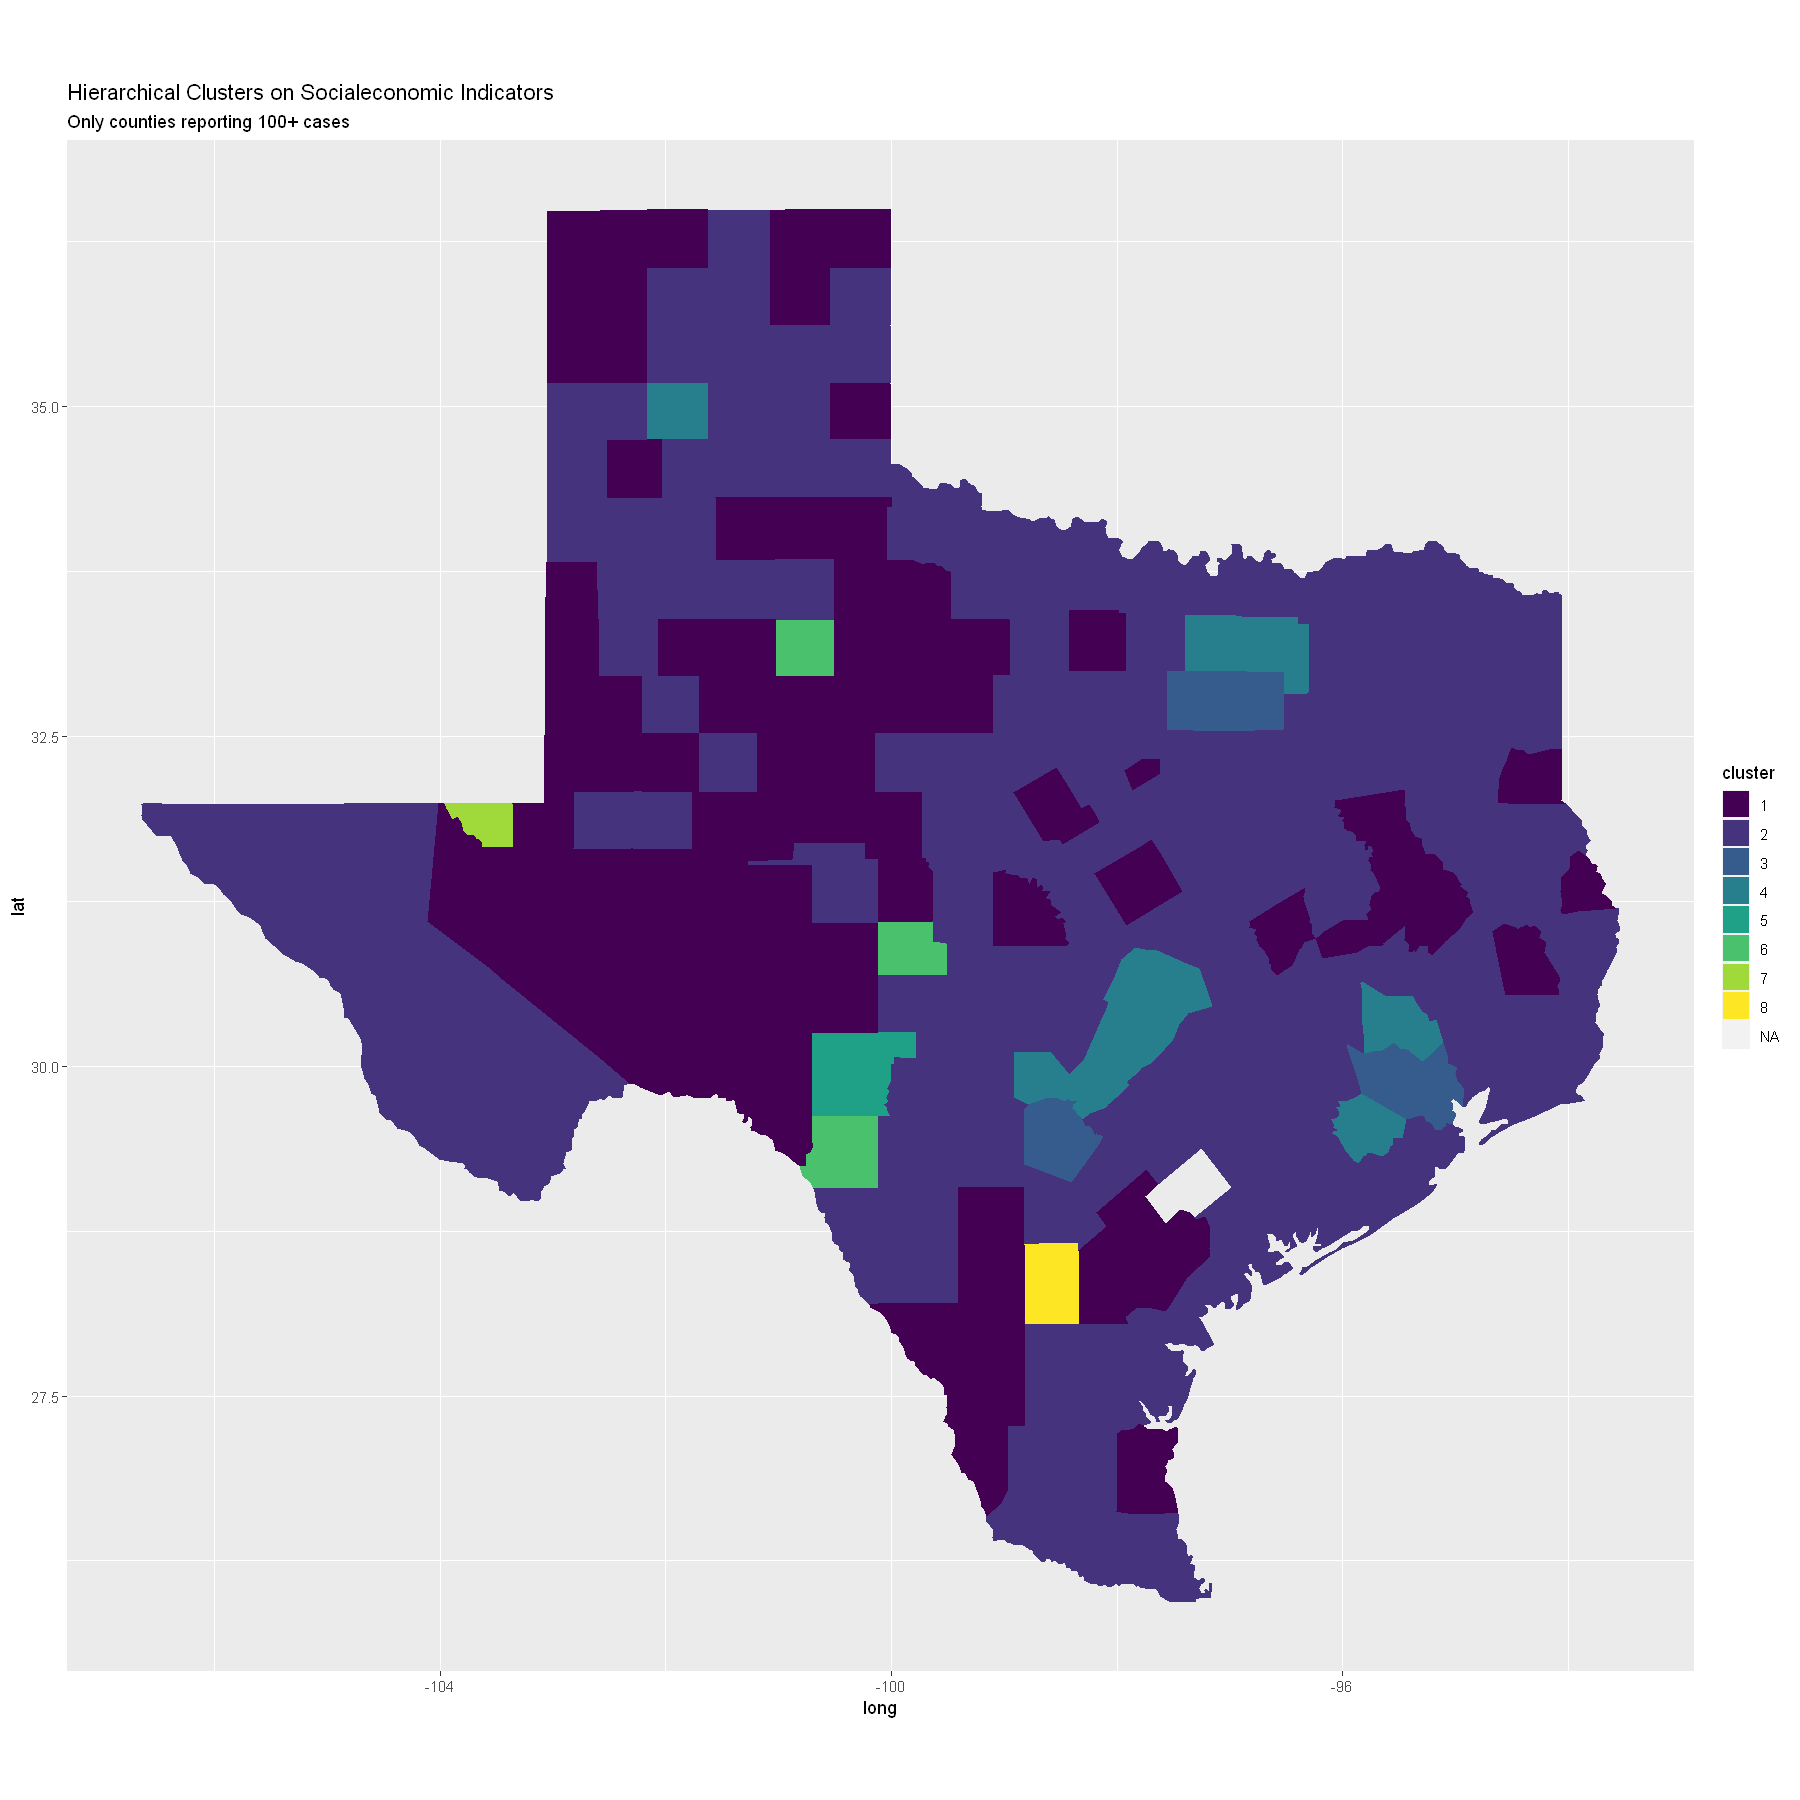

In [422]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_hclust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Hierarchical Clusters on Socialeconomic Indicators", subtitle = "Only counties reporting 100+ cases")

In [423]:
se_data_hc <- se_data %>% add_column(cluster = se_data_hclust$cluster)

se_data_hc %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,80.28430,2.1165843,0.02792868
2,77.41894,1.8437117,0.02474199
3,83.55739,0.9477385,0.01160231
4,68.08102,0.8240221,0.01250070
5,98.05779,1.4211274,0.01449275
6,85.28016,1.5506549,0.01803719
7,13.51351,0.0000000,0.00000000
8,116.66667,3.3333333,0.02857143


#### Hiarch Clustering Obervations

> Very low average cases per 1000 in cluster 7

> High deaths and cases for 8

> High cases for 5

### Fuzzy Clustering

In [476]:
install.packages("e1071")
library(e1071)

Warning message:
"package 'e1071' is in use and will not be installed"


In [477]:
fc <- cmeans(as.matrix(se_data_prepped), centers = 4)
fc

Fuzzy c-means clustering with 2 clusters

Cluster centers:
  median_income       poverty   median_rent
1  0.0018501982  0.0006612530  0.0025917282
2 -0.0007635996 -0.0002730620 -0.0010691817
3 -0.0007979011 -0.0002853216 -0.0011171920
4 -0.0002886914 -0.0001033218 -0.0004043863
  percent_employed_agriculture_forestry_fishing_hunting_mining
1                                                -0.0019742141
2                                                 0.0008142948
3                                                 0.0008508983
4                                                 0.0003075393
  percent_employed_arts_entertainment_recreation_accommodation_food
1                                                      0.0016625220
2                                                     -0.0006860024
3                                                     -0.0007168214
4                                                     -0.0002593077
  percent_employed_construction percent_employed_education_health_

In [478]:
se_data_fc <- se_data %>% add_column(cluster = fc$membership)

In [479]:
counties_TX_fc <- counties_TX %>% left_join(se_data_fc)

Joining, by = "county"


In [480]:
fc_clust_1 <- counties_TX_fc %>% mutate(cluster = cluster[,1])
fc_clust_2 <- counties_TX_fc %>% mutate(cluster = cluster[,2])
fc_clust_3 <- counties_TX_fc %>% mutate(cluster = cluster[,3])
fc_clust_4 <- counties_TX_fc %>% mutate(cluster = cluster[,4])

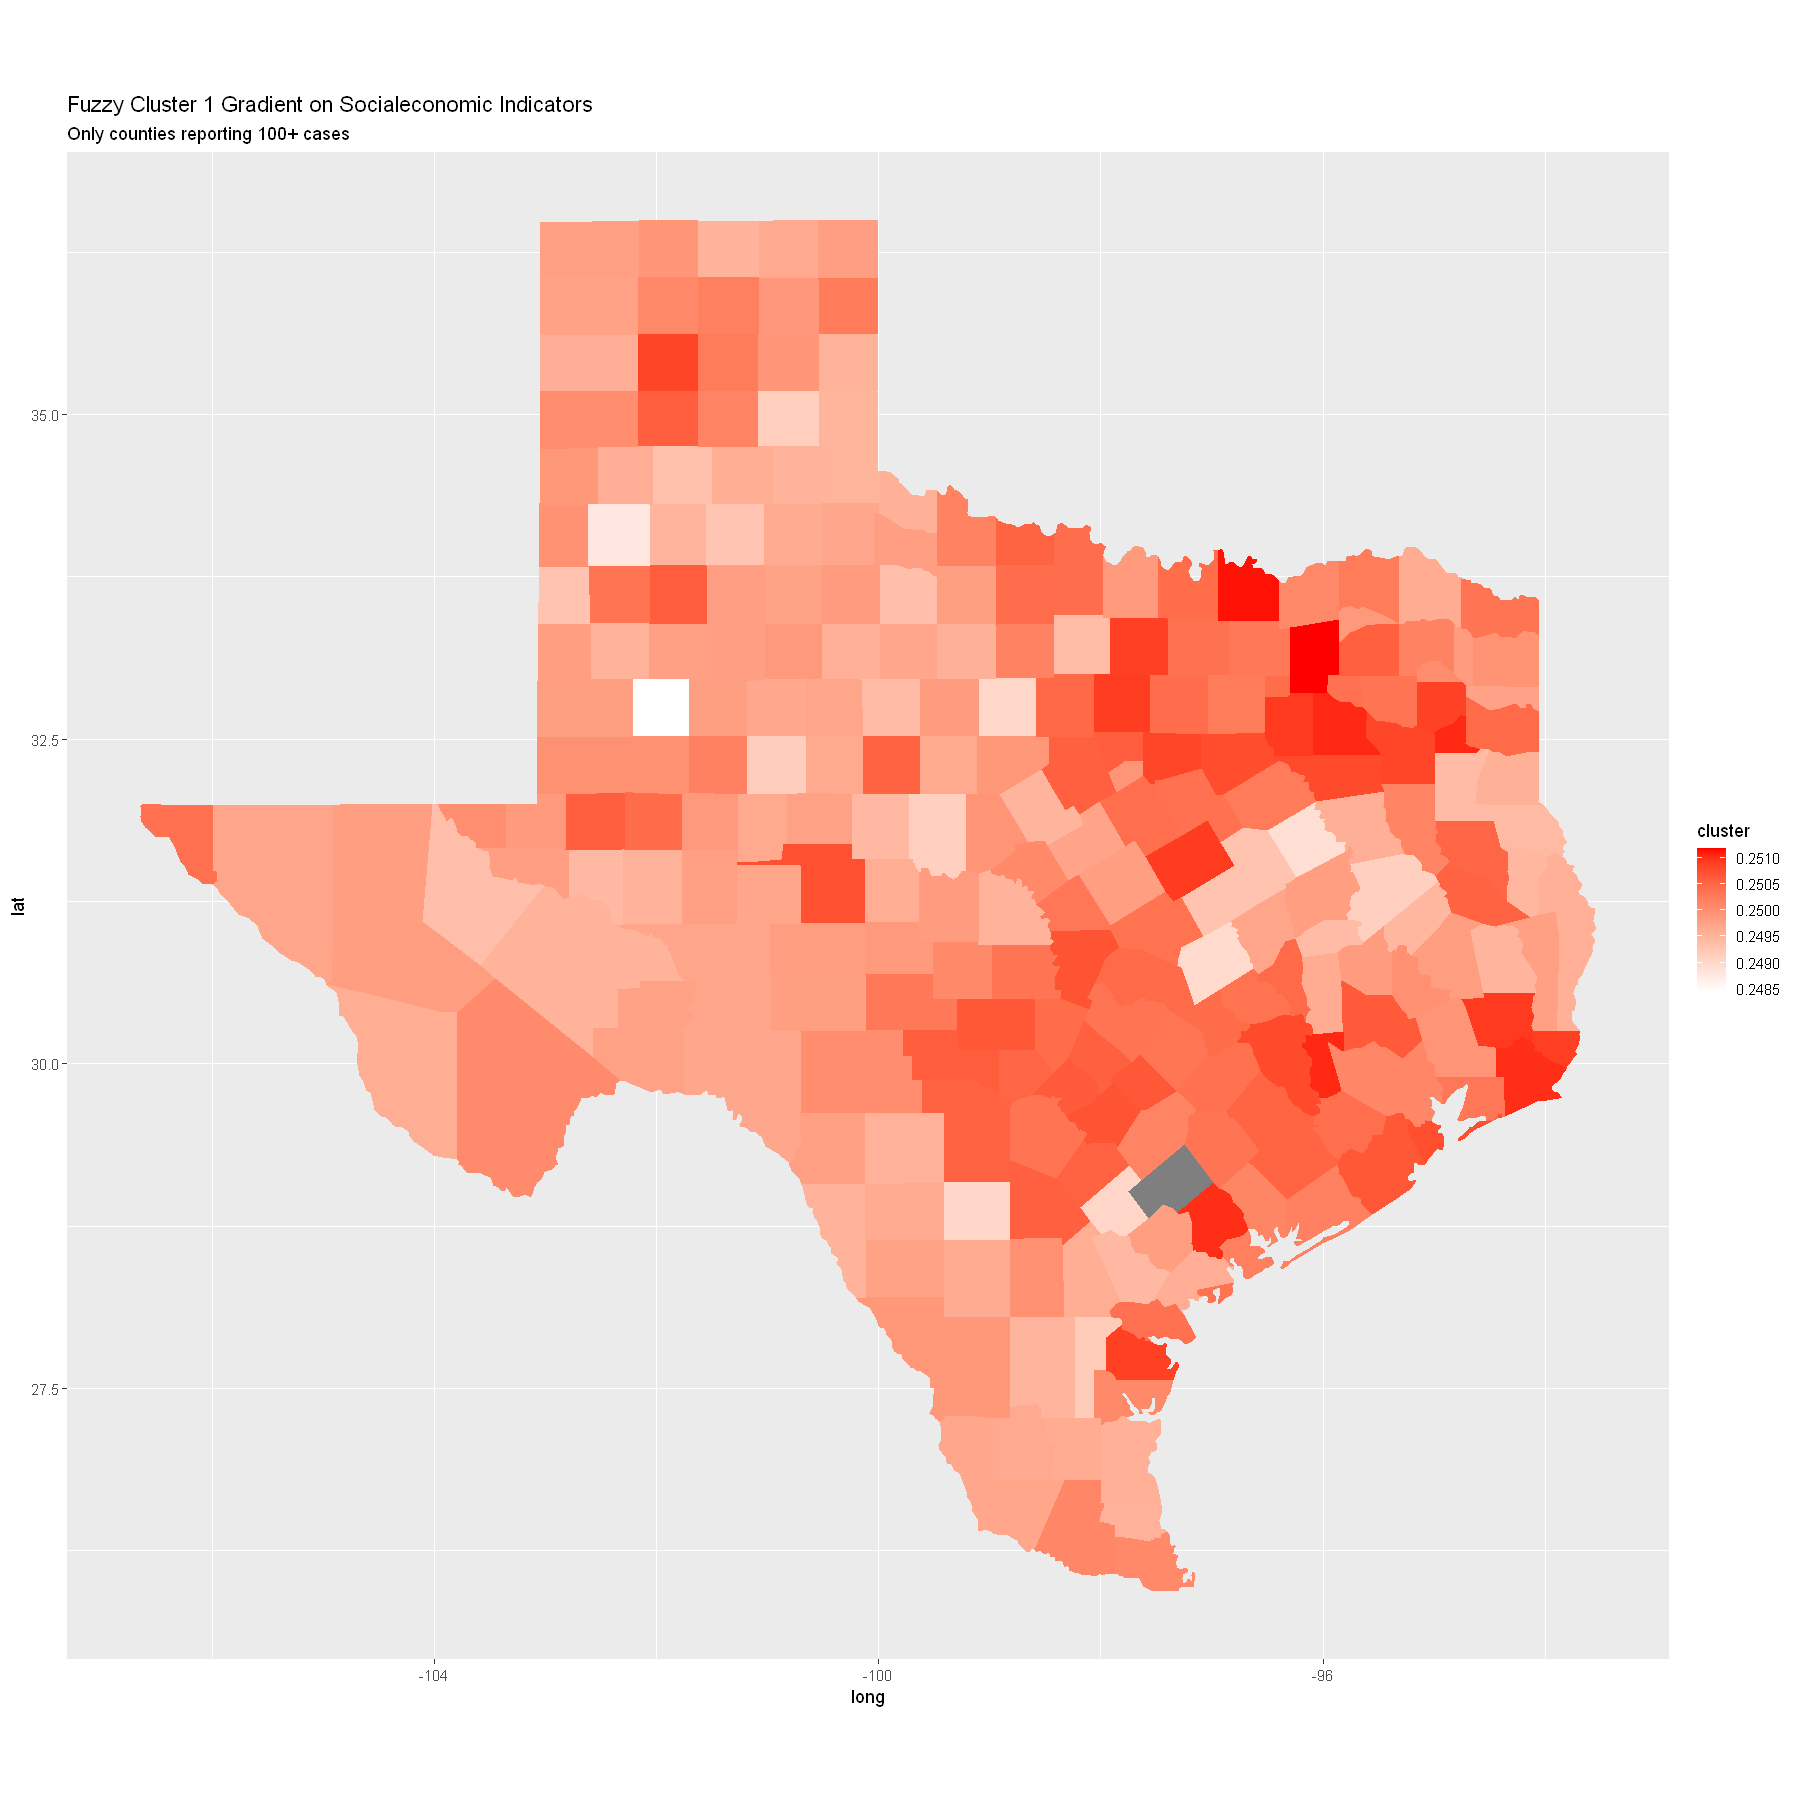

In [481]:
ggplot(fc_clust_1, aes(long, lat)) + 
  geom_polygon(data = fc_clust_1, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "red") +
  labs(title = "Fuzzy Cluster 1 Gradient on Socialeconomic Indicators", subtitle = "Only counties reporting 100+ cases")

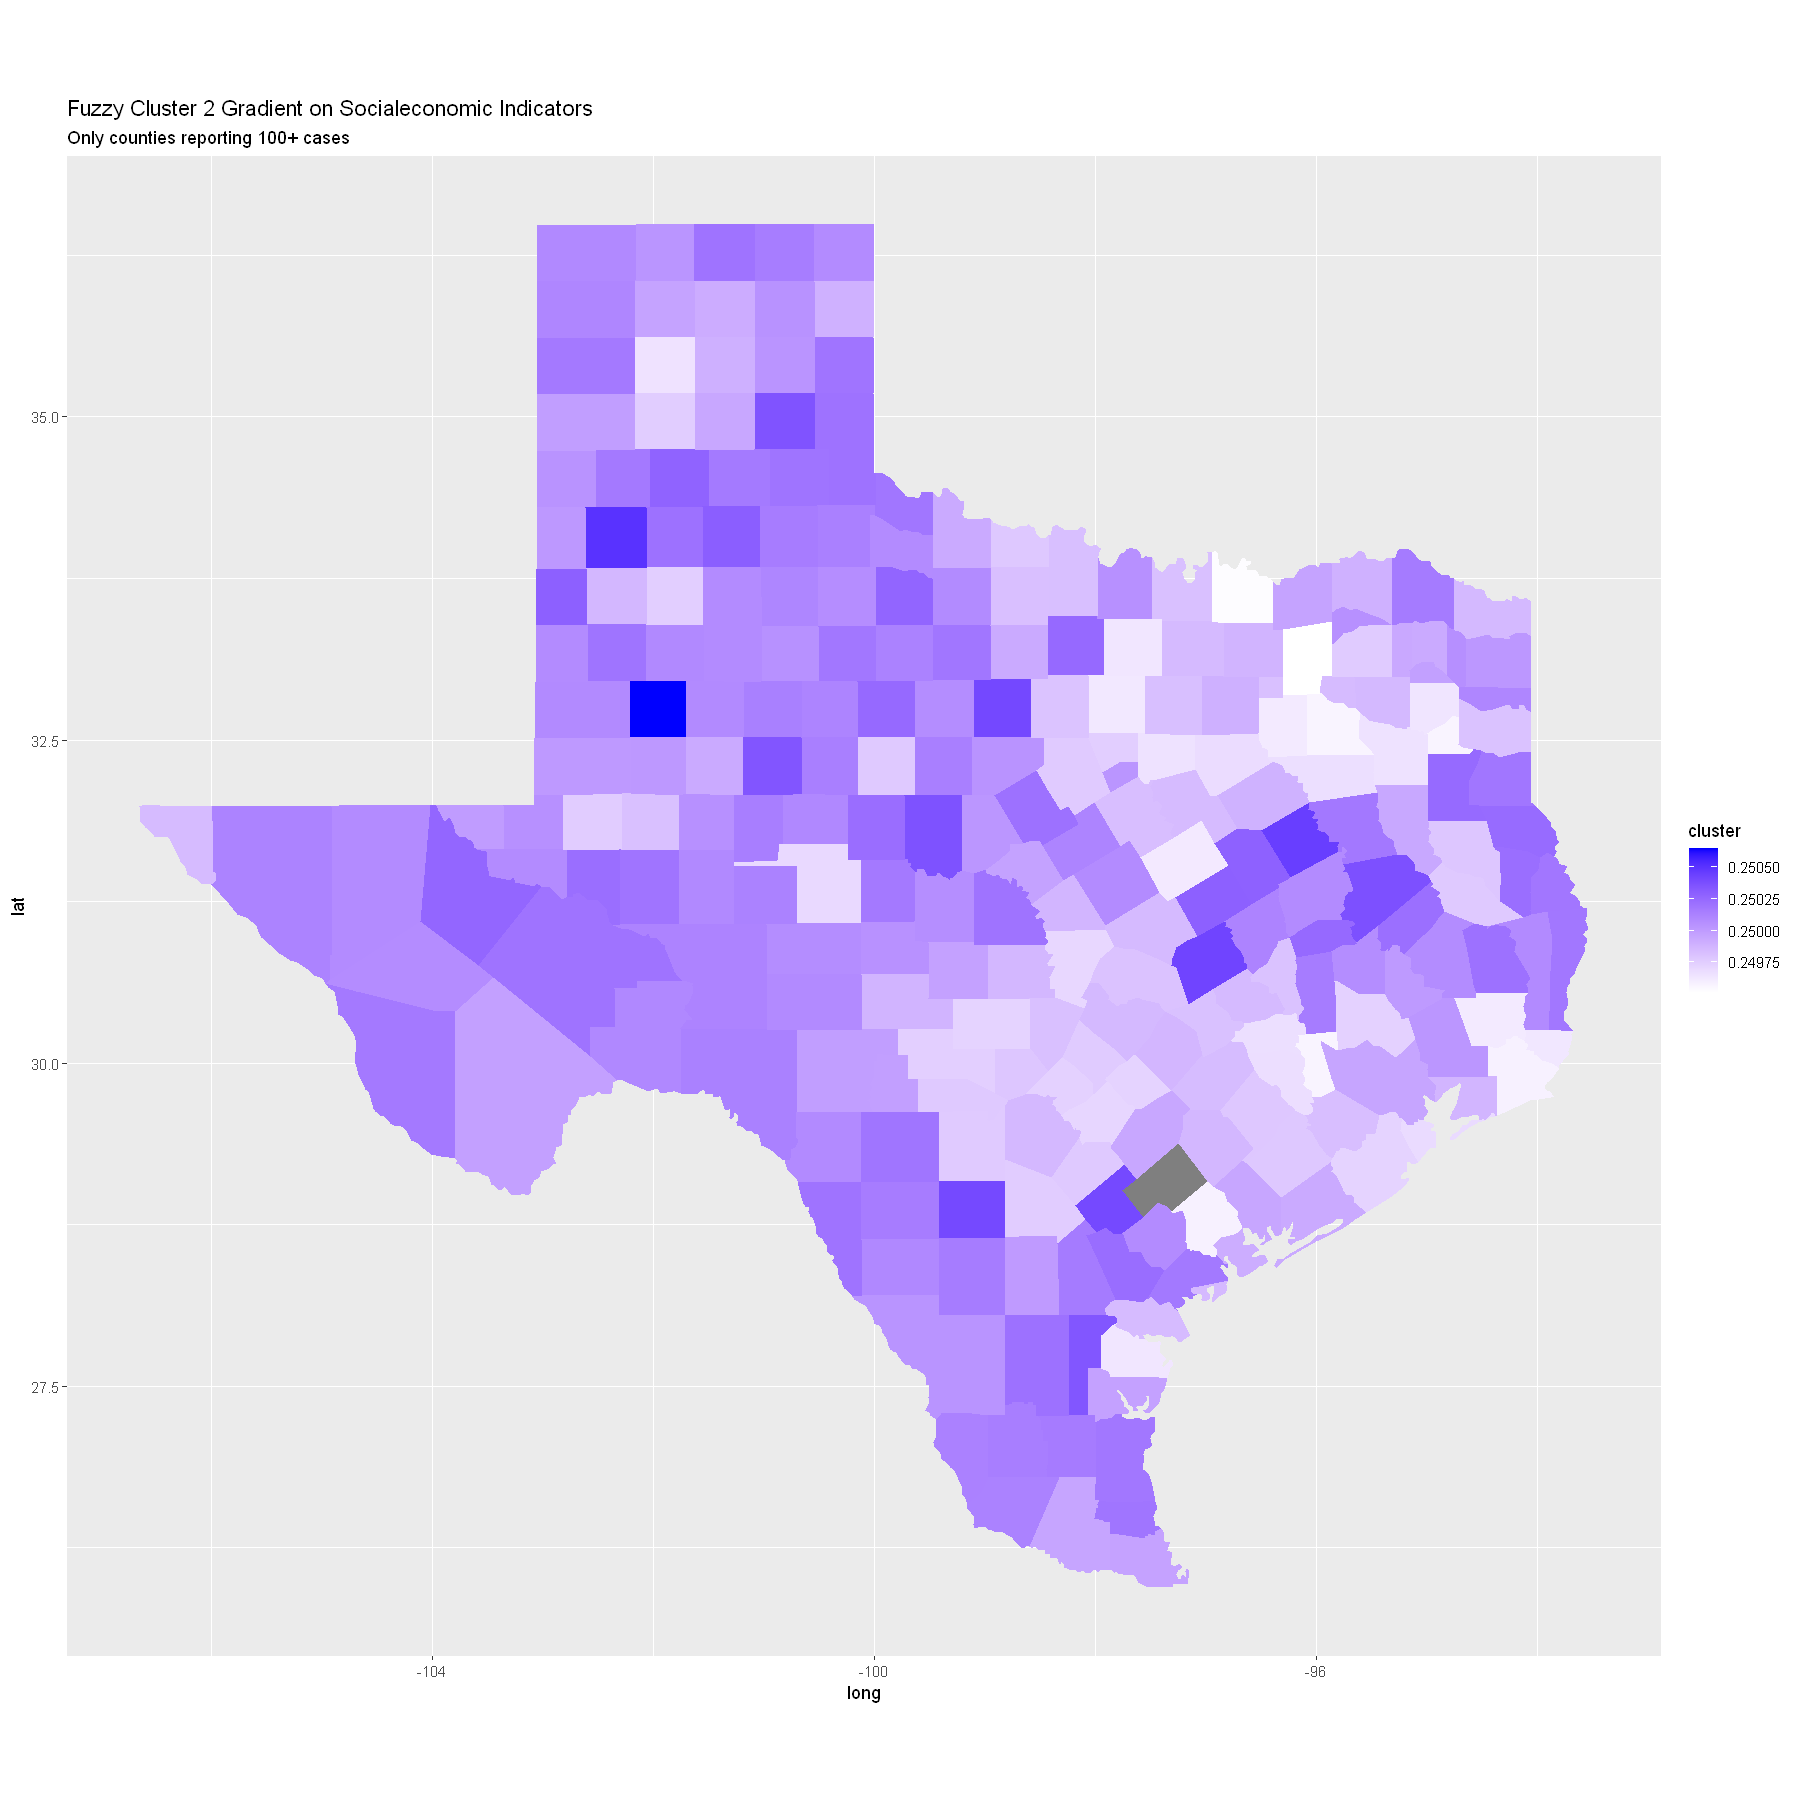

In [482]:
ggplot(fc_clust_2, aes(long, lat)) + 
  geom_polygon(data = fc_clust_2, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "blue") +
  labs(title = "Fuzzy Cluster 2 Gradient on Socialeconomic Indicators", subtitle = "Only counties reporting 100+ cases")

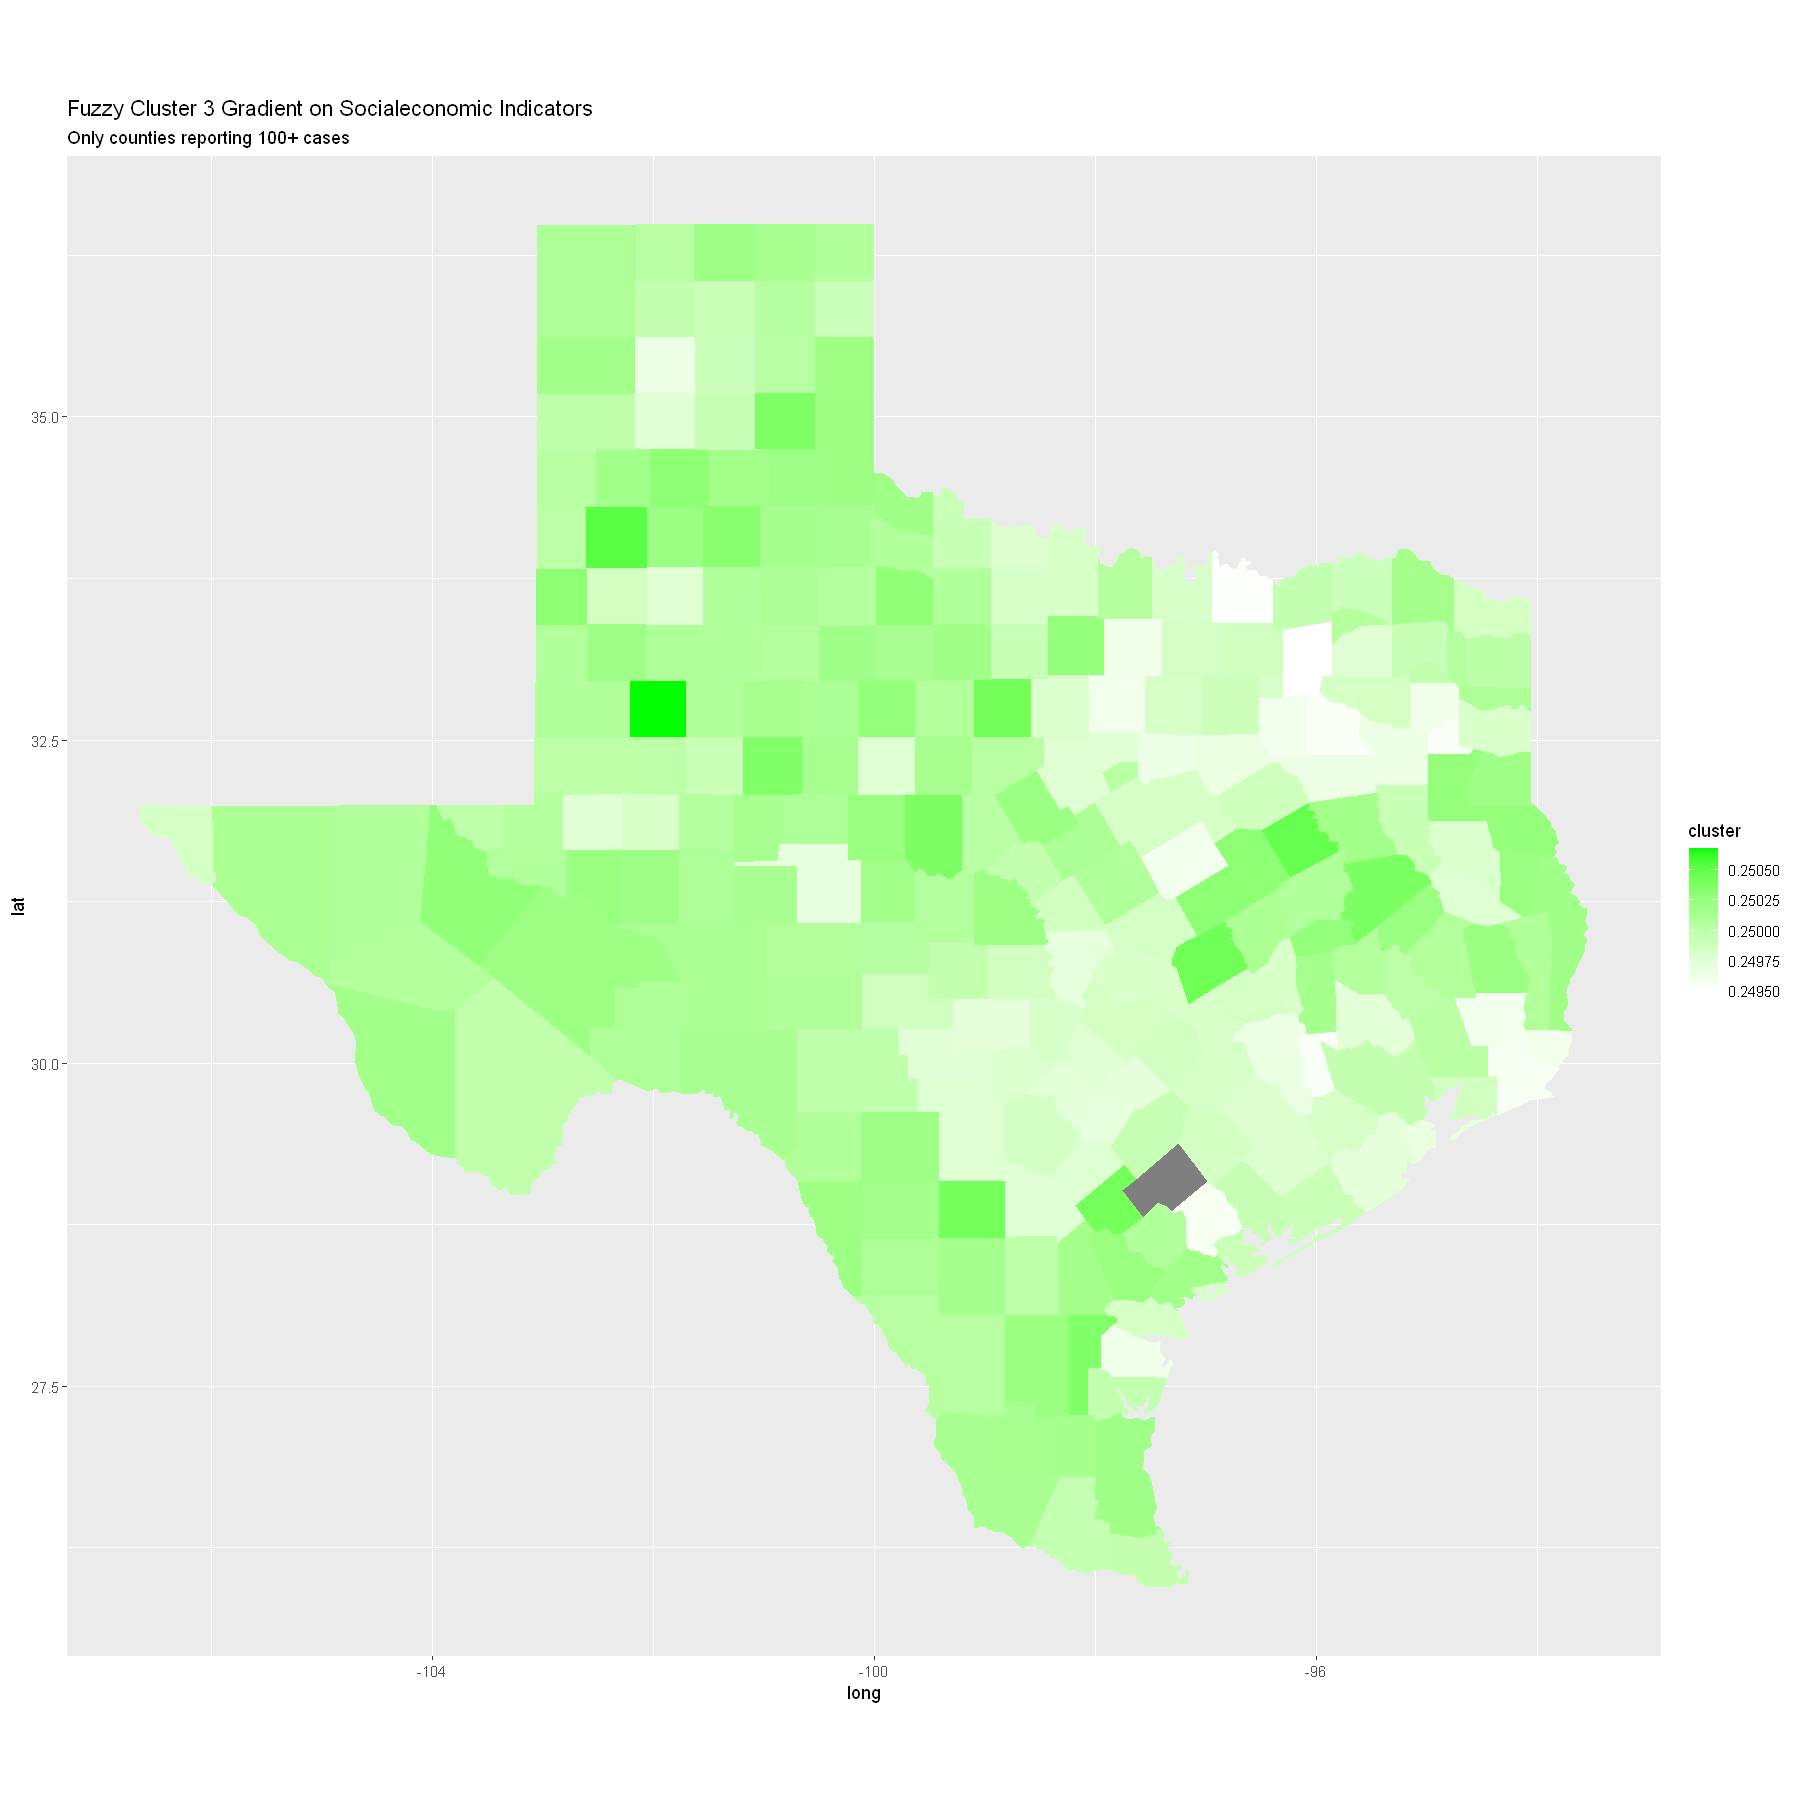

In [483]:
ggplot(fc_clust_3, aes(long, lat)) + 
  geom_polygon(data = fc_clust_3, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "green") +
  labs(title = "Fuzzy Cluster 3 Gradient on Socialeconomic Indicators", subtitle = "Only counties reporting 100+ cases")

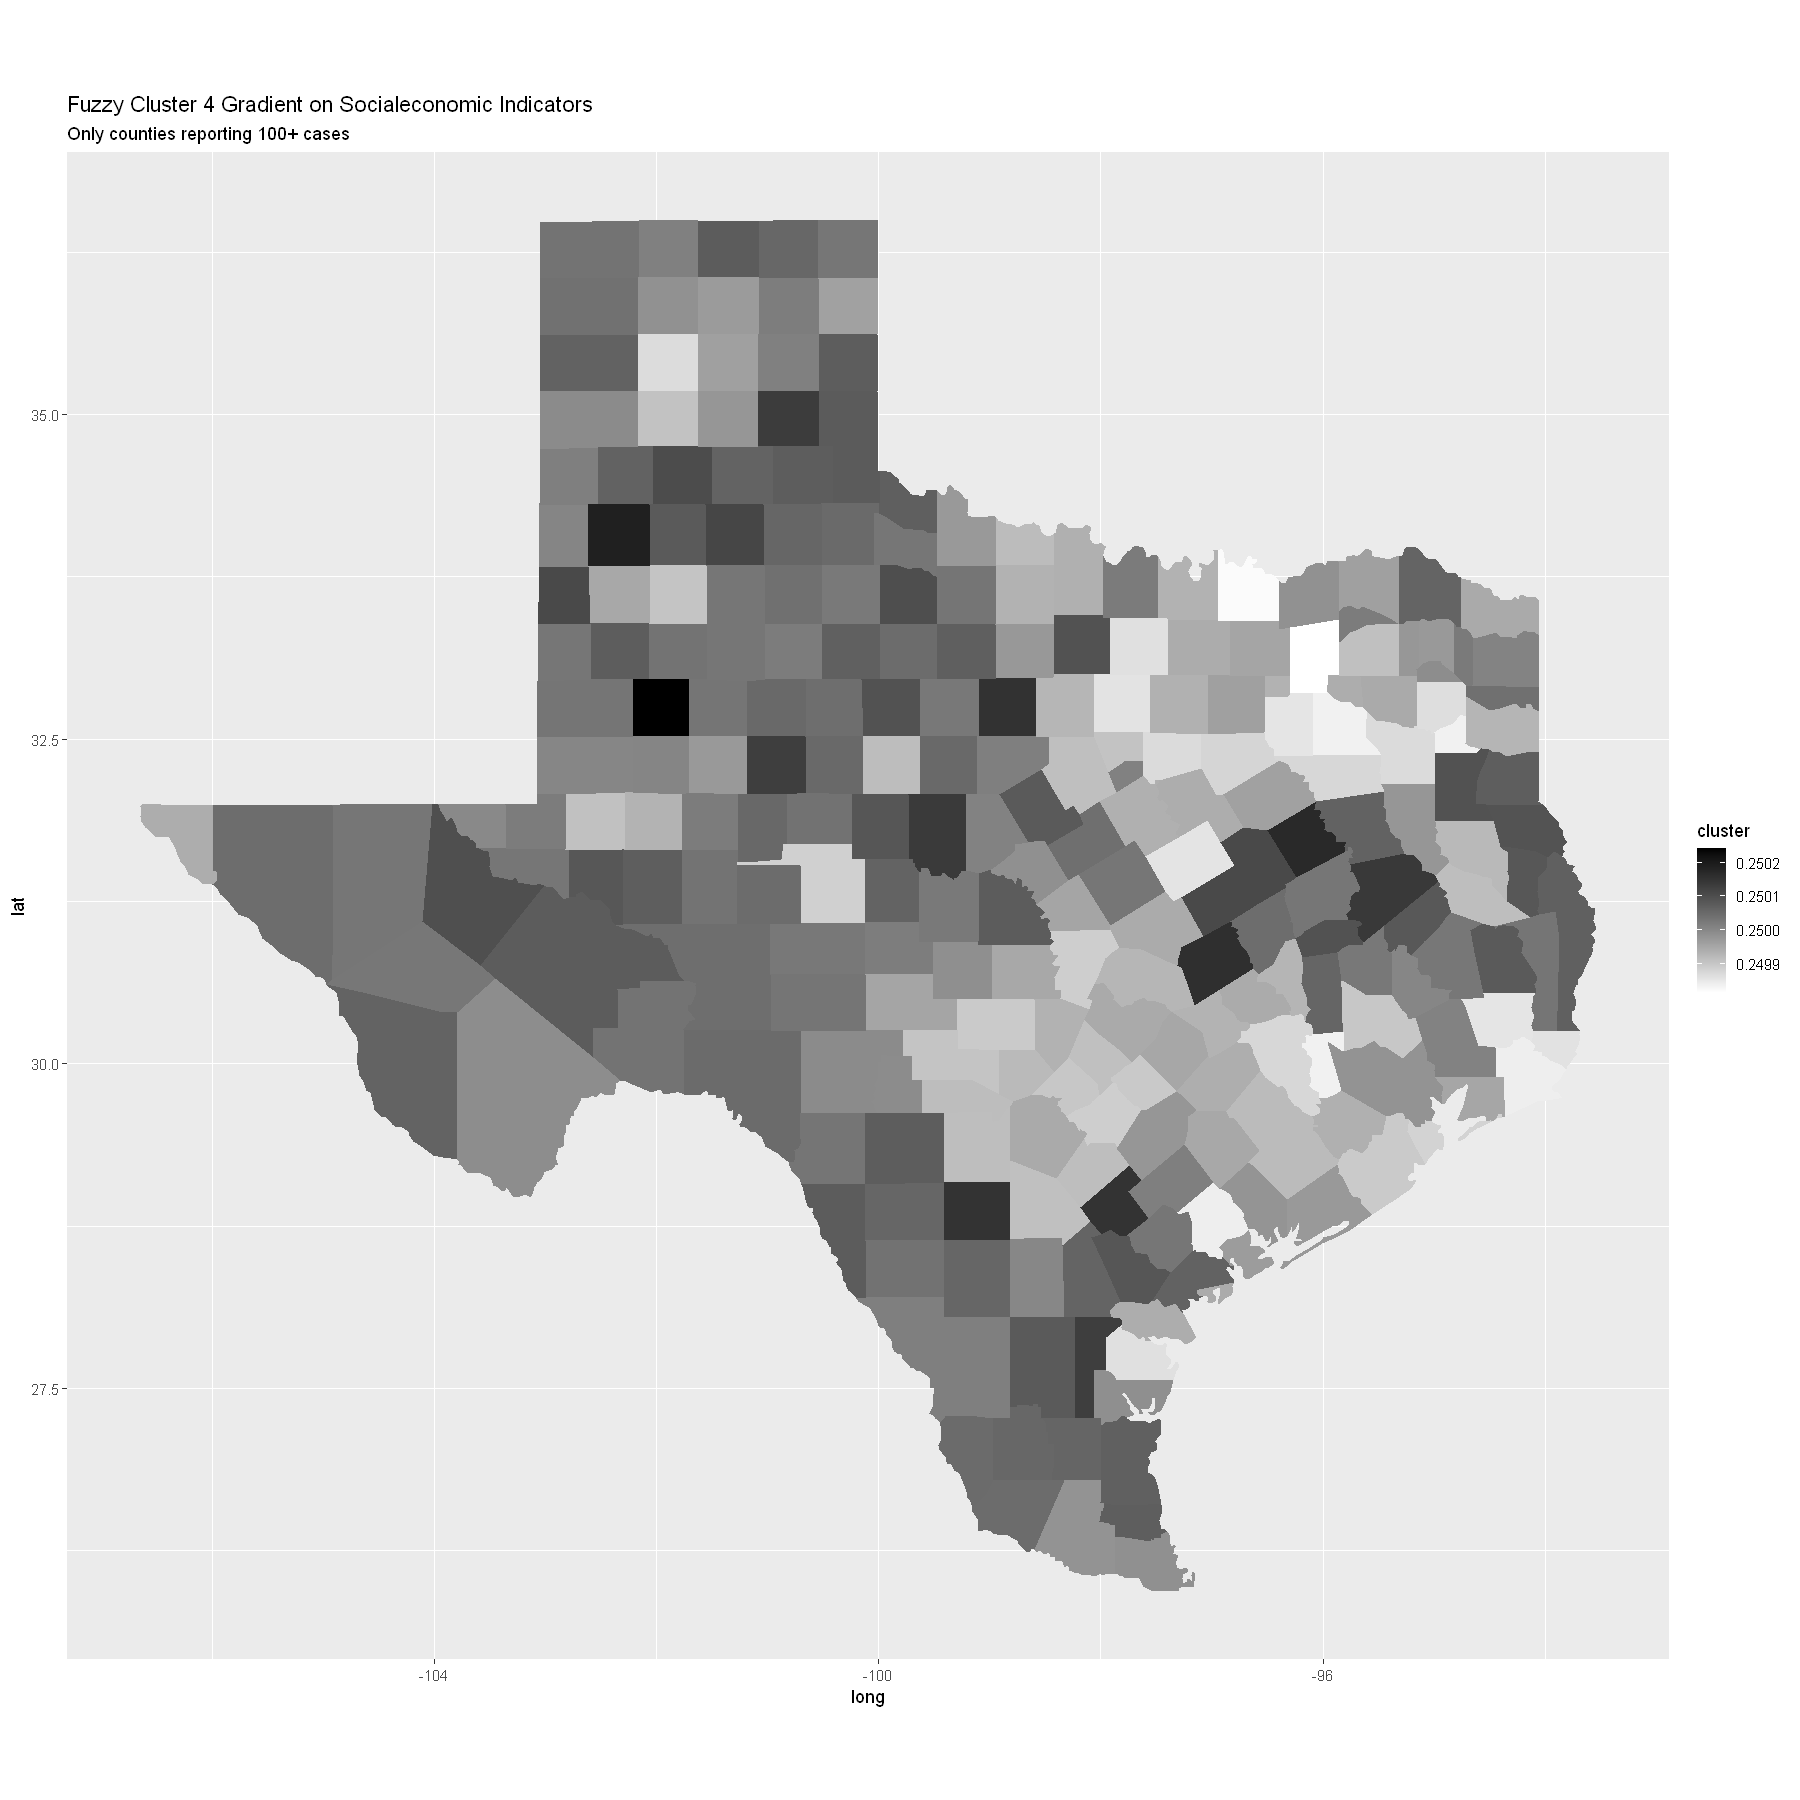

In [484]:
ggplot(fc_clust_4, aes(long, lat)) + 
  geom_polygon(data = fc_clust_4, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "black") +
  labs(title = "Fuzzy Cluster 4 Gradient on Socialeconomic Indicators", subtitle = "Only counties reporting 100+ cases")

#### Fuzzy Clustering Obeservations

When split into clusters, membership in each cluster is very similar in probability to each other, suggesting that the membership in each cluster is not very well defined. Maybe not the best method for this dataset

### Partitioning Around Medoids (PAM) Clustering

In [432]:
dist_se <- dist(se_data_prepped)

In [433]:
p <- pam(dist_se, k=4)

In [434]:
se_data_p <- se_data_prepped %>% add_column(cluster = factor(p$cluster))

In [437]:
counties_TX_p <- counties_TX %>% left_join(se_data %>% add_column(cluster = se_data_p$cluster))

Joining, by = "county"


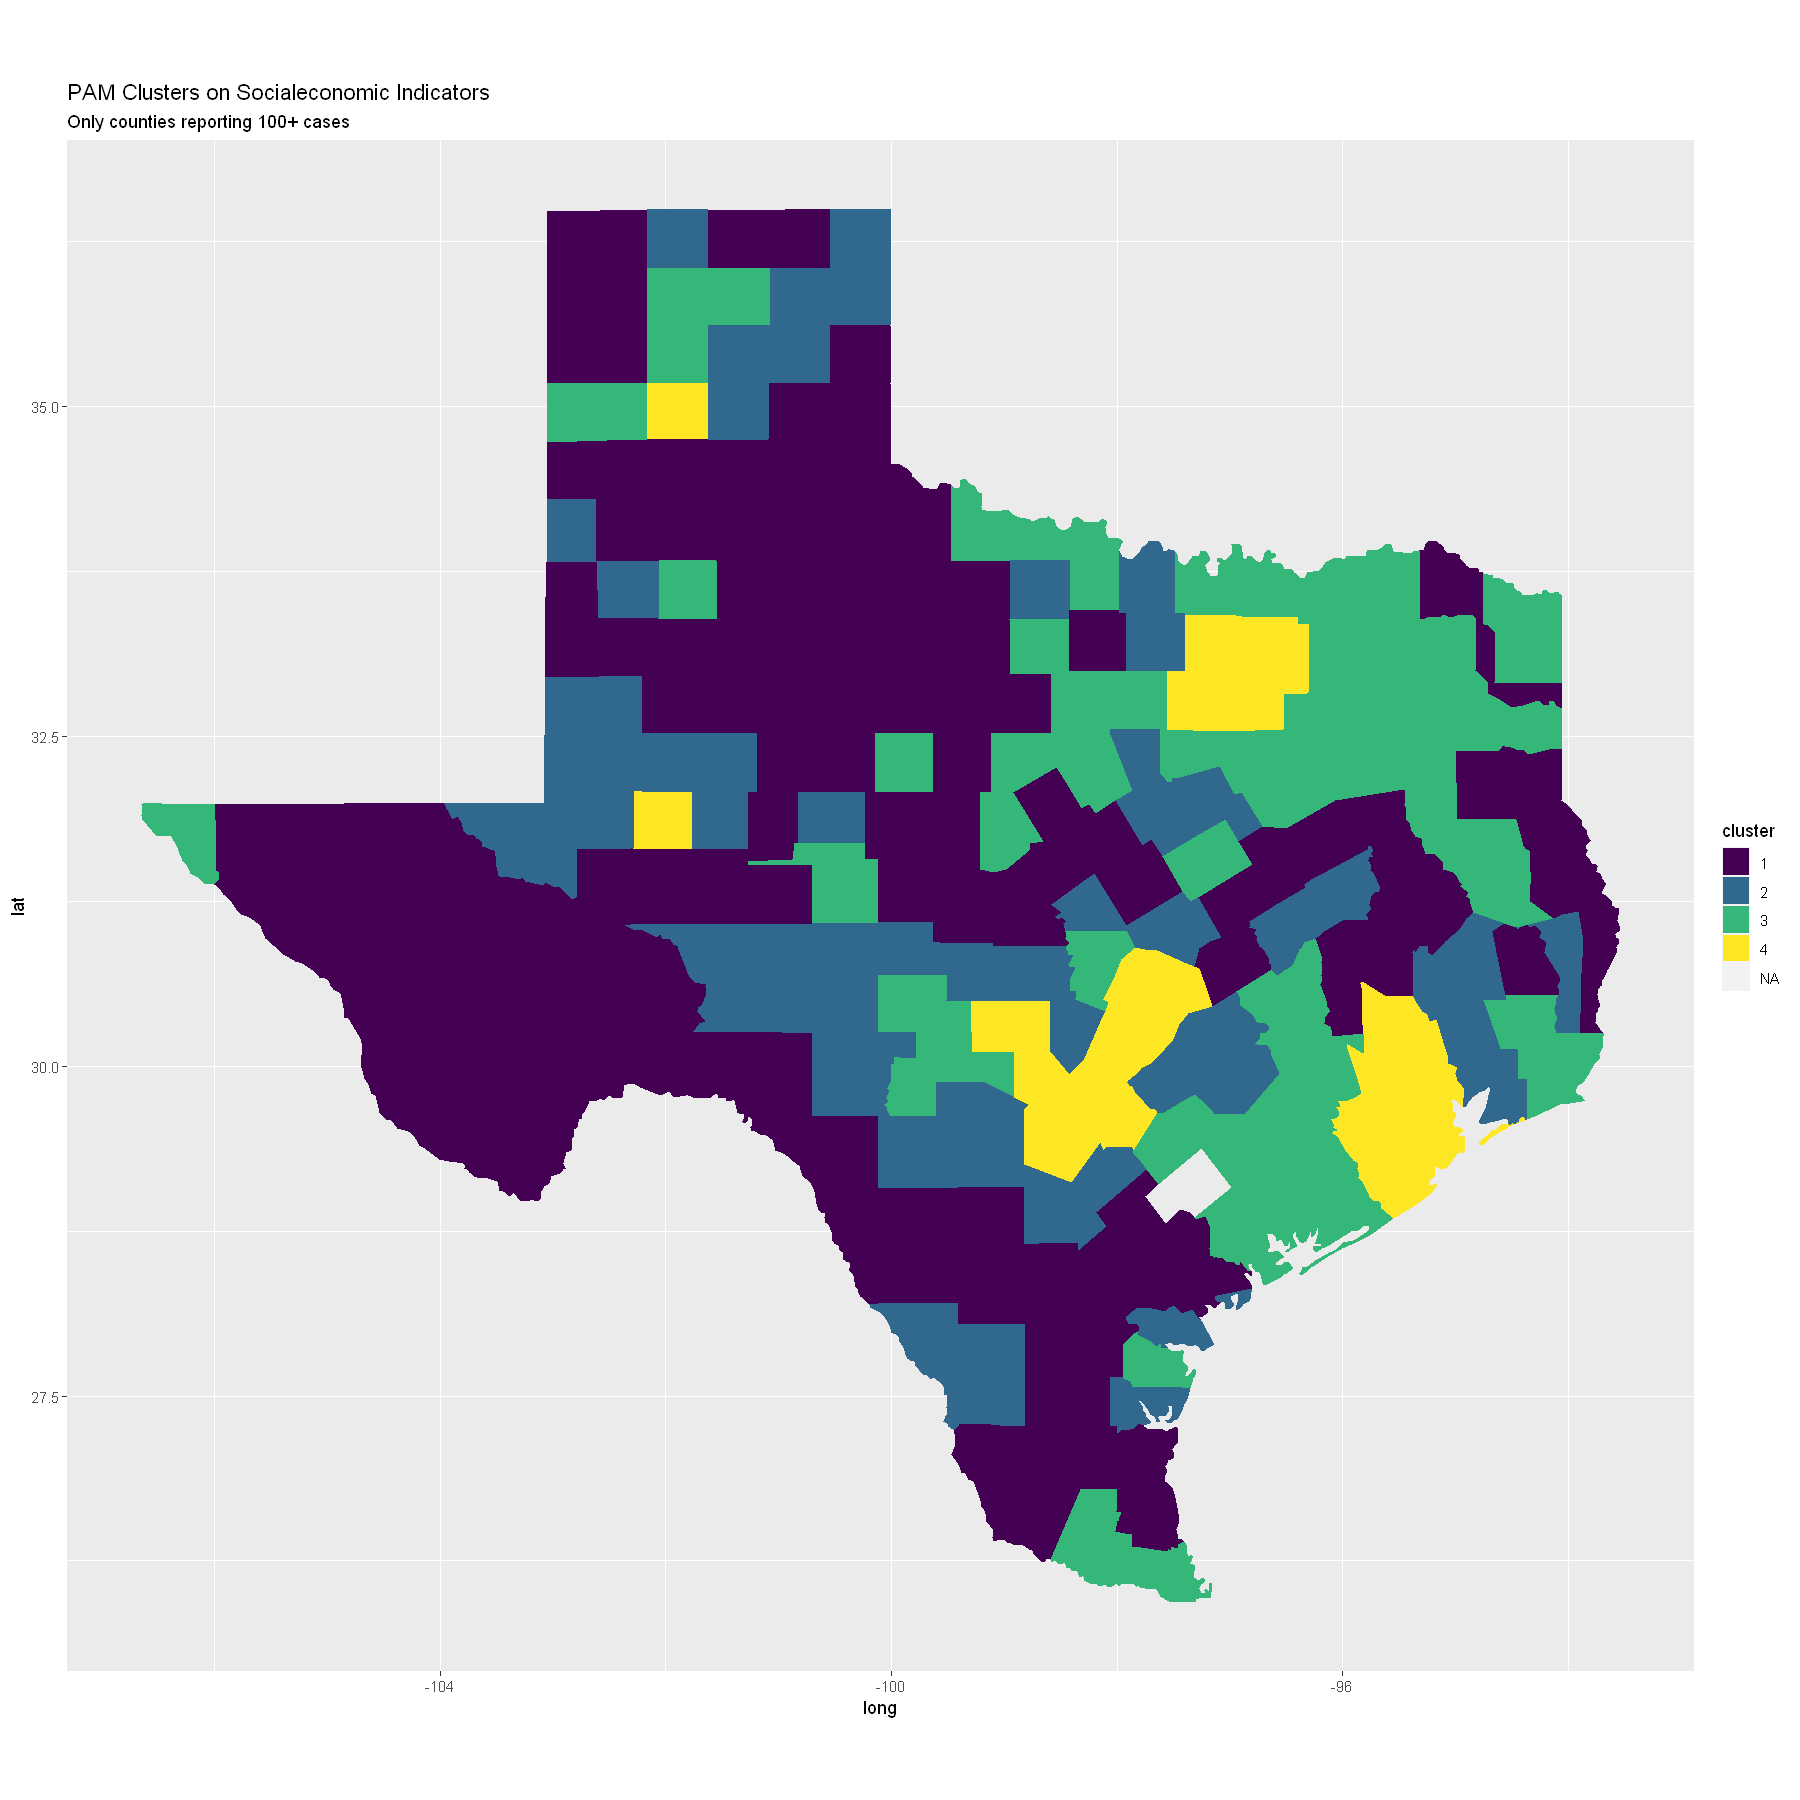

In [438]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_p, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "PAM Clusters on Socialeconomic Indicators", subtitle = "Only counties reporting 100+ cases") +
  scale_x_continuous()

In [439]:
se_data_p <- se_data %>% add_column(cluster = factor(p$cluster))

se_data_p %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,82.32510,2.2500188,0.02866199
2,72.26462,1.6351166,0.02393137
3,77.20759,1.6818991,0.02248098
4,72.82780,0.8891332,0.01252748


### PAM Observations

+ Very similar results to K-means

# Demographic Indicators Dataset Analysis

## K - means Clustering

In [448]:
demo_data_prepped <- demo_data[, !(colnames(demo_data) %in% c("county_name.x", "cases_per_1000", "deaths_per_1000", "death_per_case"))]


In [449]:
set.seed(123)
km <- kmeans(demo_data_prepped, centers = 4)
km

K-means clustering with 4 clusters of sizes 25, 156, 65, 8

Cluster means:
  hispanic_ratio median_age bachelors_degree percent_male_pop
1      0.3281032 -0.3317643       -0.2331040       2.47811495
2     -0.5814554  0.4426726       -0.1428715      -0.33700305
3      1.2786539 -0.8382277       -0.1584626      -0.08741399
4     -0.0760051 -0.7847512        4.8019532      -0.46231102
  percent_female_pop white_ratio black_ratio asian_ratio amerindian_ratio
1        -2.47811495  -0.3927378   0.1823698  -0.2080104       -0.1576406
2         0.33700305   0.5836886   0.1650225  -0.1206576        0.1334509
3         0.08741399  -1.1689078  -0.6069608  -0.1027448       -0.2316490
4         0.46231102  -0.6572459   1.1437113   3.8376579       -0.2275169
  other_race_ratio percent_children
1       0.09385046       -0.7758344
2       0.04156364       -0.3504943
3      -0.19328195        1.0814699
4       0.46664217        0.4721784

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  

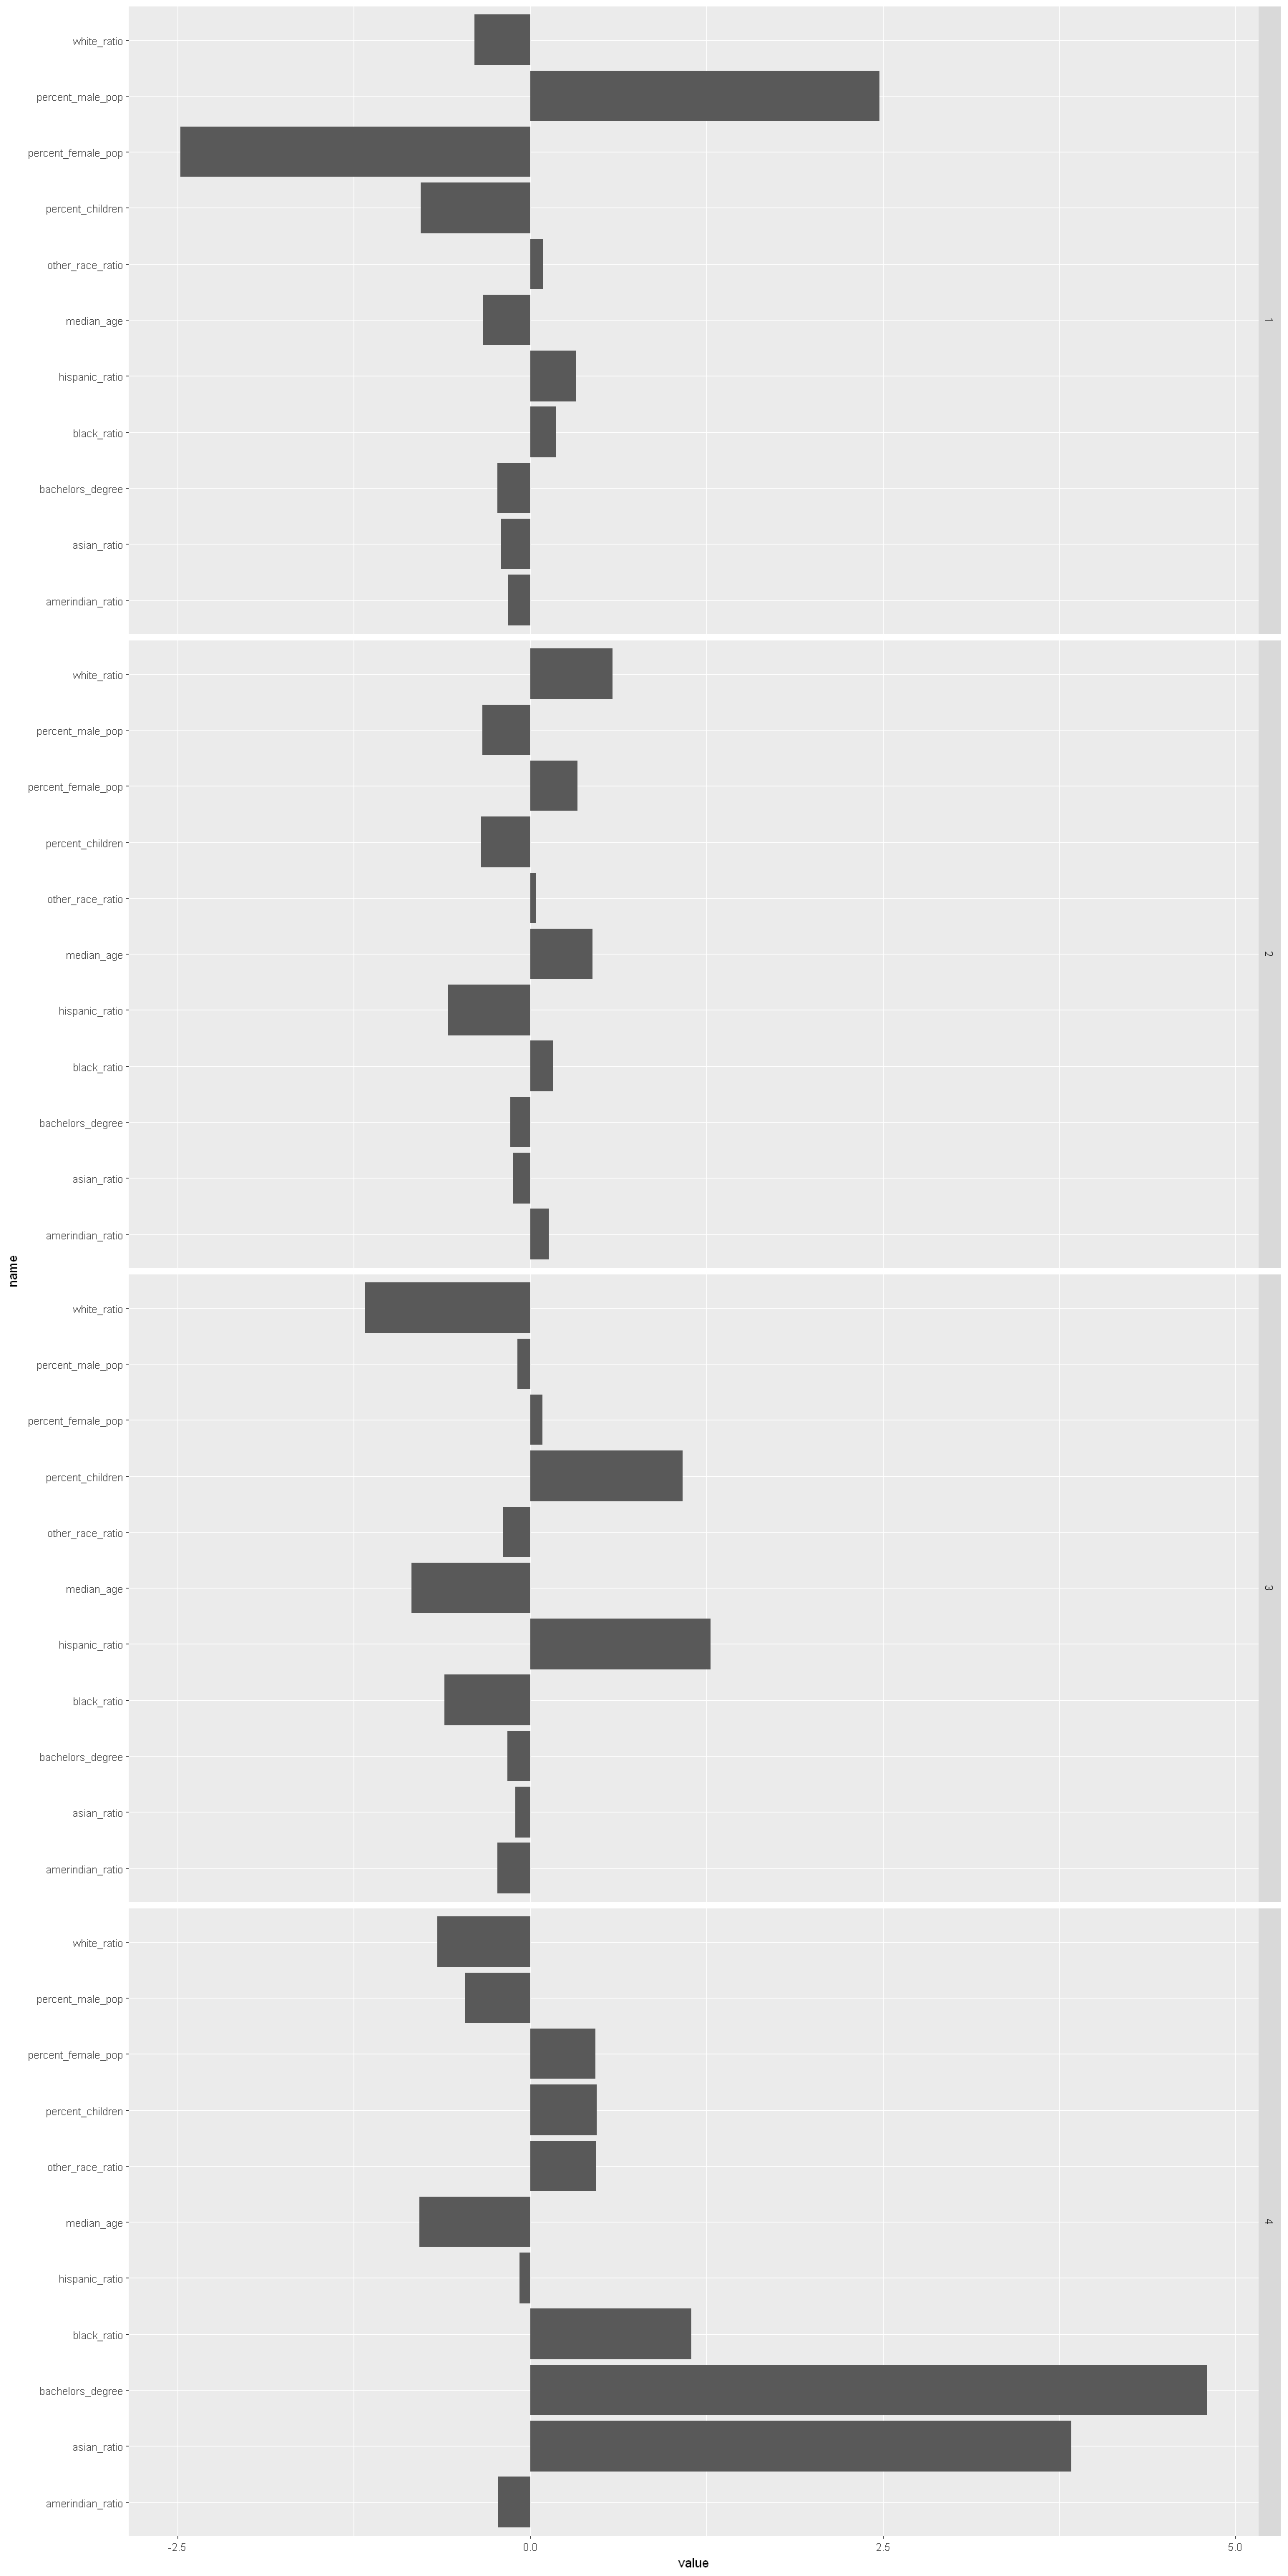

In [450]:
options(repr.plot.width = 15, repr.plot.height = 30)
ggplot(pivot_longer(as_tibble(km$centers,  rownames = "cluster"), 
  cols = colnames(km$centers)), 
  aes(y = name, x = value)) +
  geom_bar(stat = "identity") +
  facet_grid(rows = vars(cluster))

In [451]:
demo_data <- demo_data %>% mutate(county = county_name.x %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_TX_clust <- counties_TX %>% left_join(demo_data %>% 
    add_column(cluster = factor(km$cluster)))

Joining, by = "county"


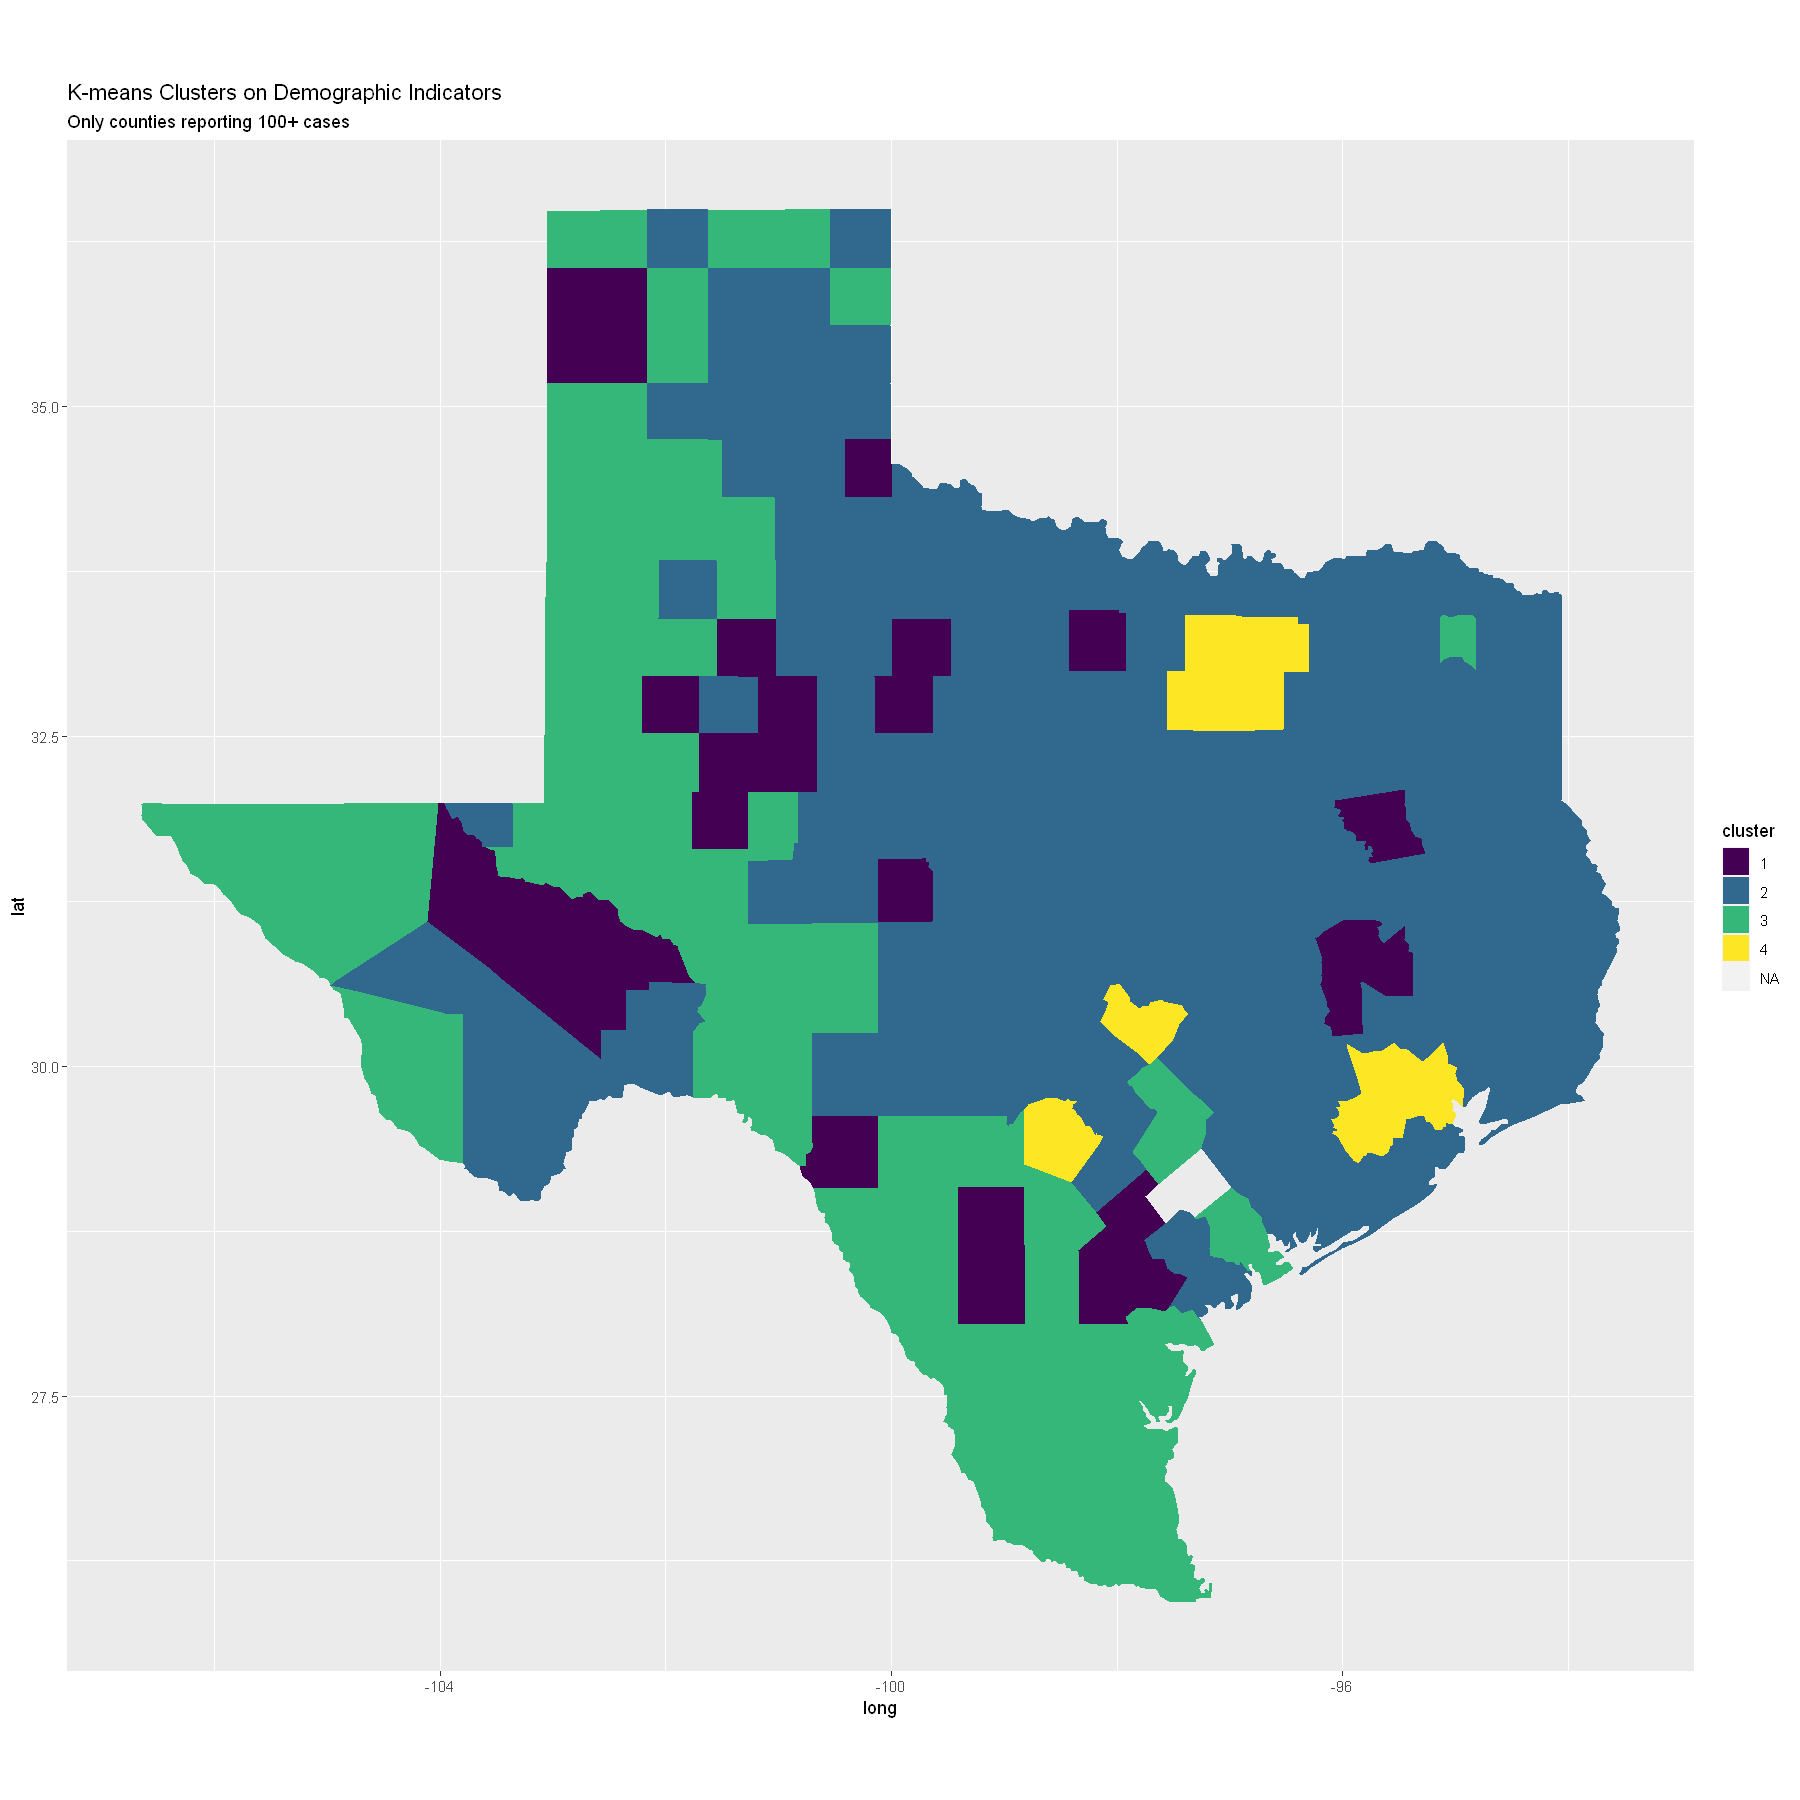

In [452]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_clust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "K-means Clusters on Demographic Indicators", subtitle = "Only counties reporting 100+ cases")

In [453]:
demo_data_km <- demo_data %>% add_column(cluster = factor(km$cluster))

demo_data_km %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,90.35203,1.7592425,0.02110167
2,68.97909,1.6776889,0.02527045
3,95.55802,2.4536850,0.02644606
4,72.30528,0.7537937,0.01043821


### K - means Observations

+ 4 lower deaths per case
+ 2,4 low average cases

## Hierarchical Clustering

In [454]:
set.seed(420)
dist_demo_prepped <- dist(demo_data_prepped)
hc <- hclust(dist_demo_prepped, method="complete")

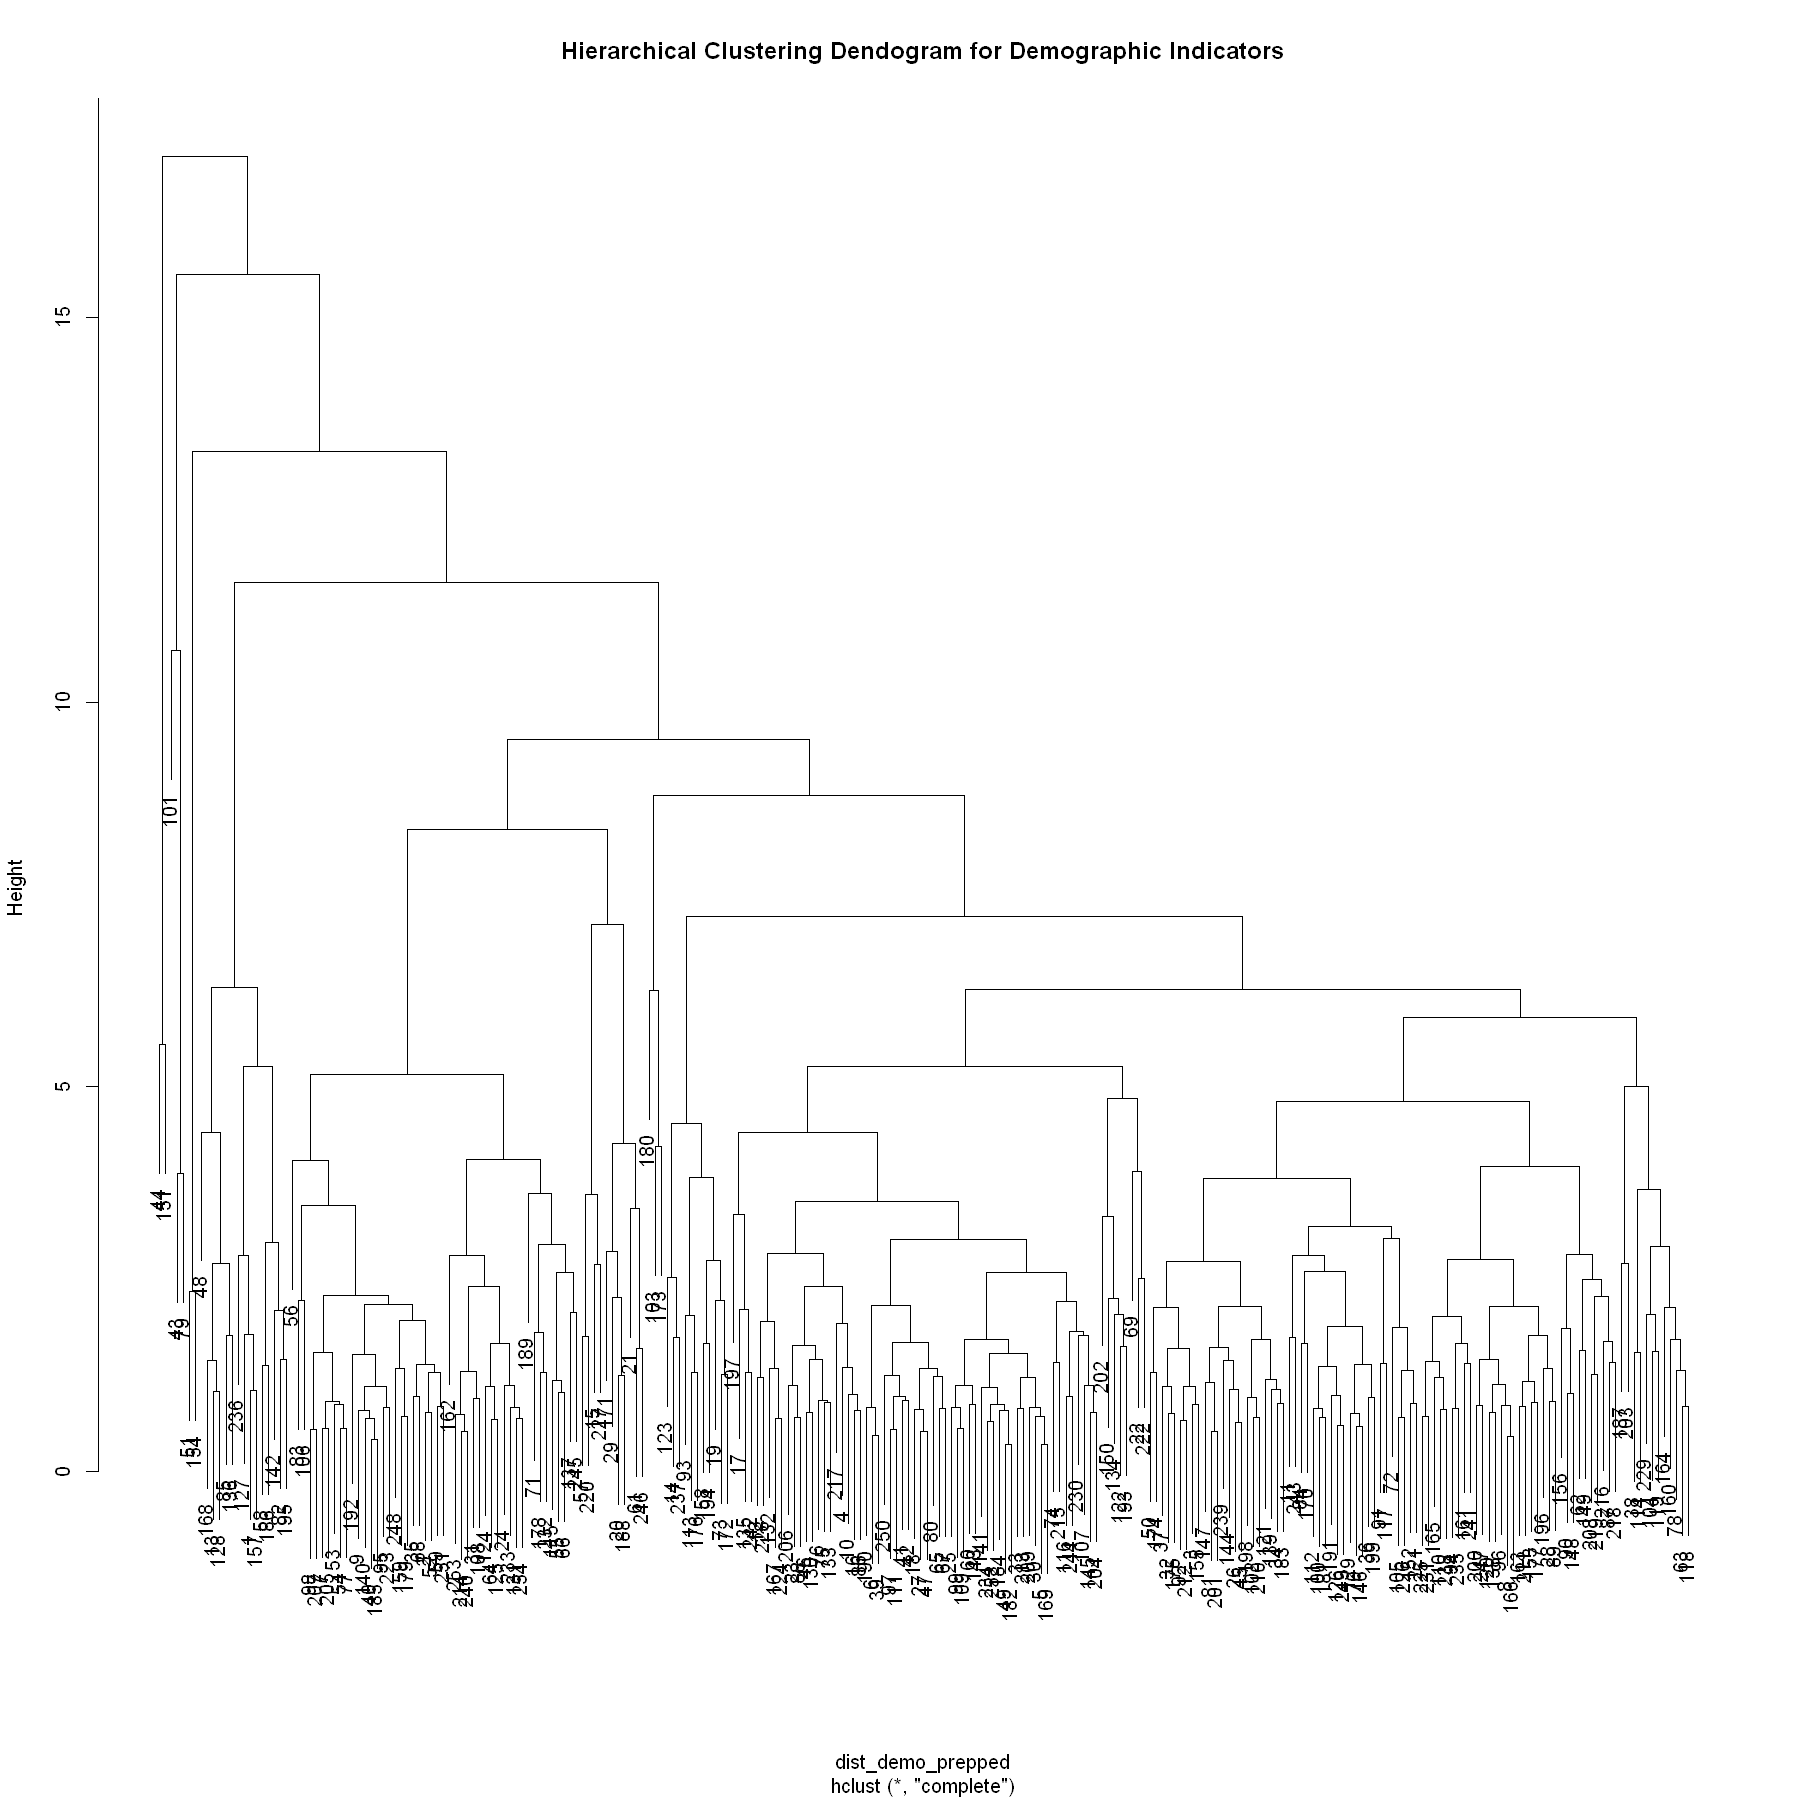

In [488]:
plot(hc, main = "Hierarchical Clustering Dendogram for Demographic Indicators")

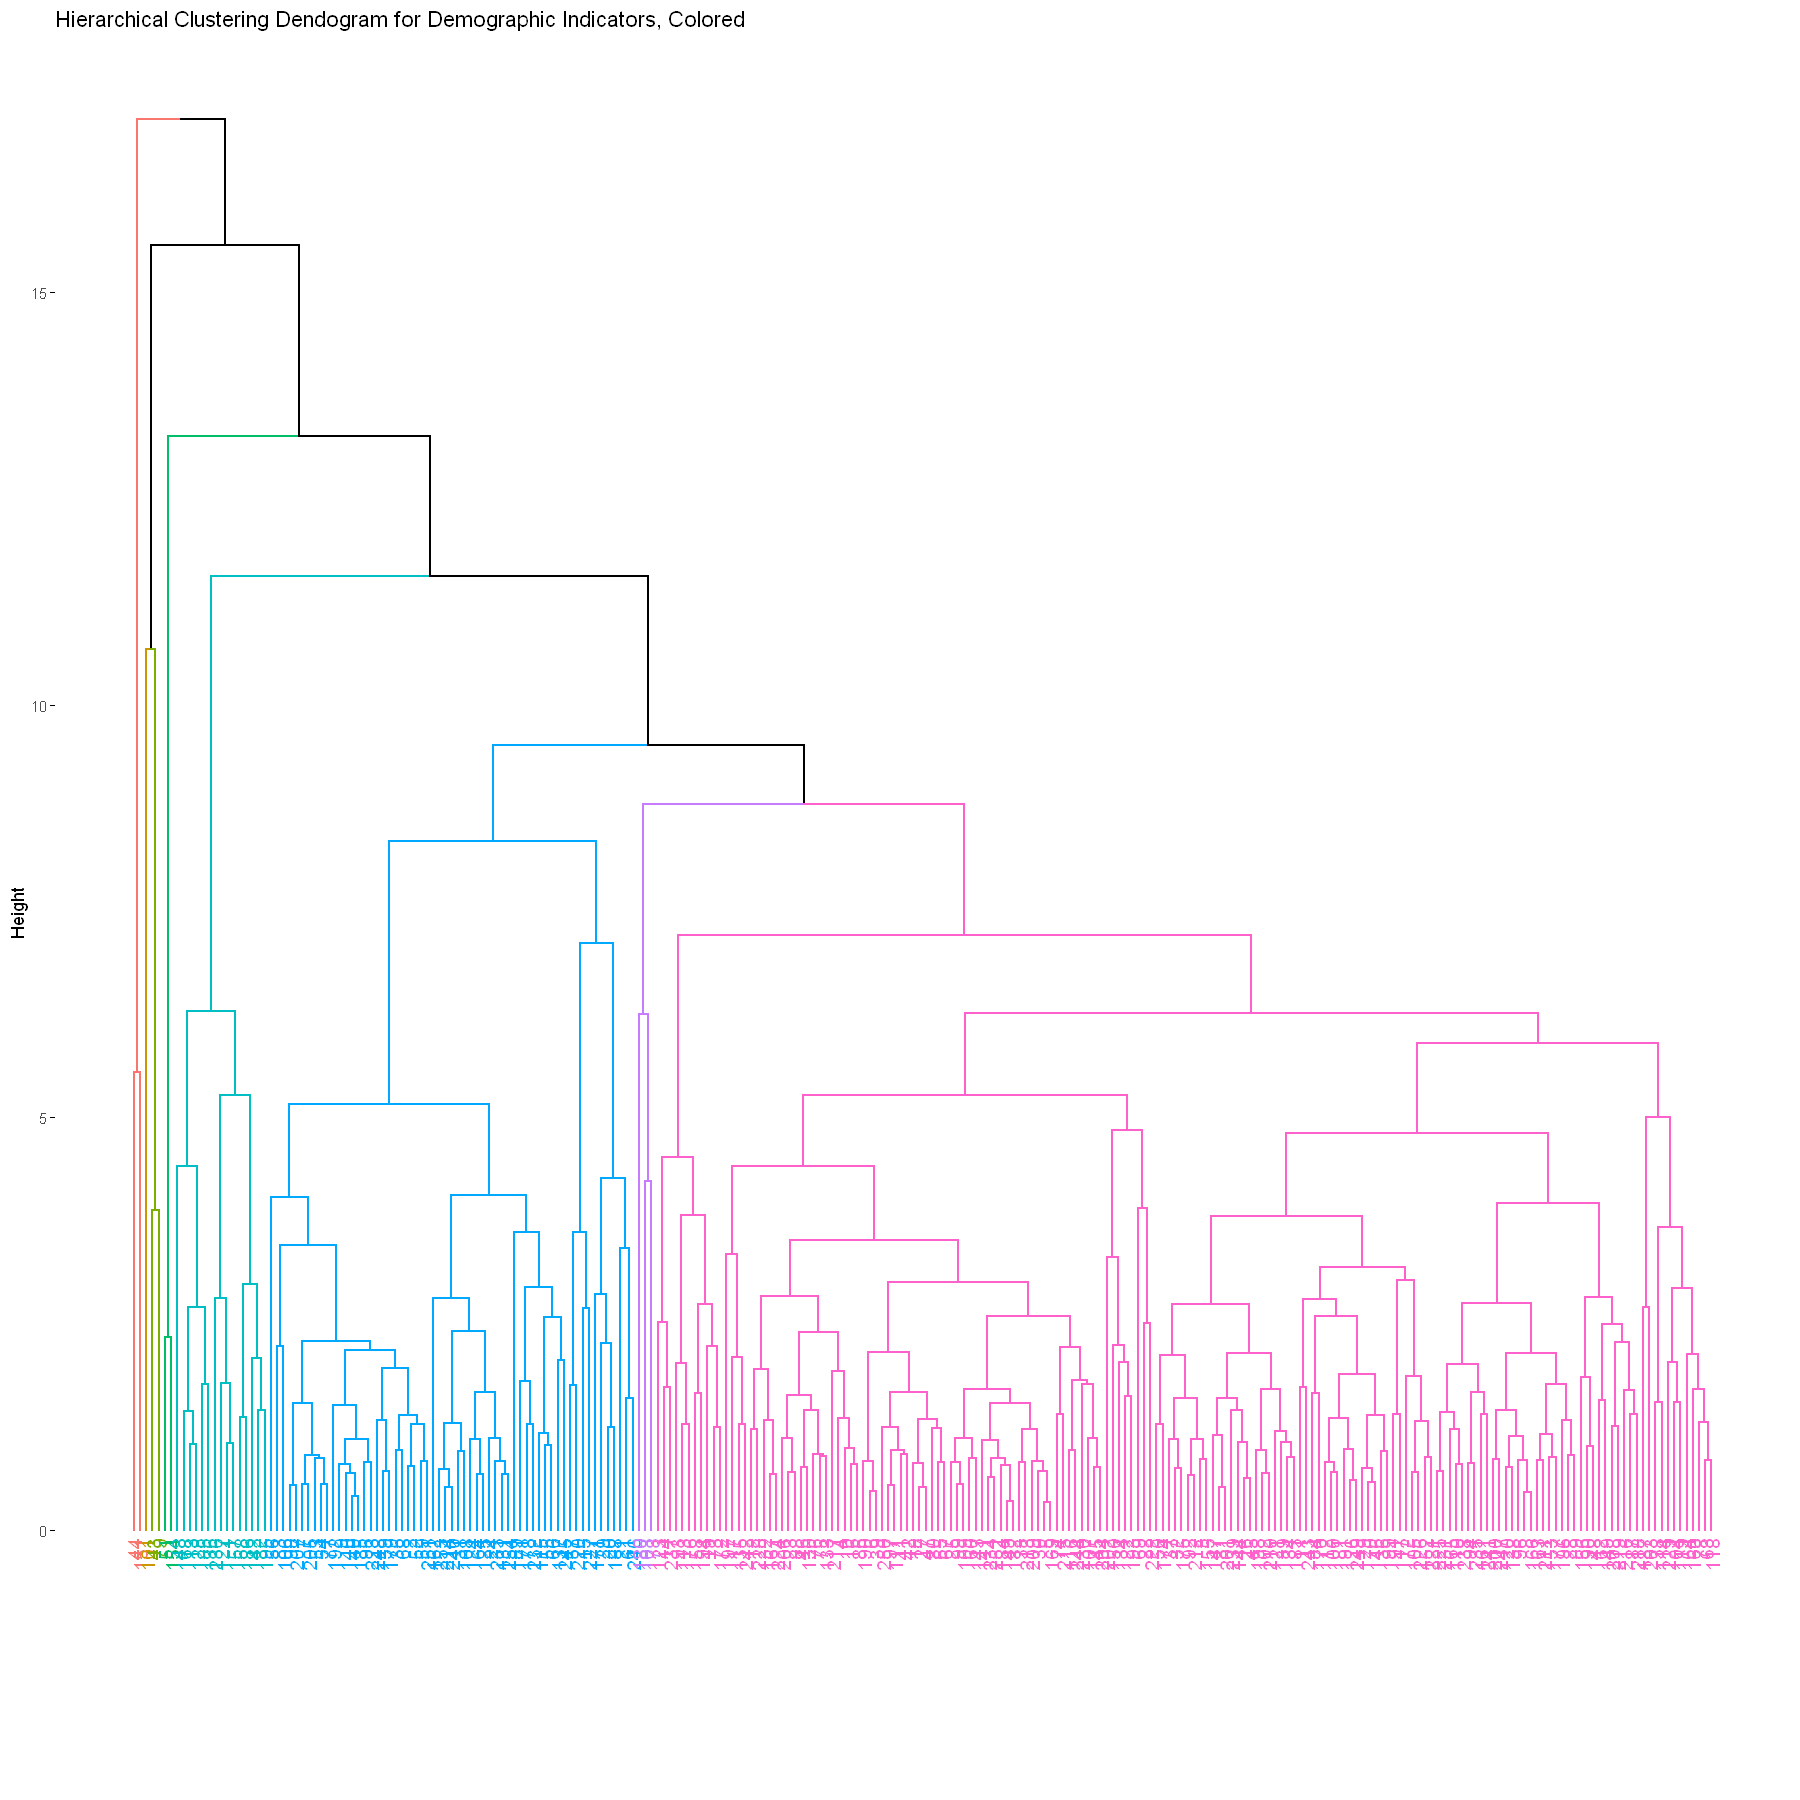

In [489]:
fviz_dend(hc, k=8, main = "Hierarchical Clustering Dendogram for Demographic Indicators, Colored")

In [457]:
h_clusters <- cutree(hc, k=8)
demo_data_hclust <- demo_data_prepped %>% add_column(cluster = factor(h_clusters))

In [458]:
counties_TX_hclust <- counties_TX %>% left_join(demo_data %>% 
    add_column(cluster = demo_data_hclust$cluster))

Joining, by = "county"


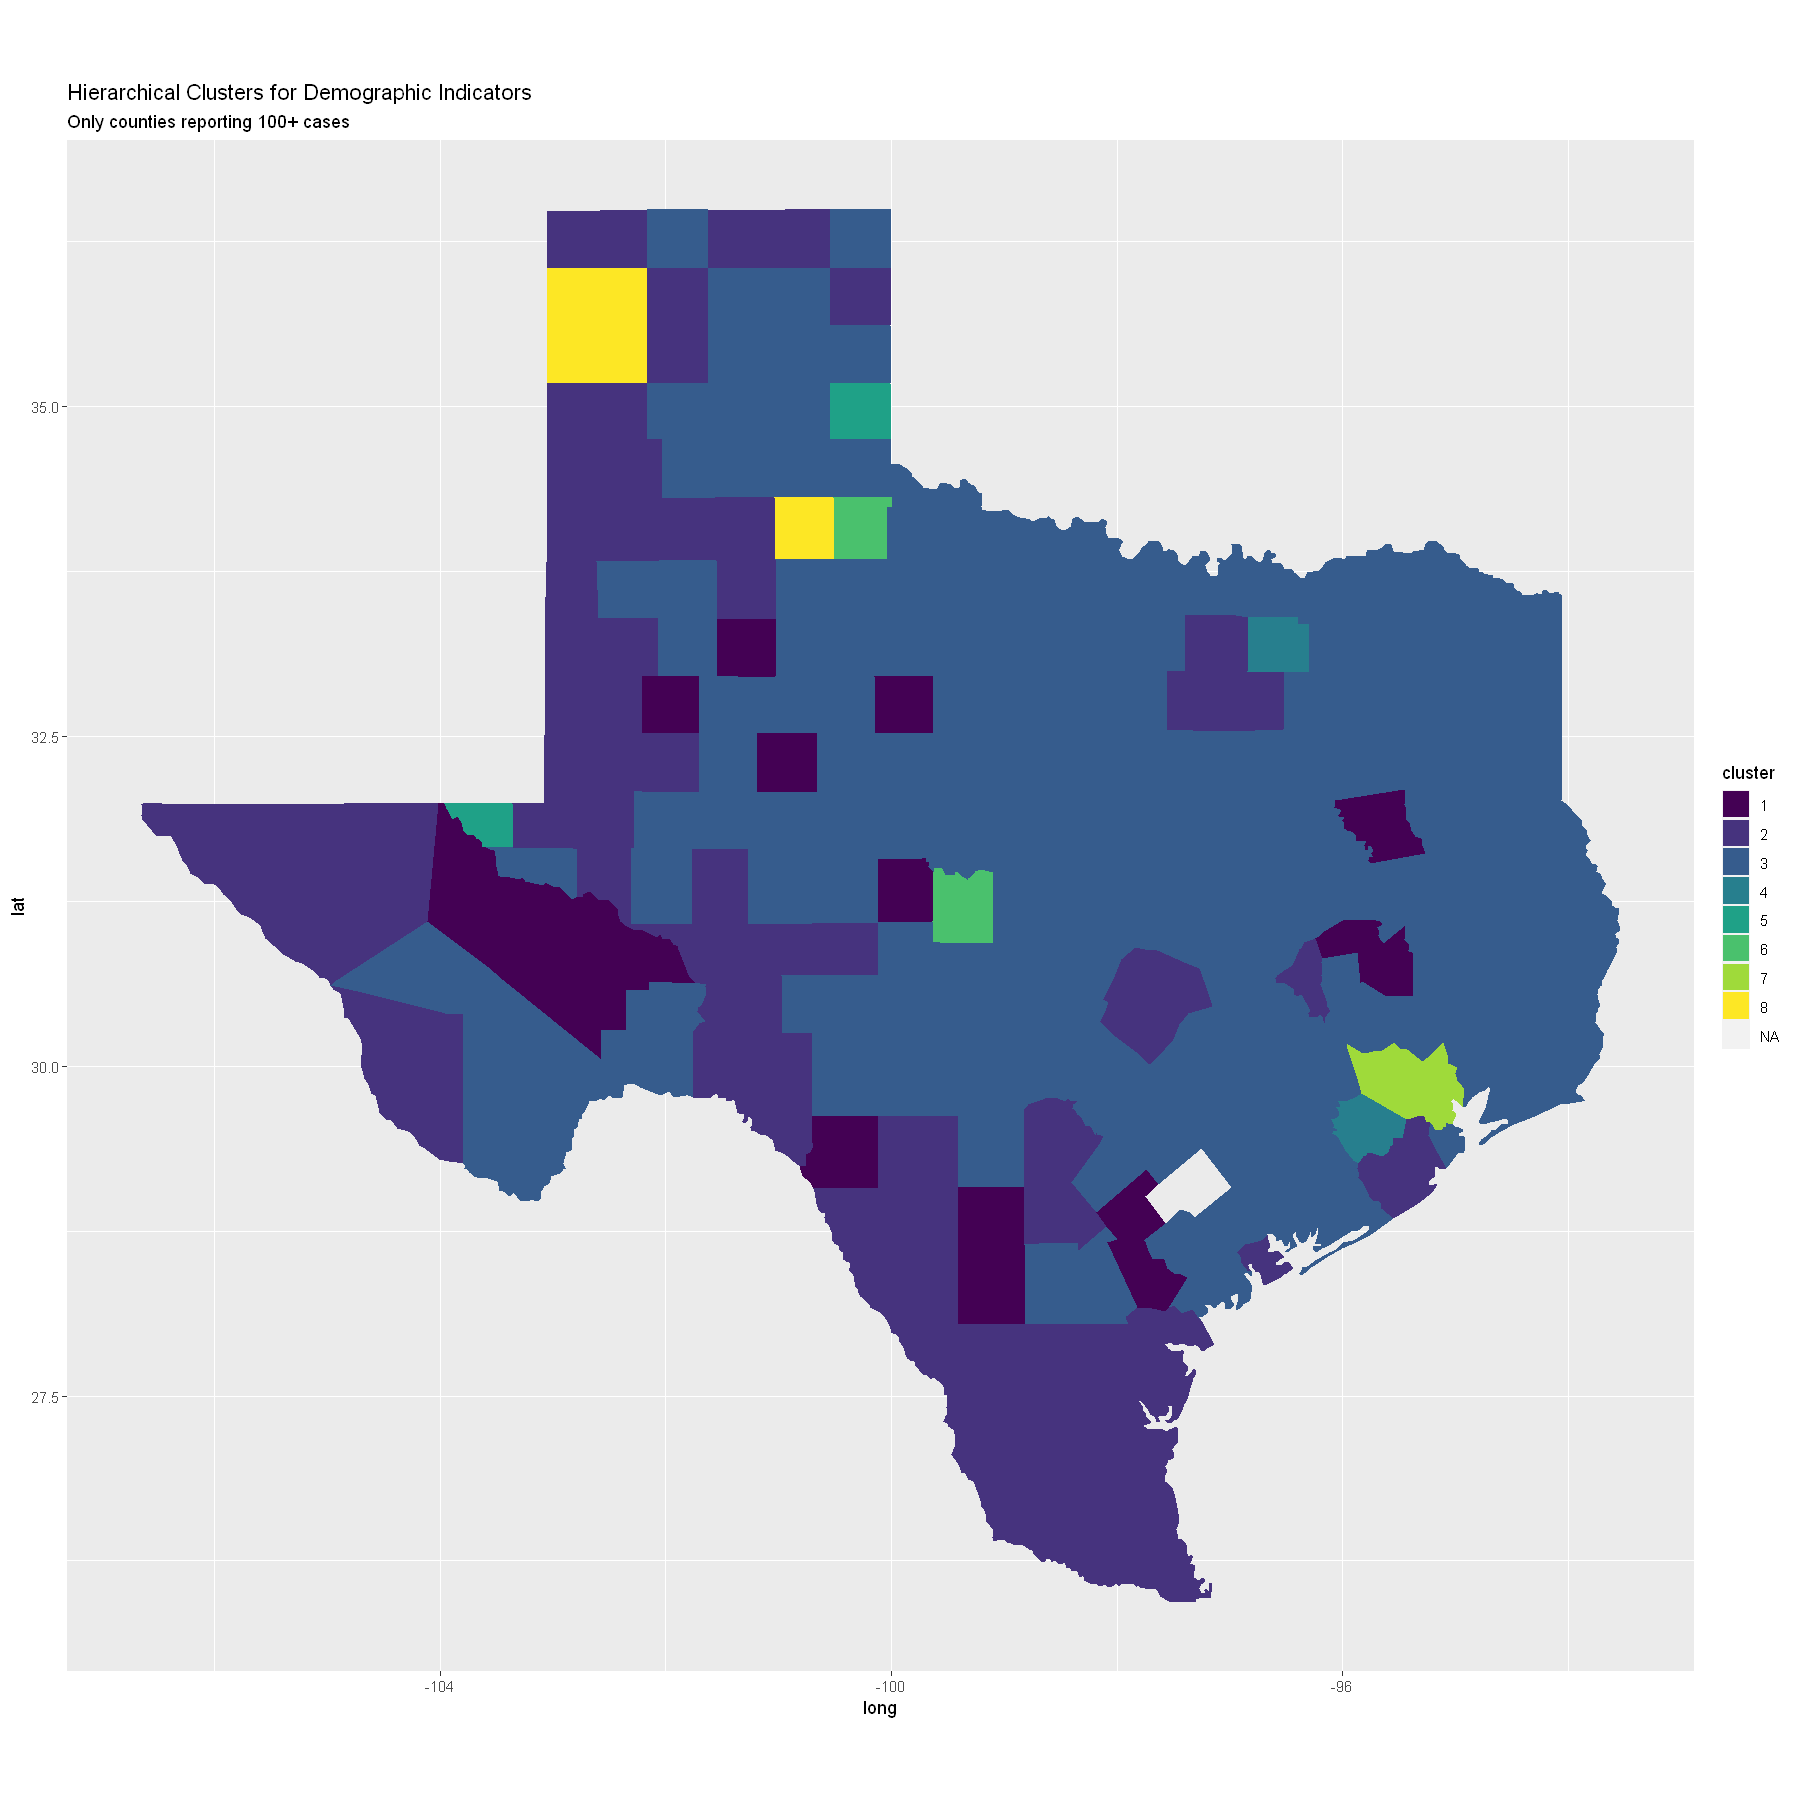

In [459]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_hclust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Hierarchical Clusters for Demographic Indicators", subtitle = "Only counties reporting 100+ cases")

In [460]:
demo_data_dc <- demo_data %>% add_column(cluster = demo_data_hclust$cluster)

demo_data_dc %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,90.58481,1.8534023,0.022324122
2,94.52129,2.3161623,0.024977366
3,71.79703,1.6964574,0.024863565
4,66.37357,0.5727389,0.008712453
5,45.91736,1.3218771,0.016877637
6,87.41289,3.0730968,0.032734329
7,63.27584,0.8452069,0.013357499
8,68.51548,2.5291332,0.035630930


### HClust Observations
+ 1,2,6 high cases
+ 8, 4 low deaths

## Fuzzy Clustering

In [461]:
fc <- cmeans(as.matrix(demo_data_prepped), centers = 4)
fc

Fuzzy c-means clustering with 4 clusters

Cluster centers:
  hispanic_ratio  median_age bachelors_degree percent_male_pop
1     -0.6145864  0.72994404      -0.12245465     -0.309508768
2     -0.1185268 -0.04140930       0.02938658      0.249568412
3      1.2298588 -0.81053872      -0.07213789      0.009708405
4     -0.3131238 -0.05139352       0.02922513     -0.067980161
  percent_female_pop white_ratio black_ratio asian_ratio amerindian_ratio
1        0.309508768  0.76103527  -0.2525005 -0.16817317      0.105825922
2       -0.249568412  0.05334245   0.2046882  0.06542677      0.040543038
3       -0.009708405 -1.14273508  -0.5227209 -0.13012887     -0.259758527
4        0.067980161  0.17835799   0.4737372  0.08643046      0.008319321
  other_race_ratio percent_children
1      -0.12408436      -0.49503987
2       0.07708594      -0.13604857
3      -0.13855540       0.93260688
4       0.05562111      -0.06017931

Memberships:
             1          2          3          4
1   0.22493690

In [462]:
demo_data_fc <- demo_data %>% add_column(cluster = fc$membership)

In [463]:
counties_TX_fc <- counties_TX %>% left_join(demo_data_fc)

Joining, by = "county"


In [464]:
fc_clust_1 <- counties_TX_fc %>% mutate(cluster = cluster[,1])
fc_clust_2 <- counties_TX_fc %>% mutate(cluster = cluster[,2])
fc_clust_3 <- counties_TX_fc %>% mutate(cluster = cluster[,3])
fc_clust_4 <- counties_TX_fc %>% mutate(cluster = cluster[,4])

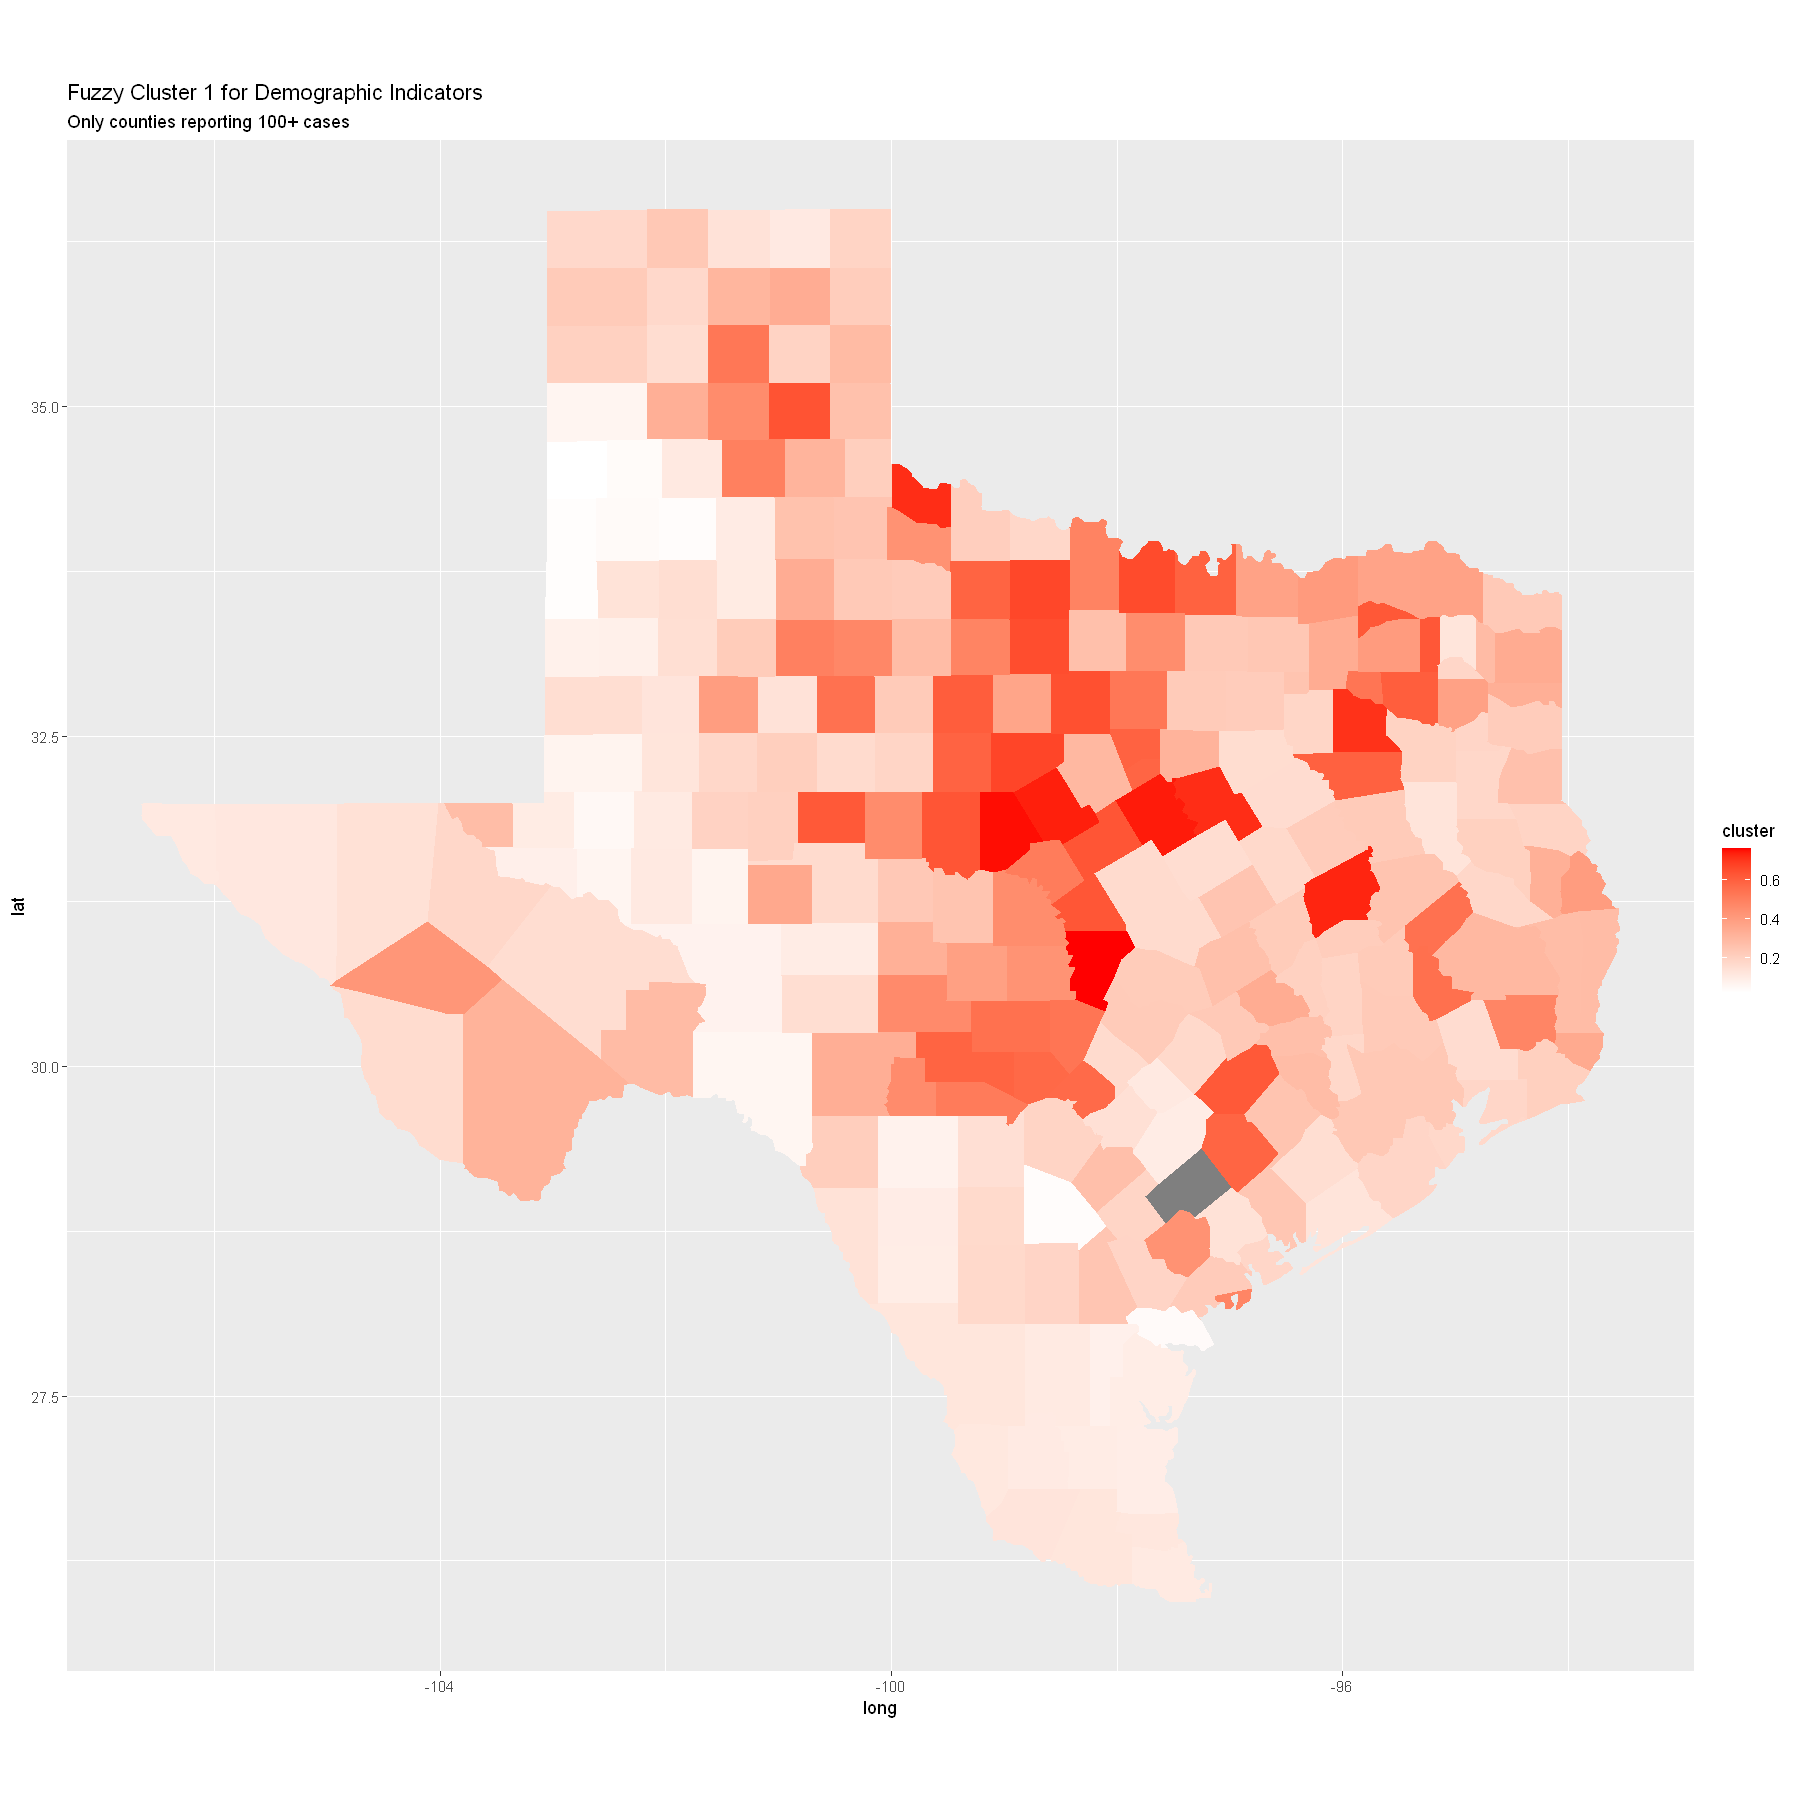

In [376]:
ggplot(fc_clust_1, aes(long, lat)) + 
  geom_polygon(data = fc_clust_1, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "red") +
  labs(title = "Fuzzy Cluster 1 for Demographic Indicators", subtitle = "Only counties reporting 100+ cases")

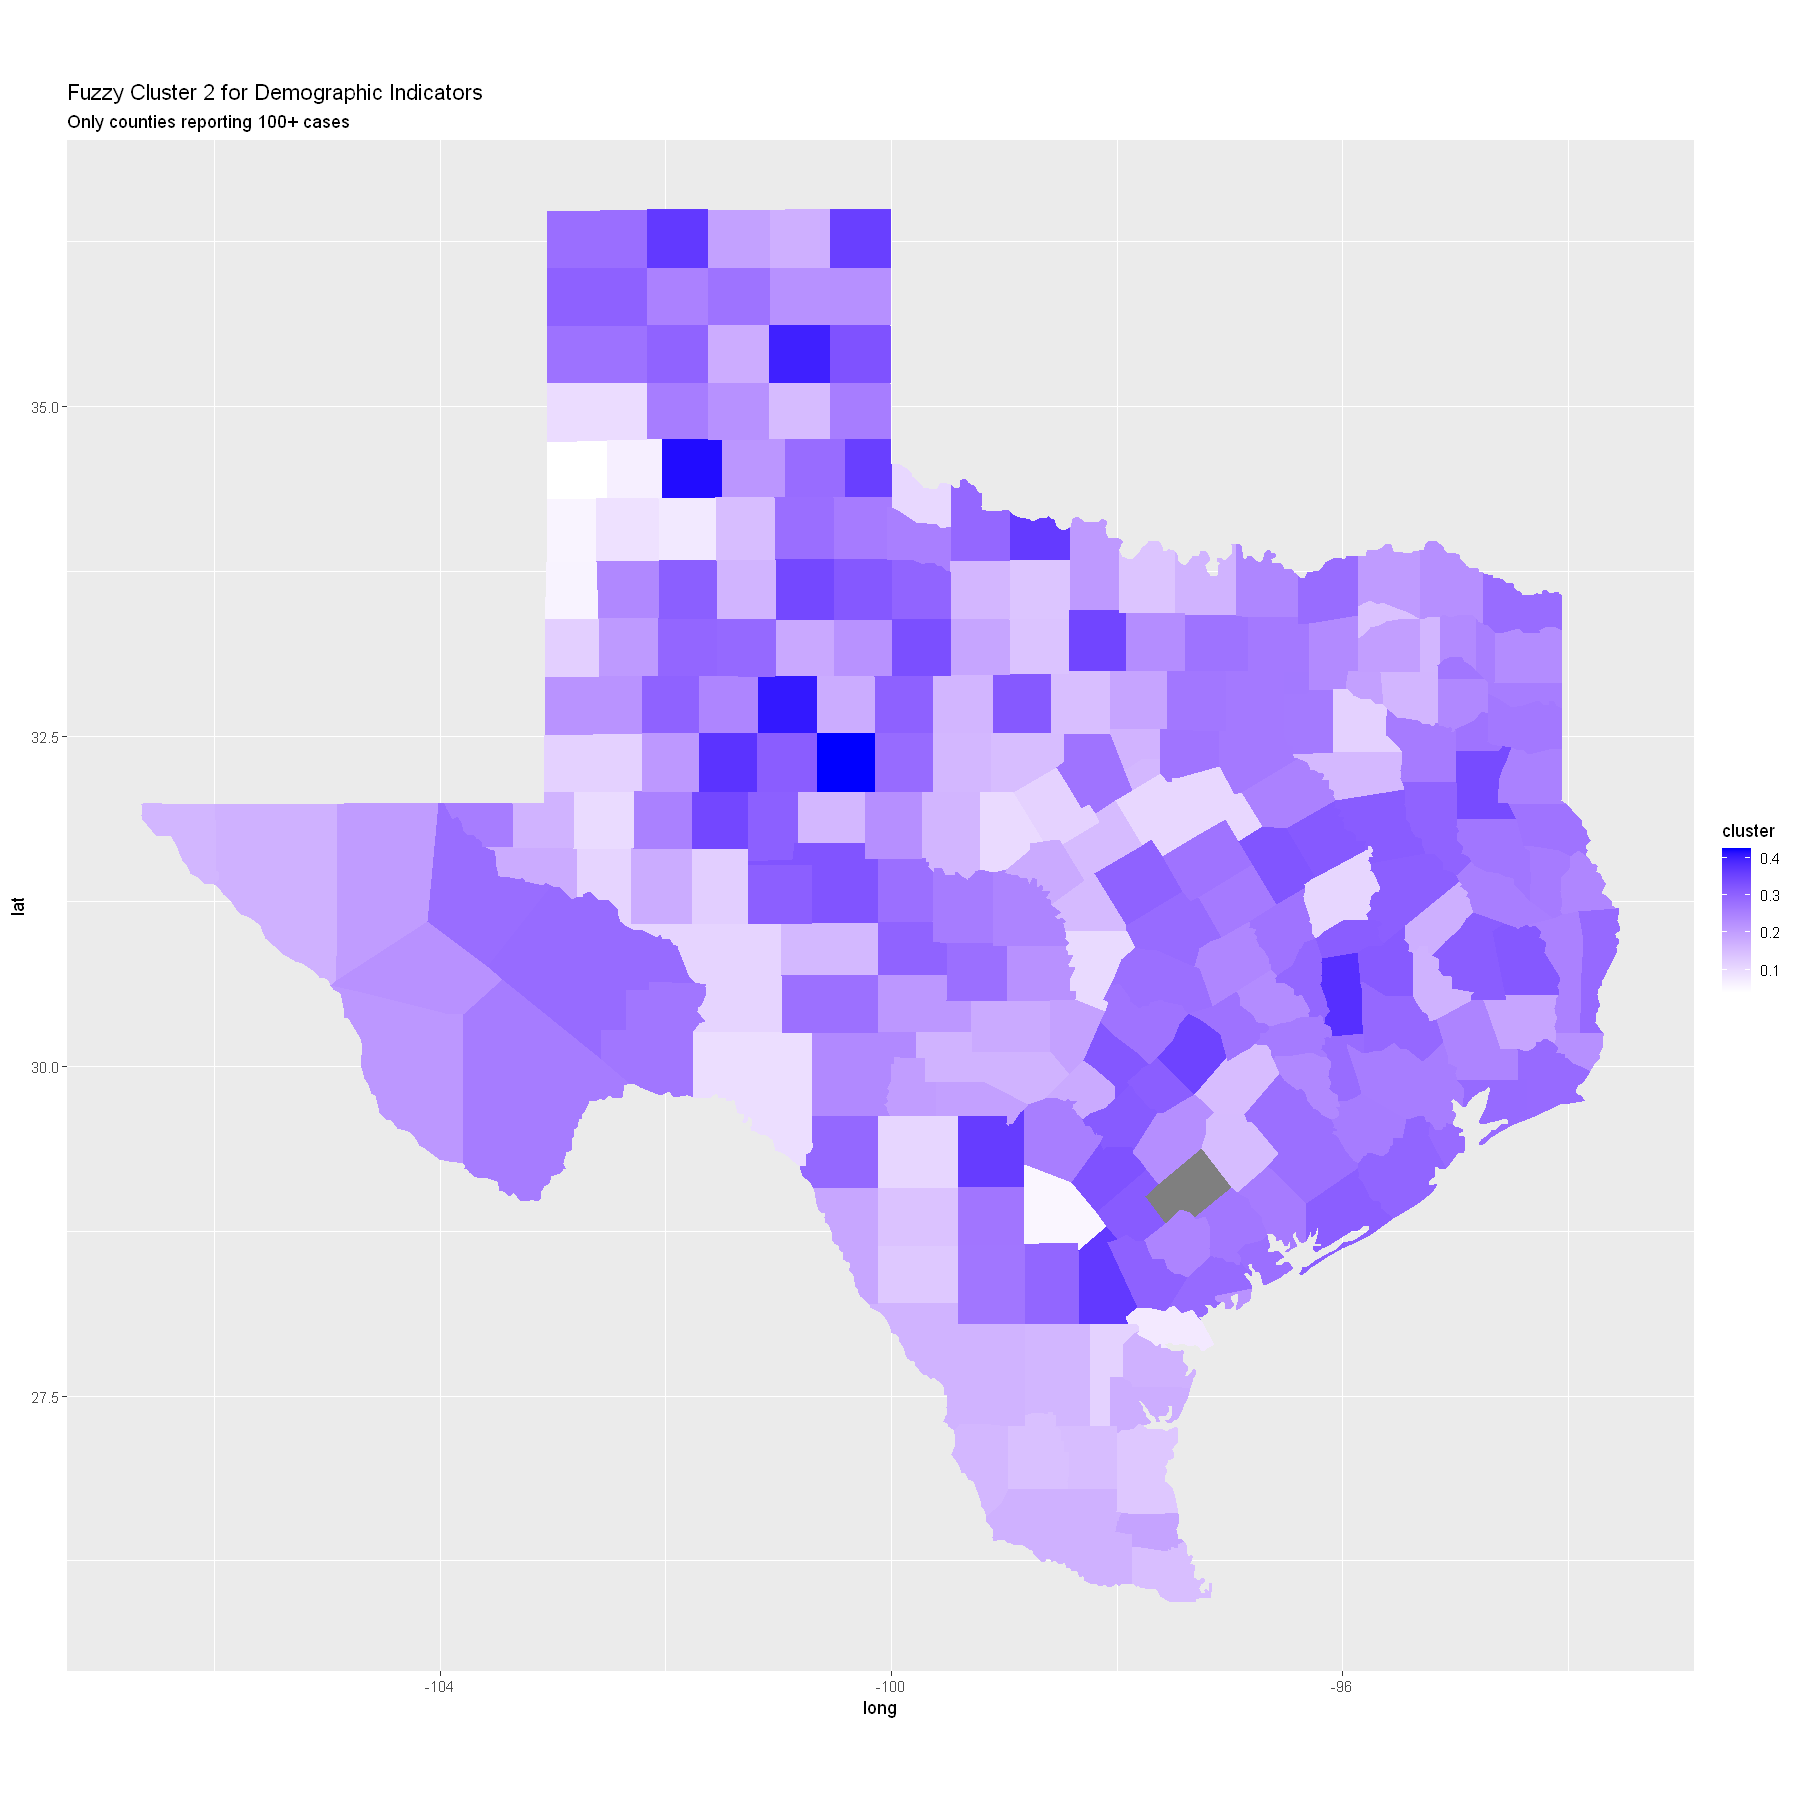

In [465]:
ggplot(fc_clust_2, aes(long, lat)) + 
  geom_polygon(data = fc_clust_2, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "blue") +
  labs(title = "Fuzzy Cluster 2 for Demographic Indicators", subtitle = "Only counties reporting 100+ cases")

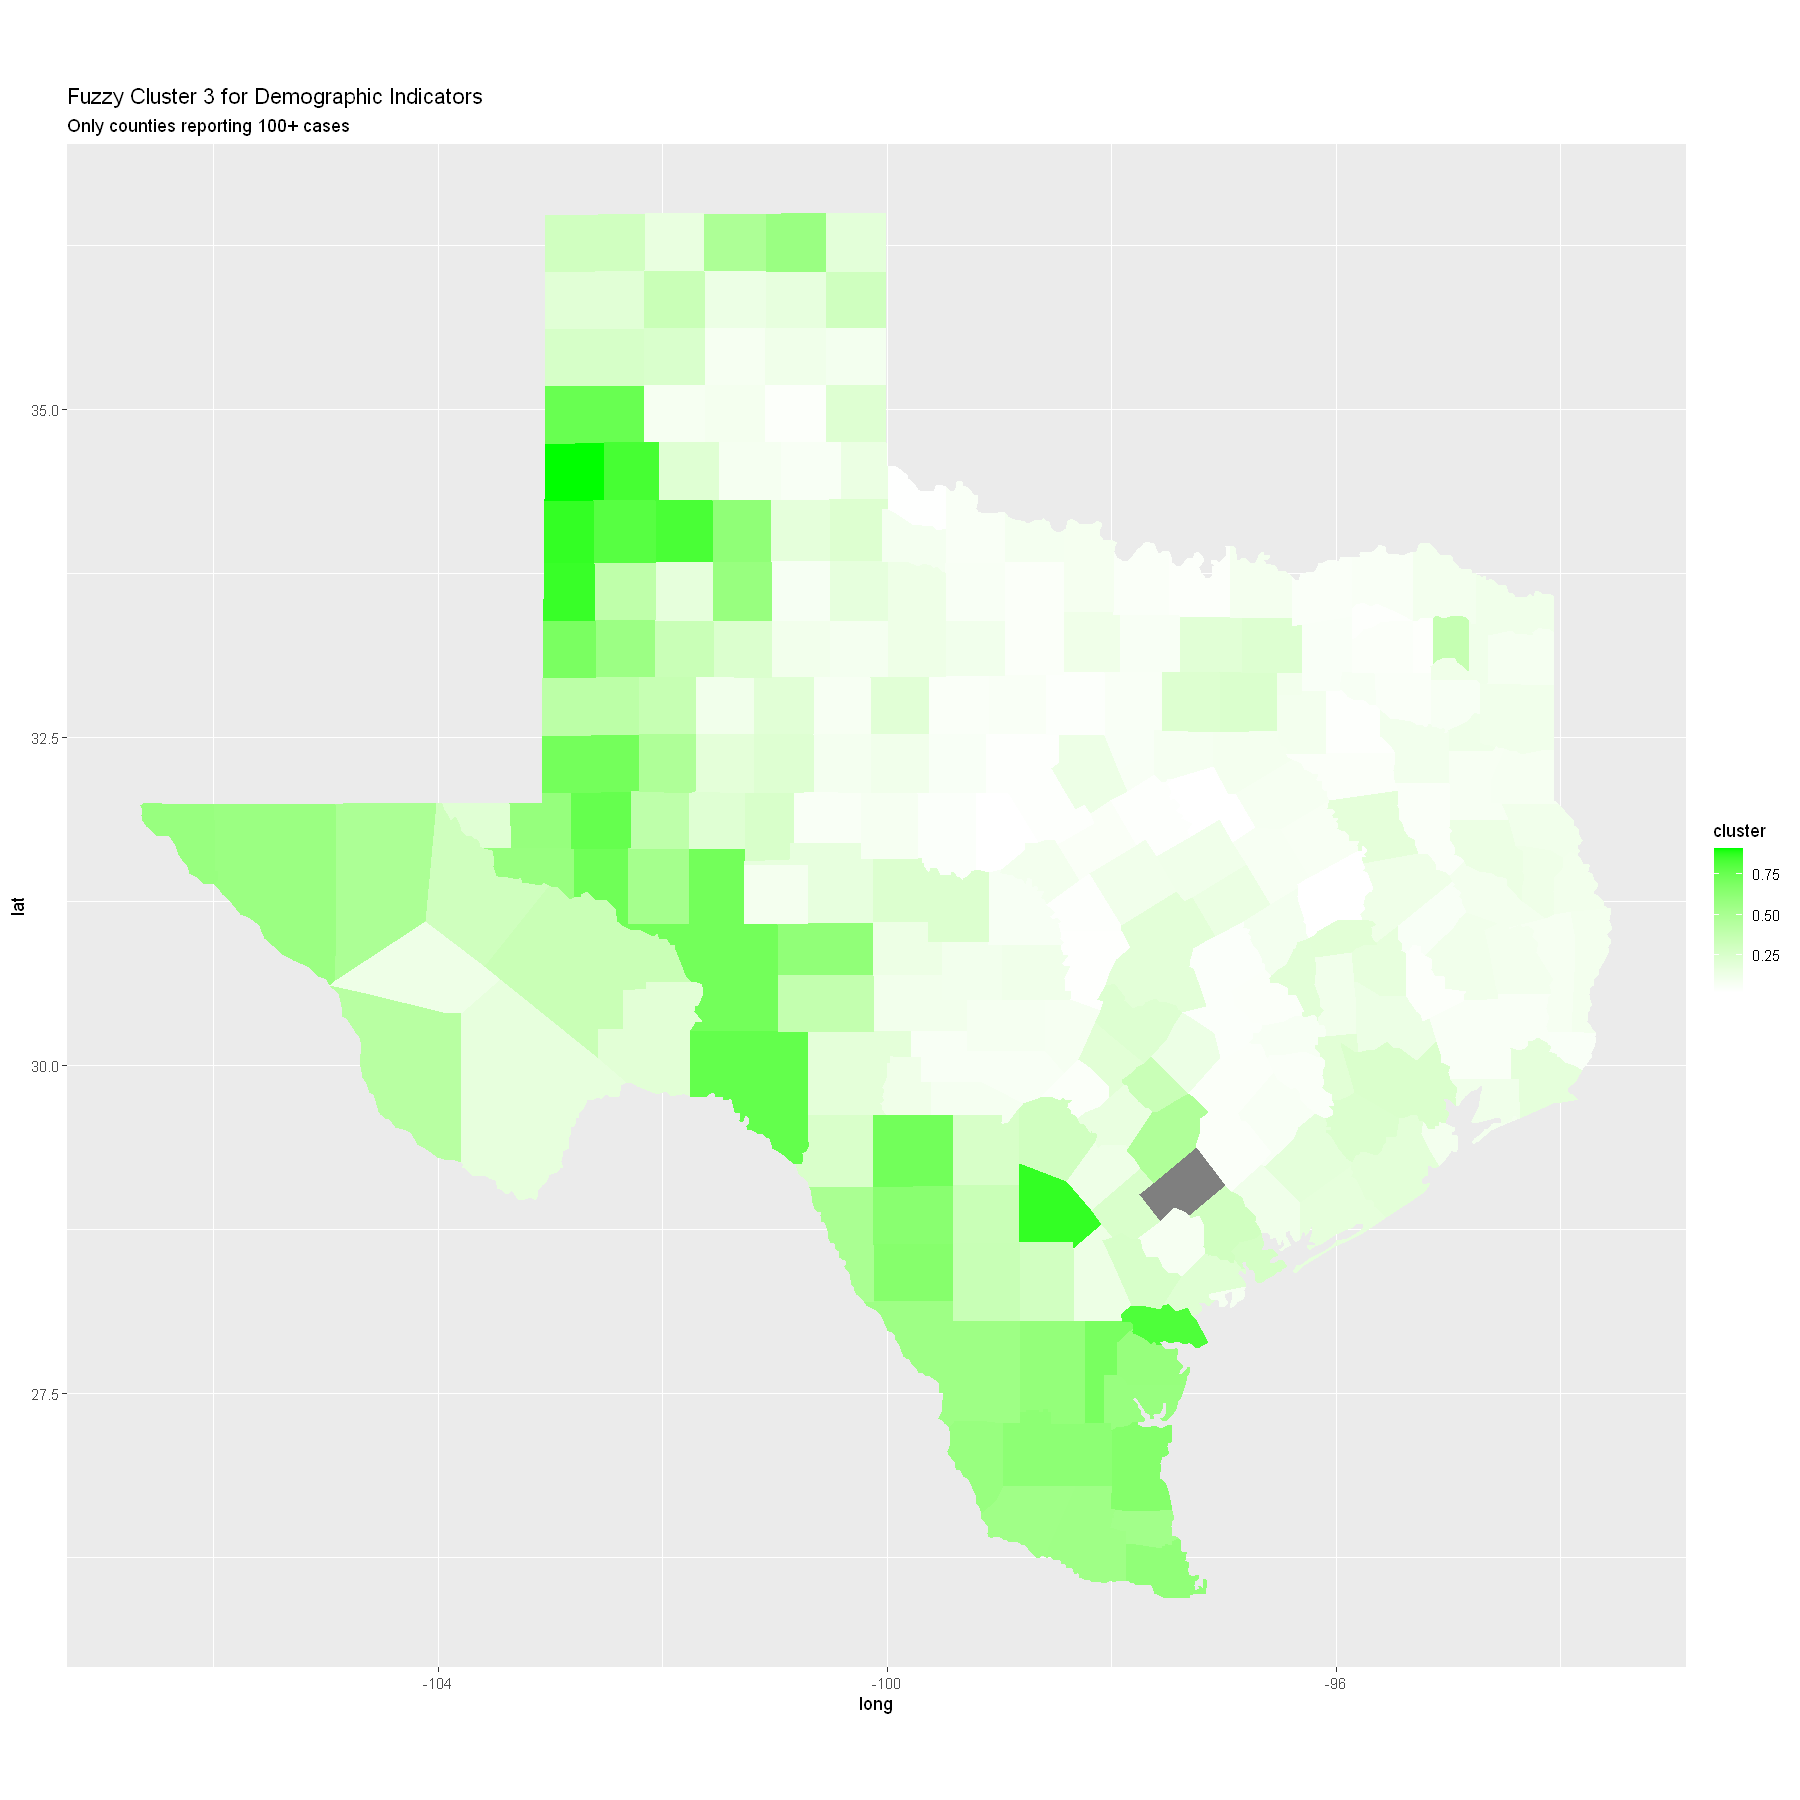

In [466]:
ggplot(fc_clust_3, aes(long, lat)) + 
  geom_polygon(data = fc_clust_3, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "green") +
  labs(title = "Fuzzy Cluster 3 for Demographic Indicators", subtitle = "Only counties reporting 100+ cases")

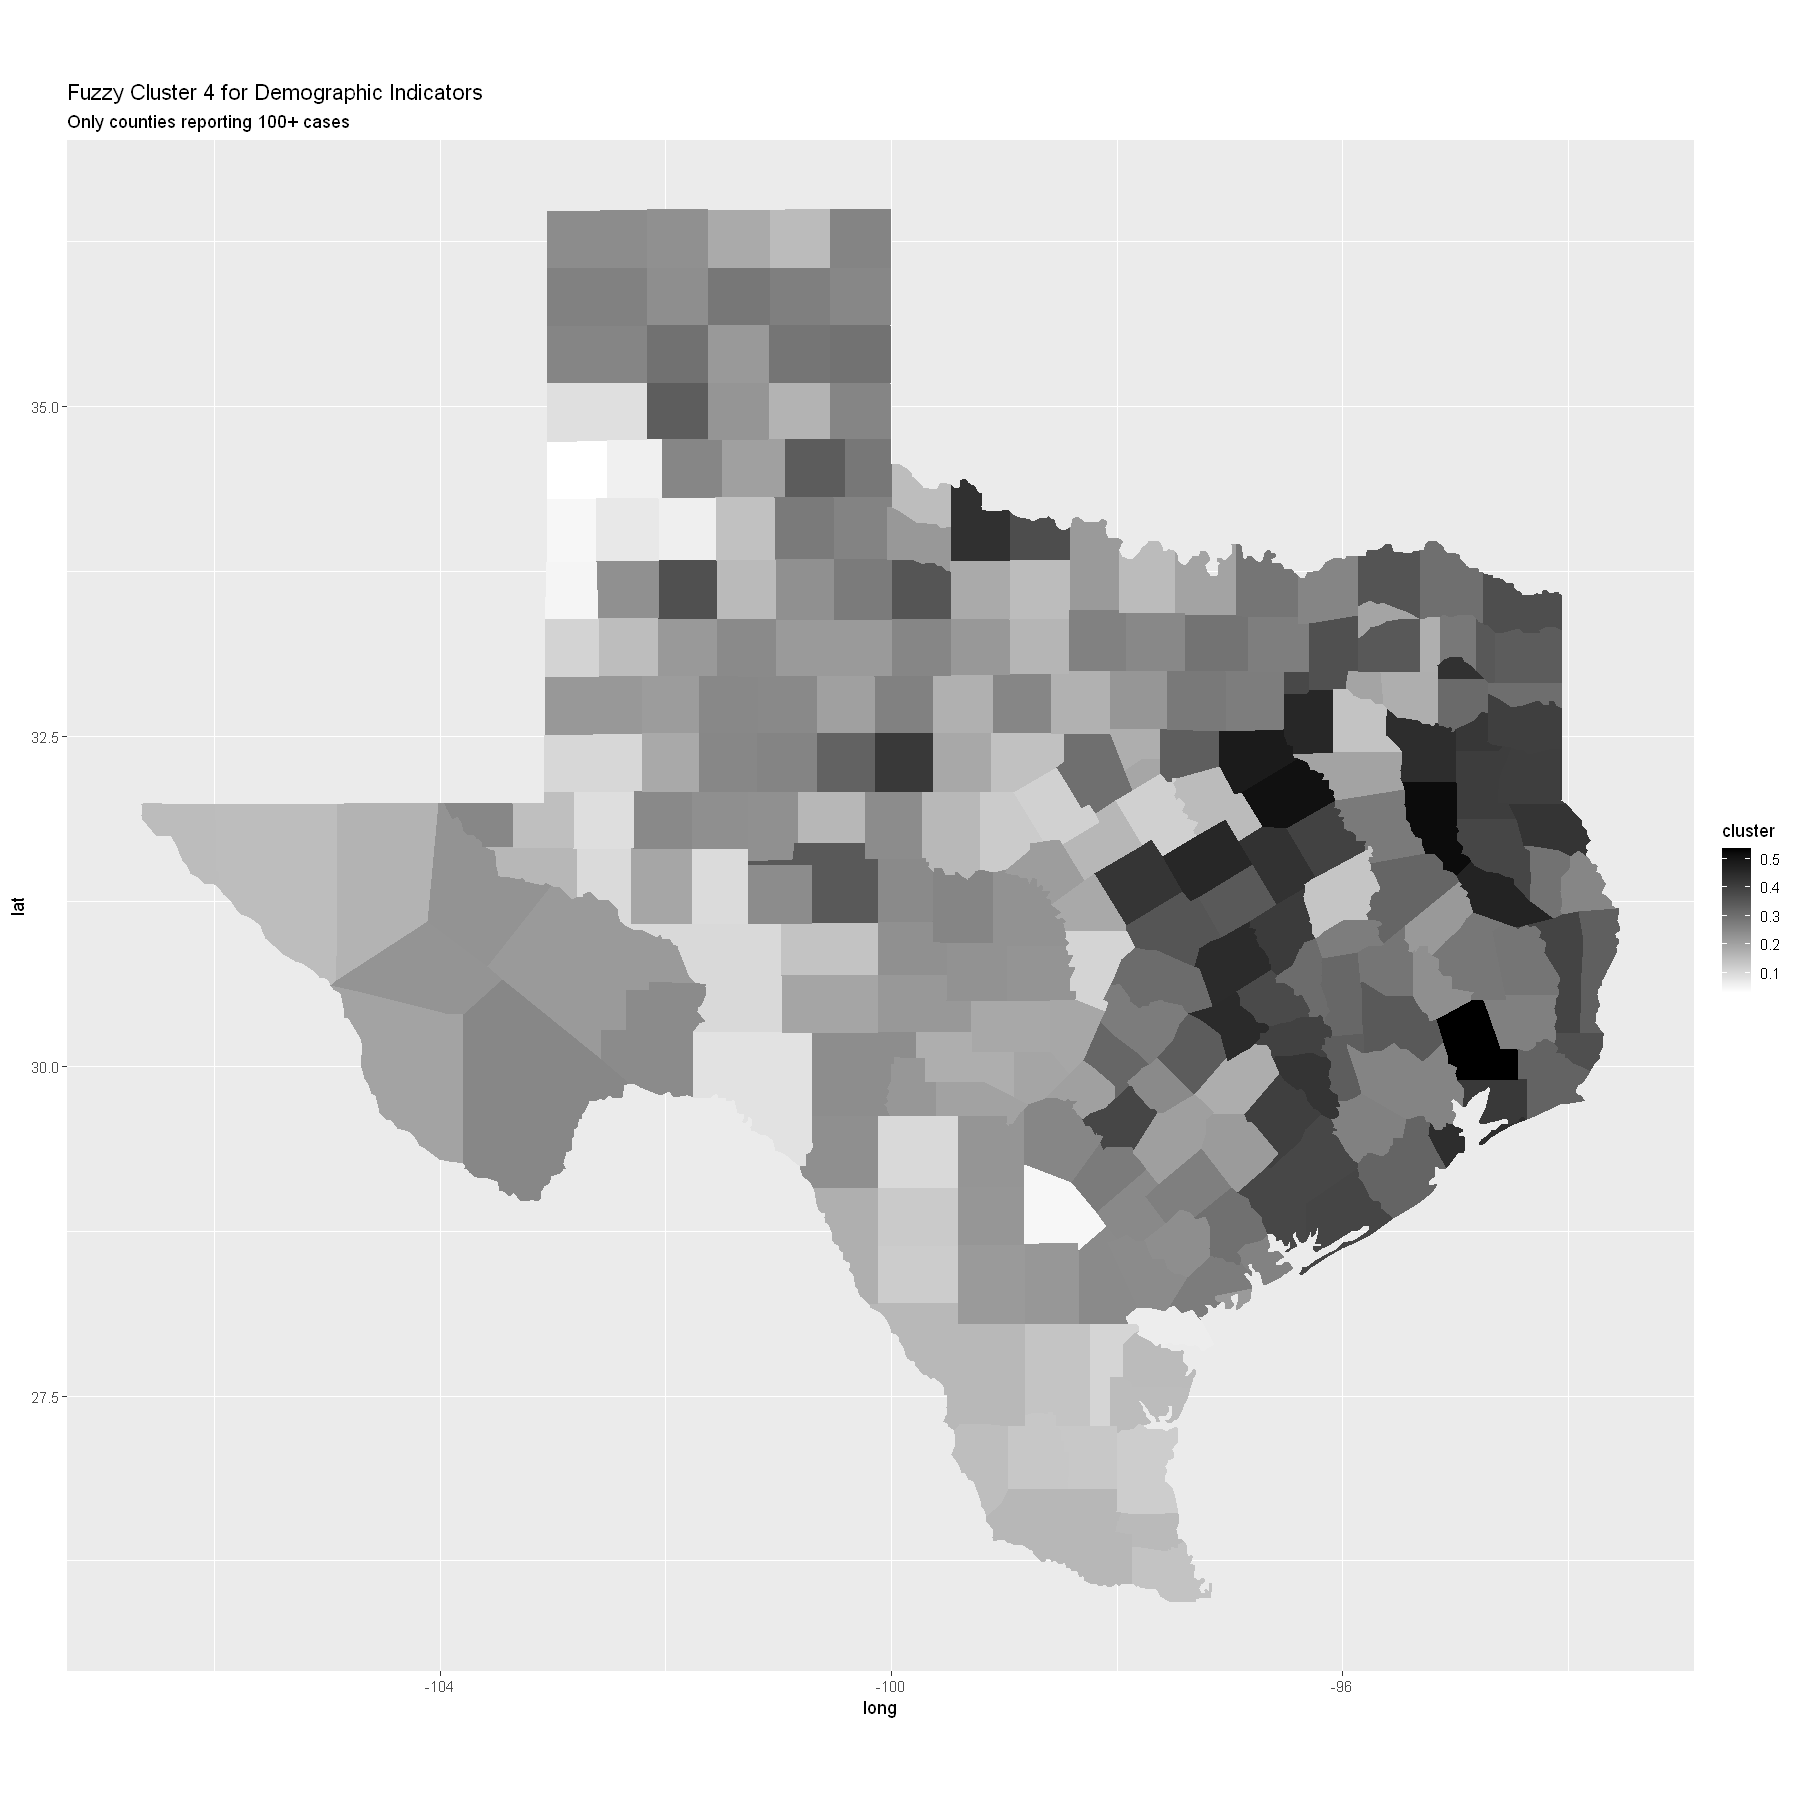

In [467]:
ggplot(fc_clust_4, aes(long, lat)) + 
  geom_polygon(data = fc_clust_4, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "black") +
  labs(title = "Fuzzy Cluster 4 for Demographic Indicators", subtitle = "Only counties reporting 100+ cases")

In [468]:
row_max_indices <- apply(fc$membership, 1, which.max)

In [469]:
demo_data_hc <- demo_data %>% add_column(cluster = row_max_indices)

demo_data_hc %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<int>,<dbl>,<dbl>,<dbl>
1,66.76740,1.737073,0.02683933
2,79.58692,1.923045,0.02591436
3,96.41436,2.448644,0.02620083
4,72.58053,1.358244,0.01959430


### Fuzzy Cluster Observations
4 has lower deaths per case

# Partitioning Around Medoids (PAM) Clustering


In [470]:
dist_demo <- dist(demo_data_prepped)

In [471]:
p <- pam(dist_demo, k=6)

In [472]:
demo_data_p <- demo_data_prepped %>% add_column(cluster = factor(p$cluster))

In [473]:
counties_TX_p <- counties_TX %>% left_join(demo_data %>% add_column(cluster = demo_data_p$cluster))

Joining, by = "county"


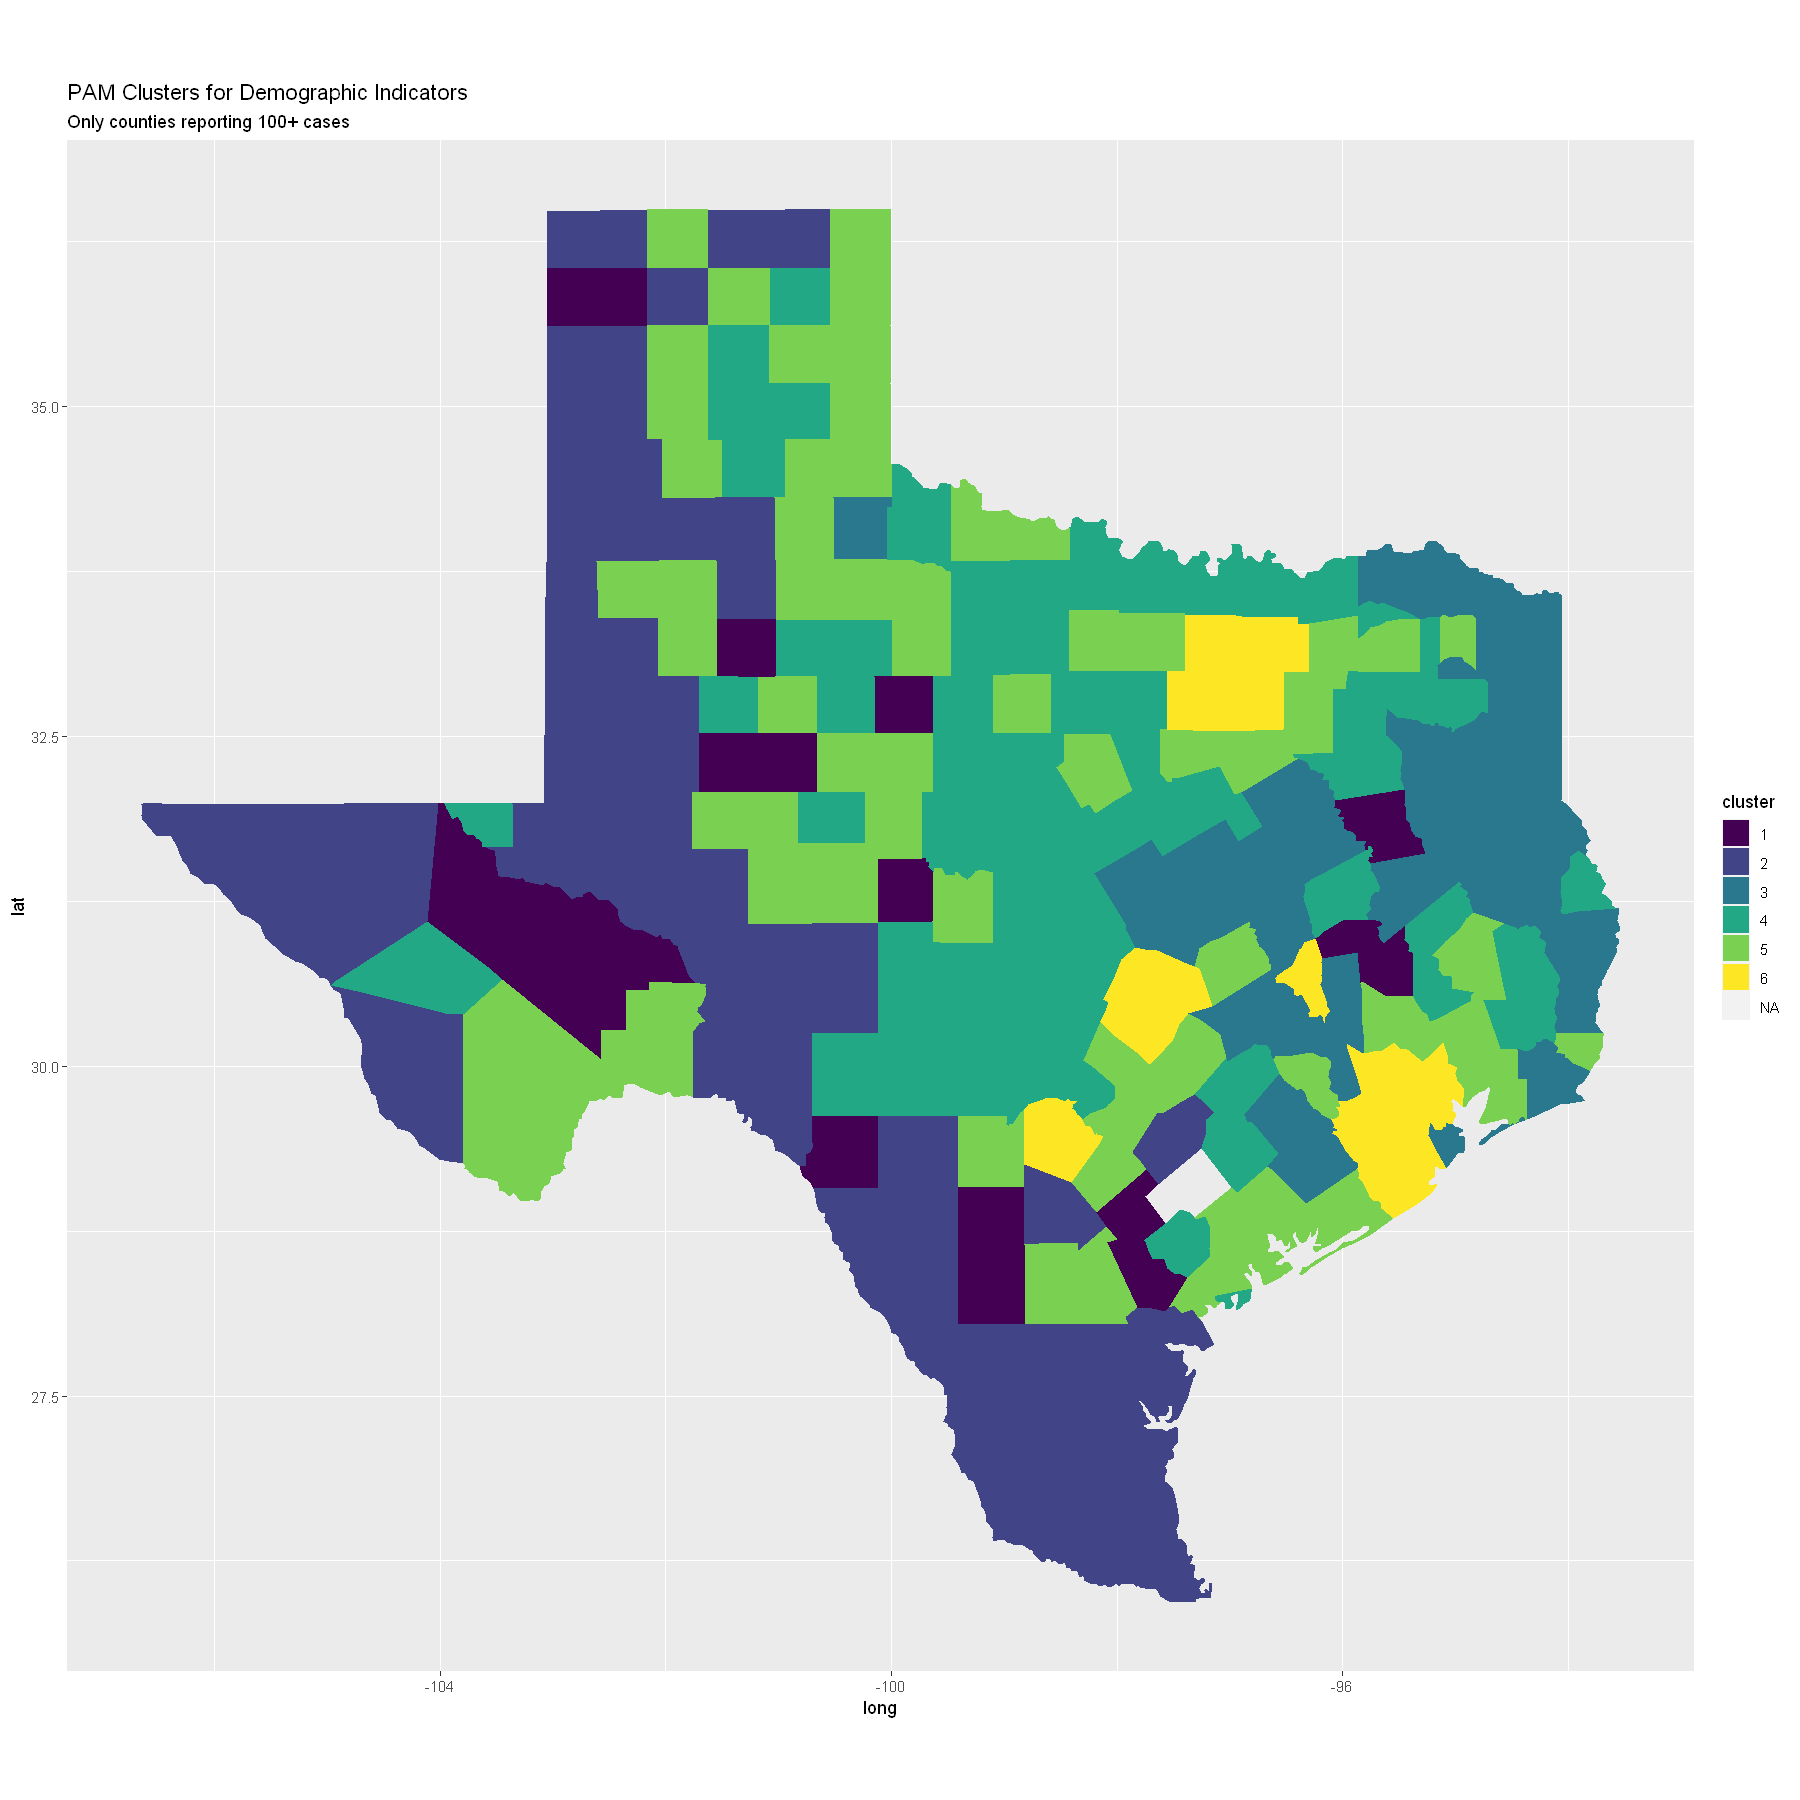

In [485]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_p, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "PAM Clusters for Demographic Indicators", subtitle = "Only counties reporting 100+ cases")

In [475]:
demo_data_p <- demo_data %>% add_column(cluster = factor(p$cluster))

demo_data_p %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,87.99641,1.6127499,0.02015863
2,96.84889,2.5405201,0.02710684
3,63.62517,1.6567932,0.02700799
4,65.32981,1.6651095,0.02579769
5,82.44806,1.8418580,0.02368562
6,71.81667,0.7378485,0.01026435


### PAM Observations
+ 6 has less deaths per case
+ interesting how the demo PAM looks similar to the social economic PAM

# Transportation Indicators Dataset Analysis

## K - means Clustering

In [516]:
trans_data_prepped <- transport_data[, !(colnames(transport_data) %in% c("county_name.x", "cases_per_1000", "deaths_per_1000", "death_per_case"))]


In [517]:
set.seed(123)
km <- kmeans(trans_data_prepped, centers = 4)
km

K-means clustering with 4 clusters of sizes 151, 48, 51, 4

Cluster means:
  pop_density commuters_by_public_transportation percent_commute_by_bus
1 -0.03778738                         -0.1048955            -0.03230419
2 -0.07200948                         -0.1003529            -0.12675343
3 -0.27658190                         -0.1527516            -0.17865205
4  5.81700658                          7.1116227             5.01833785
  percent_commute_by_car_truck_van percent_commute_by_carpool
1                        0.3387665                 -0.3822799
2                       -1.3703490                 -0.2705808
3                        0.3425281                  1.4003790
4                       -0.7114805                 -0.1767951
  percent_commute_by_subway percent_commute_by_driving_alone percent_wfh
1                -0.1073005                        0.5596659  -0.2555349
2                 0.3621209                       -0.8996405   1.3682880
3                -0.1922758         

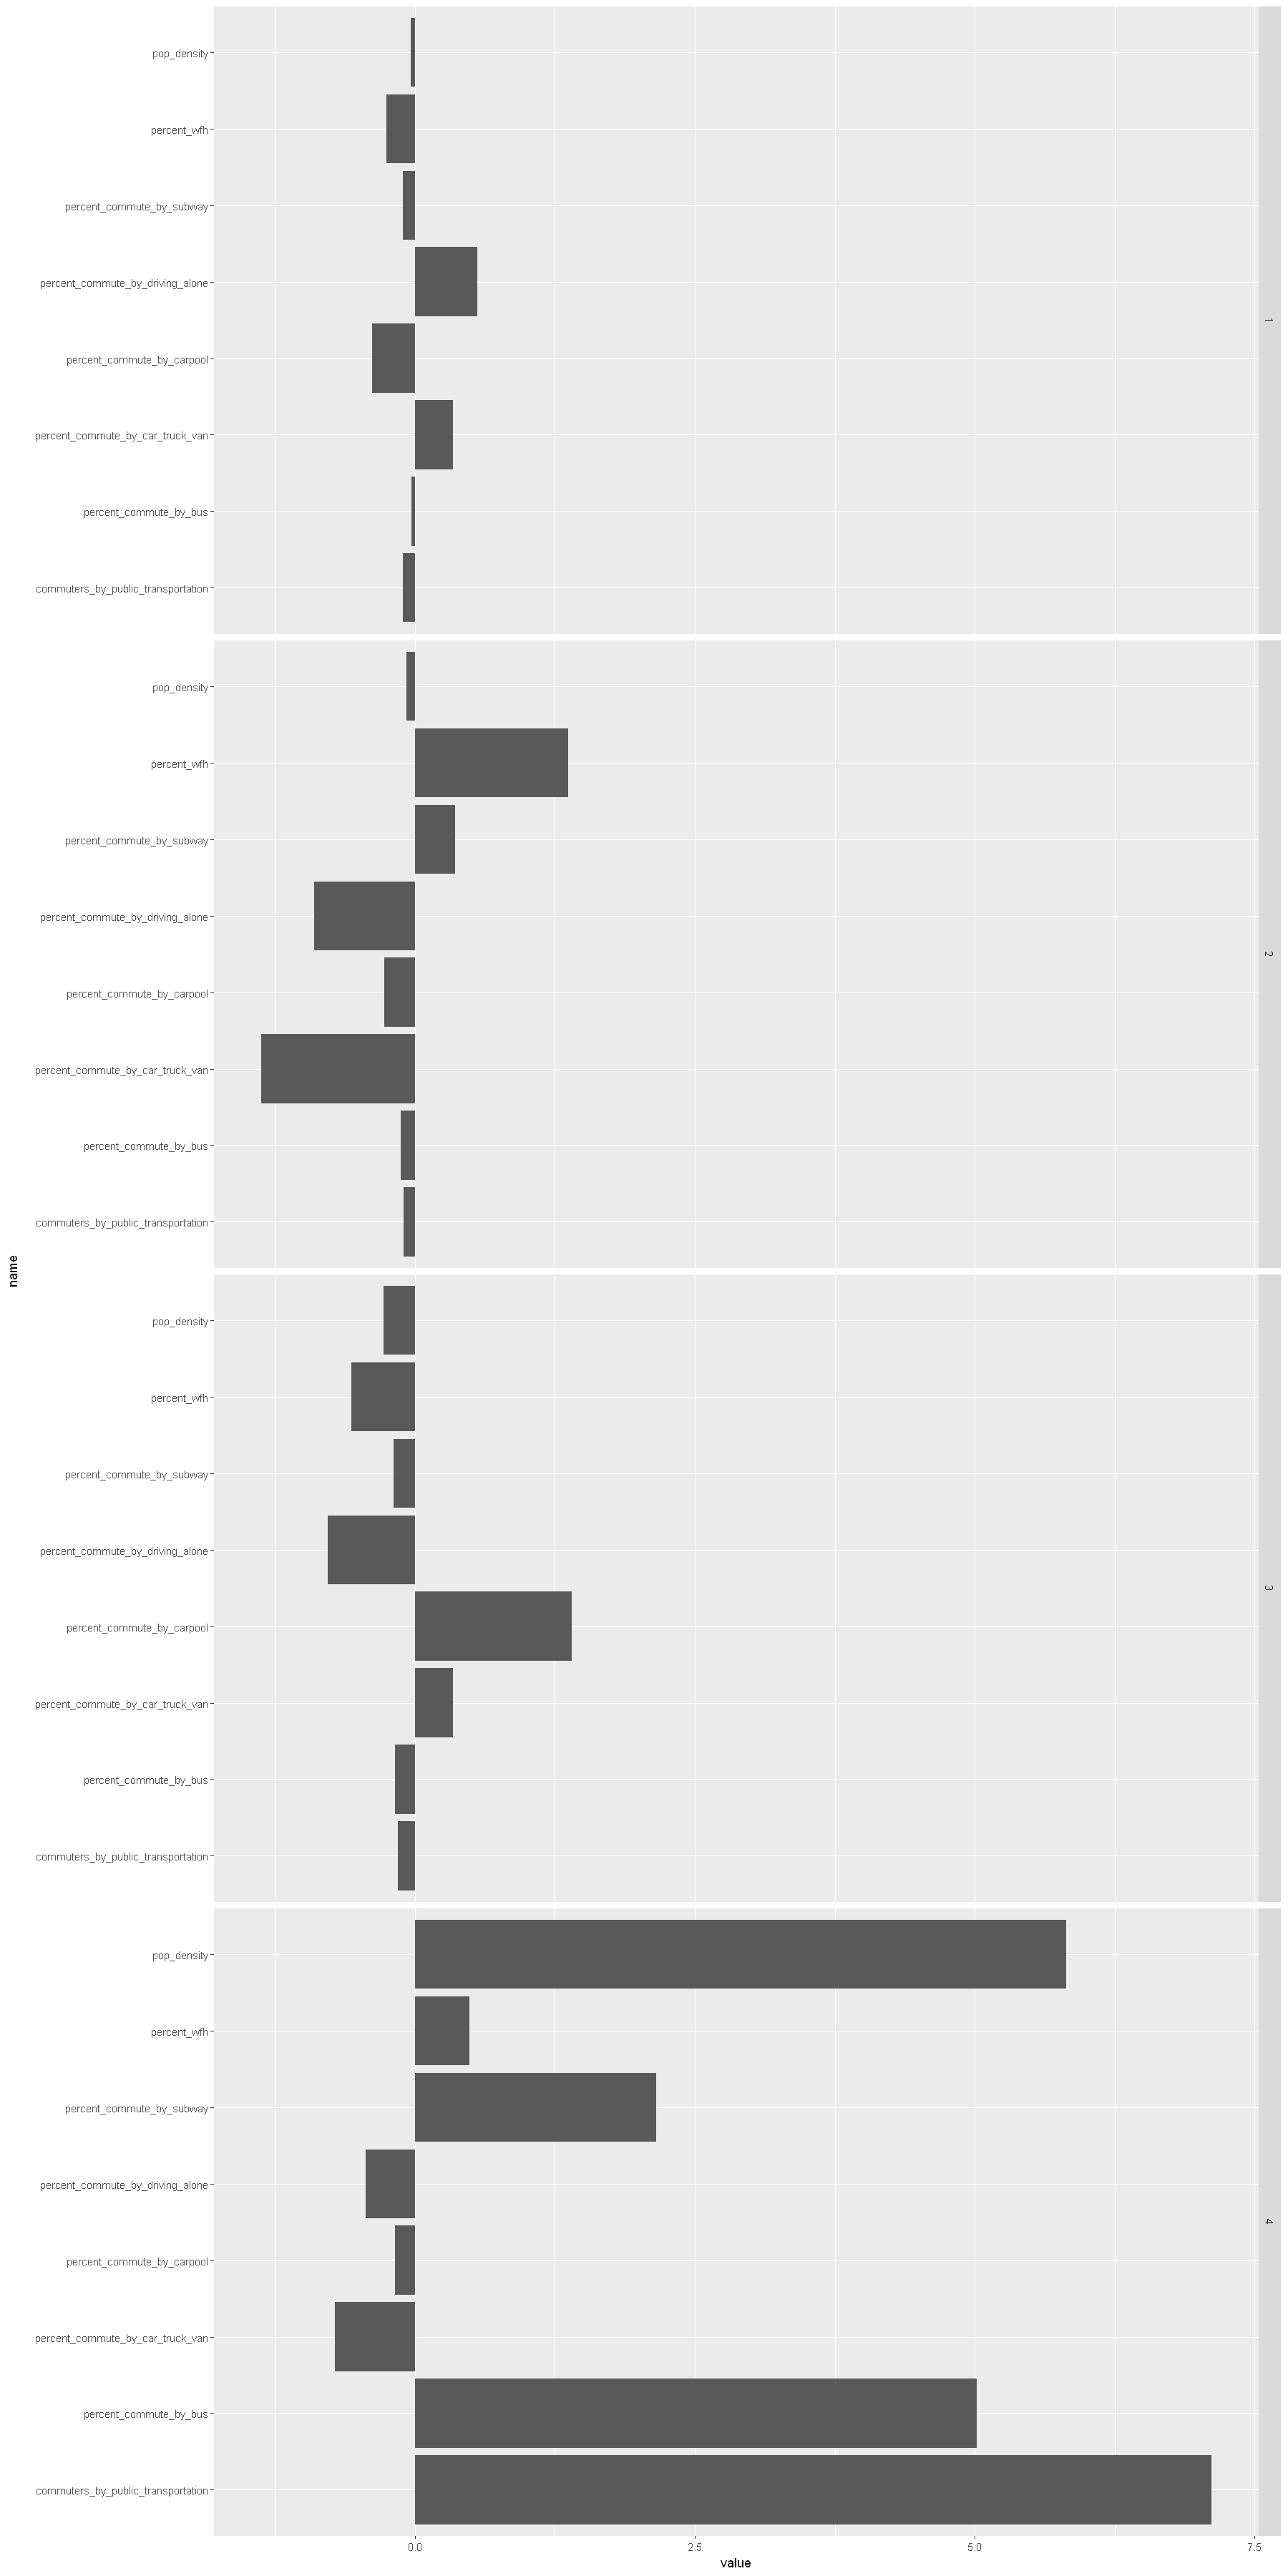

In [518]:
options(repr.plot.width = 15, repr.plot.height = 30)
ggplot(pivot_longer(as_tibble(km$centers,  rownames = "cluster"), 
  cols = colnames(km$centers)), 
  aes(y = name, x = value)) +
  geom_bar(stat = "identity") +
  facet_grid(rows = vars(cluster))

In [521]:
transport_data <- transport_data %>% mutate(county = county_name.x %>% 
                                            str_to_lower() %>% str_replace('\\s+county\\s*$', ''))
counties_TX_clust <- counties_TX %>% left_join(transport_data %>% 
    add_column(cluster = factor(km$cluster)))

Joining, by = "county"


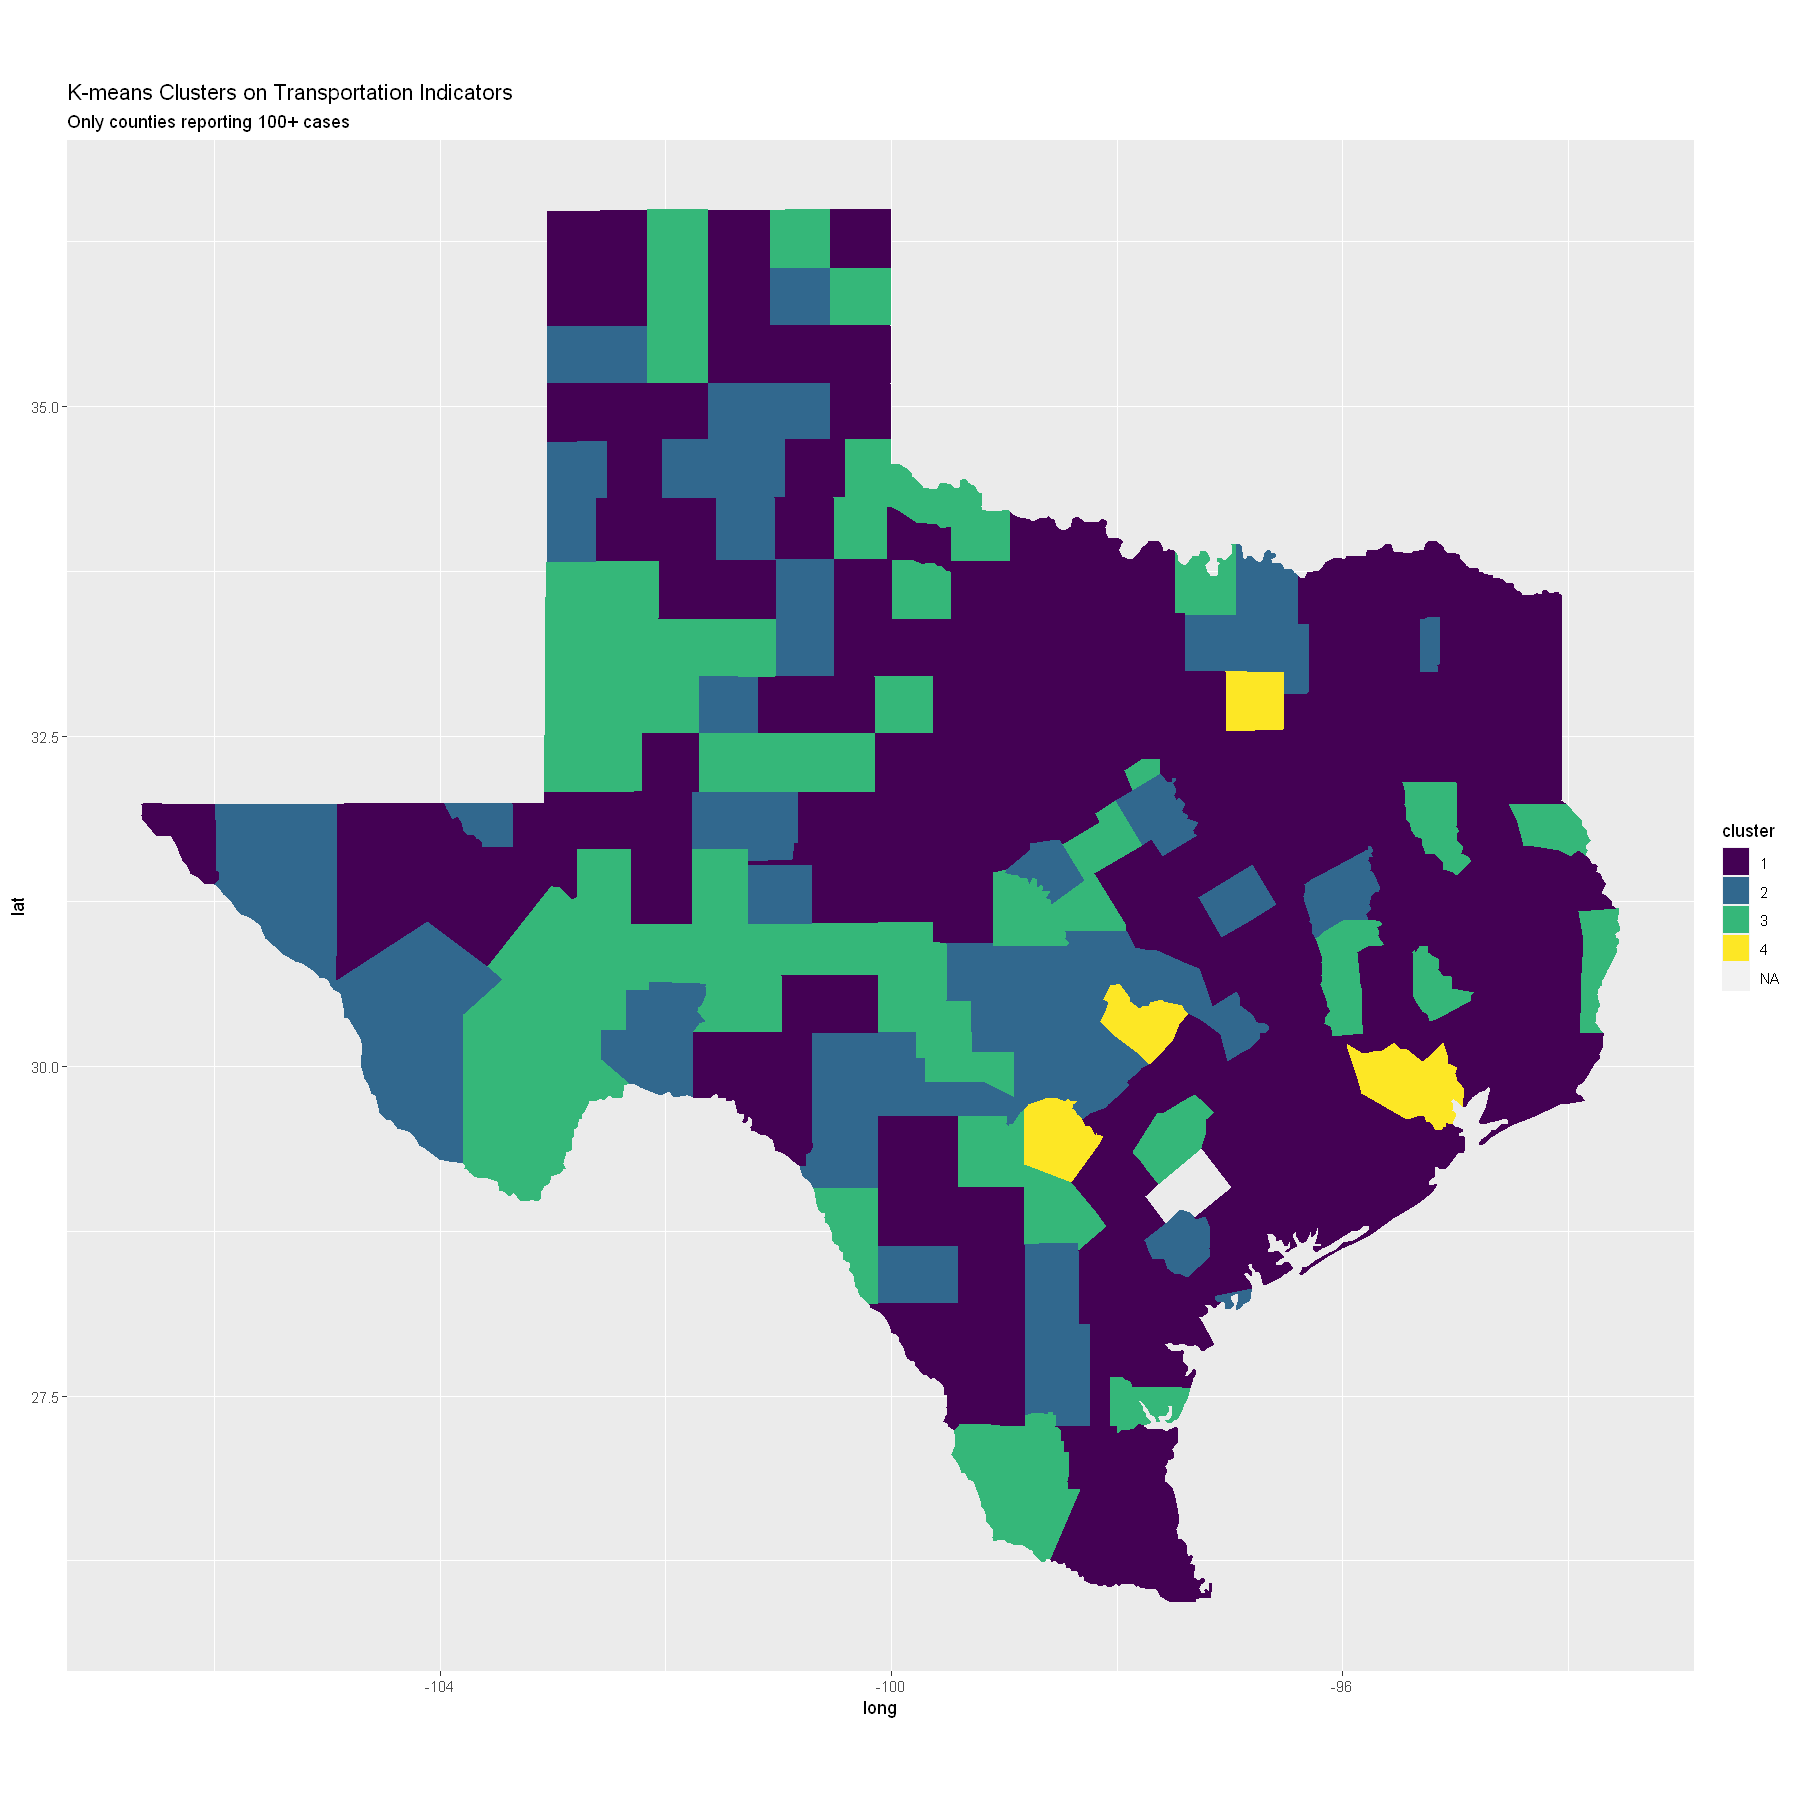

In [523]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_clust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "K-means Clusters on Transportation Indicators", subtitle = "Only counties reporting 100+ cases")

In [524]:
transport_data_km <- transport_data %>% add_column(cluster = factor(km$cluster))

transport_data_km %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,77.60872,1.826598,0.02446844
2,70.28588,1.604703,0.02248344
3,86.83734,2.254151,0.02844891
4,71.97720,0.854151,0.01184933


### K - means Observations
+ 4 lower deaths per case
+ 3 higher avg cases

# Hierarchical Clustering

In [527]:
set.seed(420)
dist_trans_prepped <- dist(trans_data_prepped)
hc <- hclust(dist_trans_prepped, method="complete")

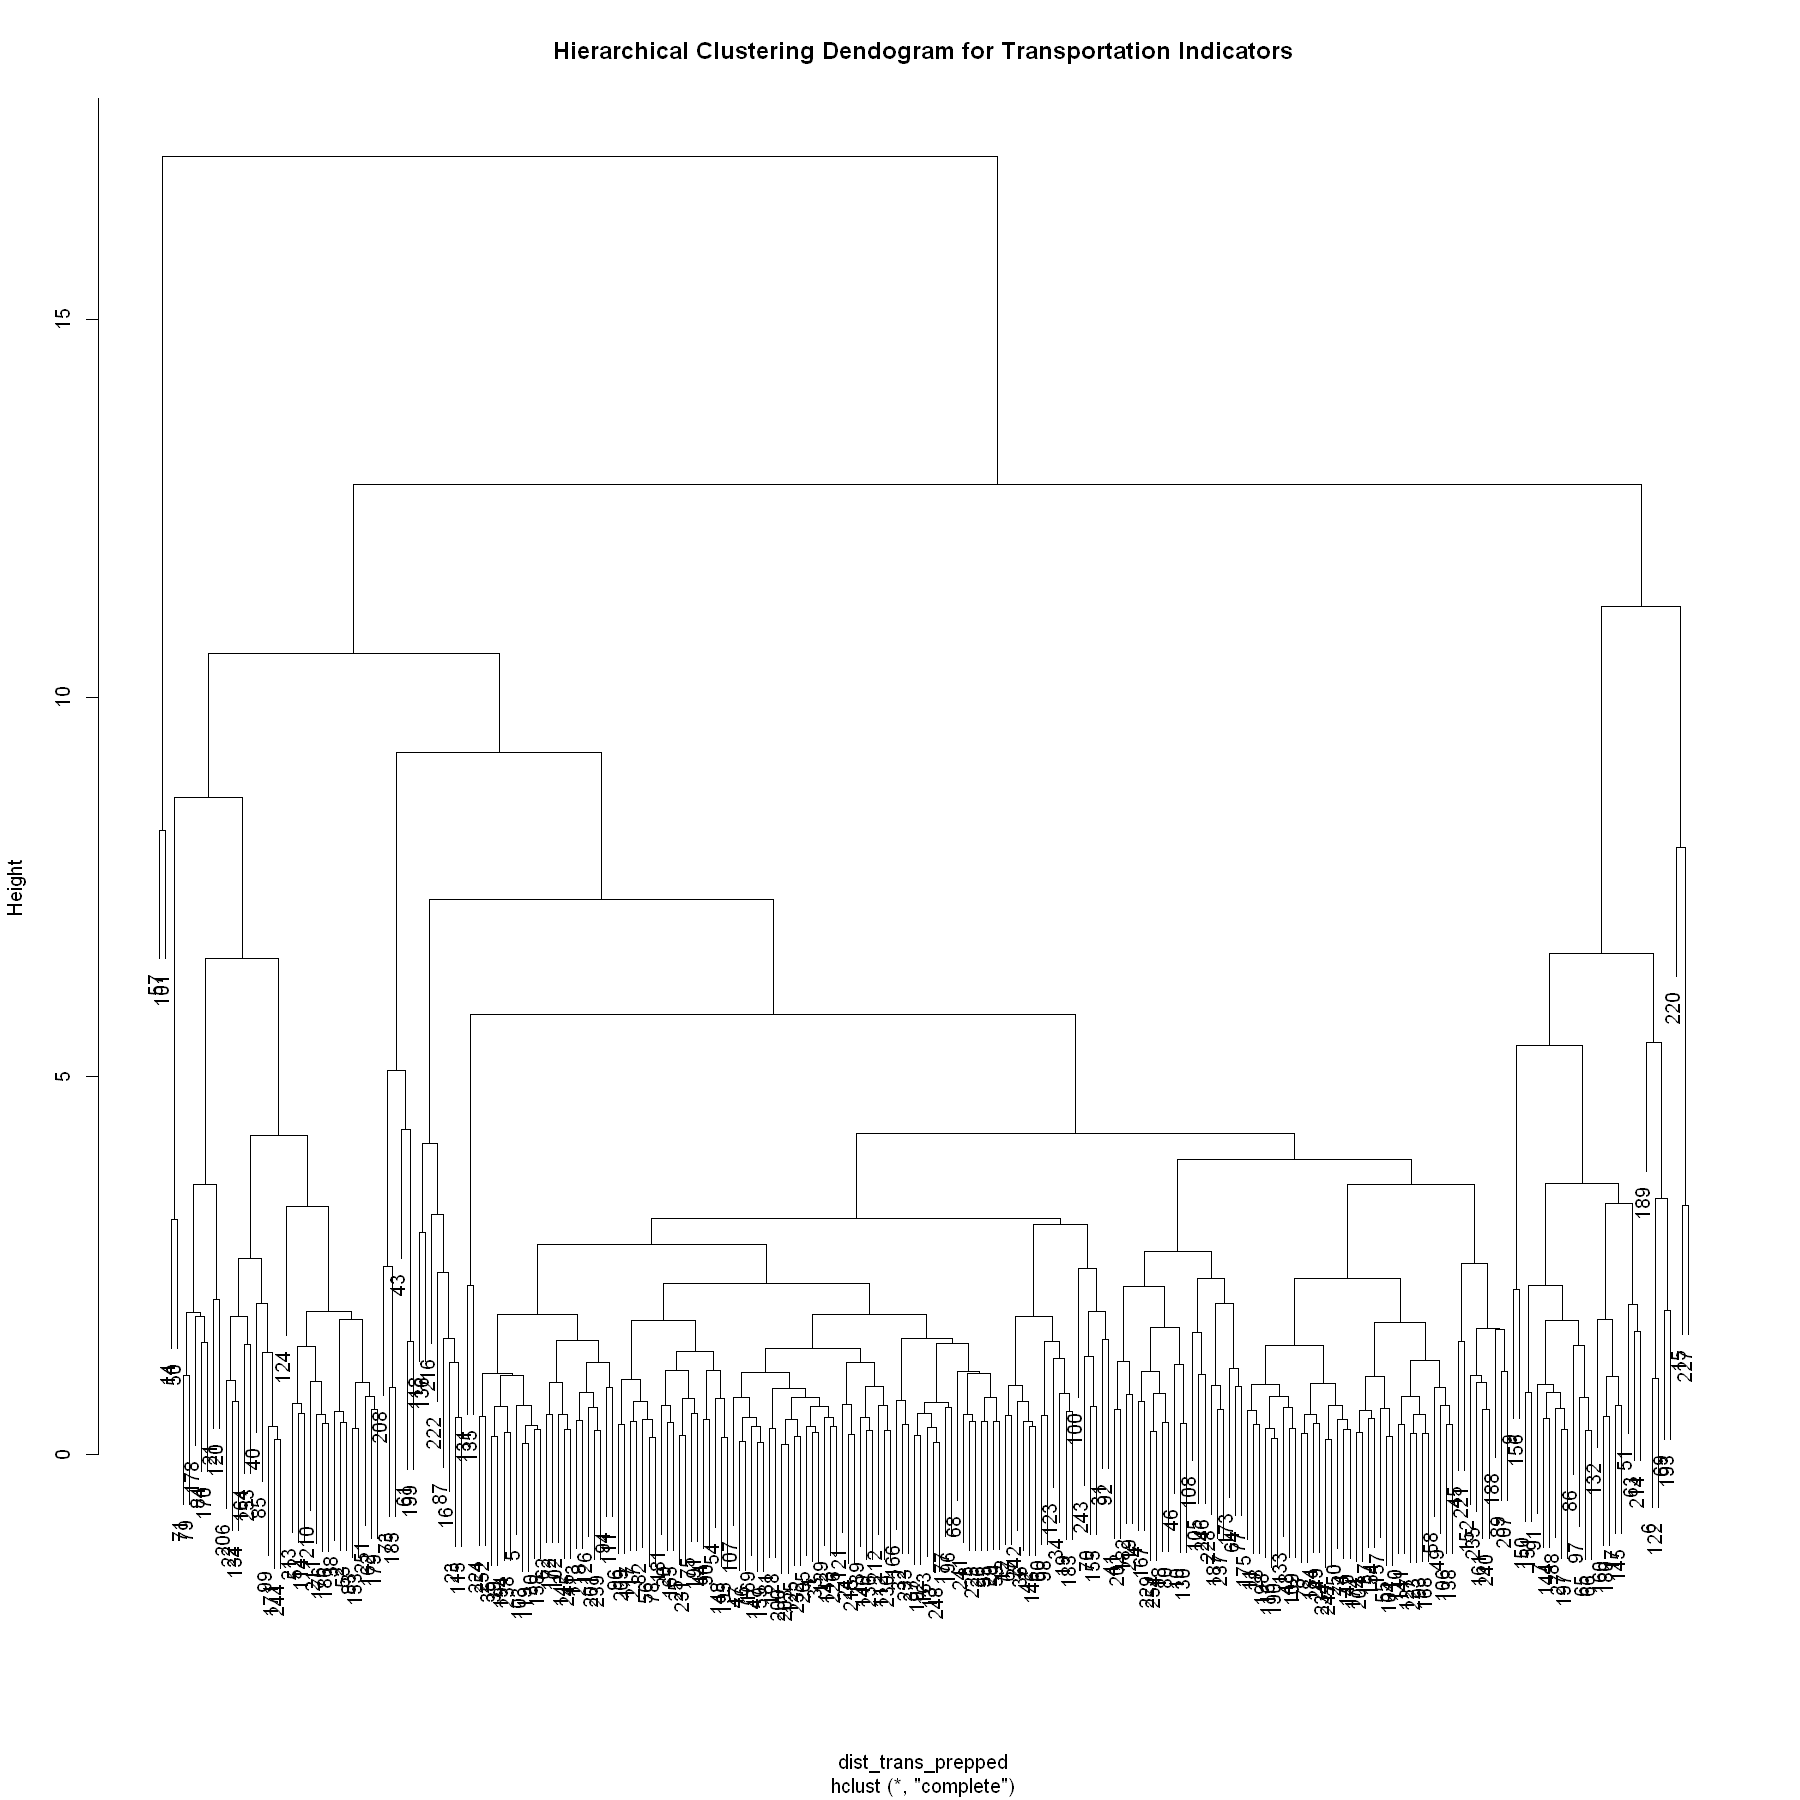

In [528]:
plot(hc, main = "Hierarchical Clustering Dendogram for Transportation Indicators")

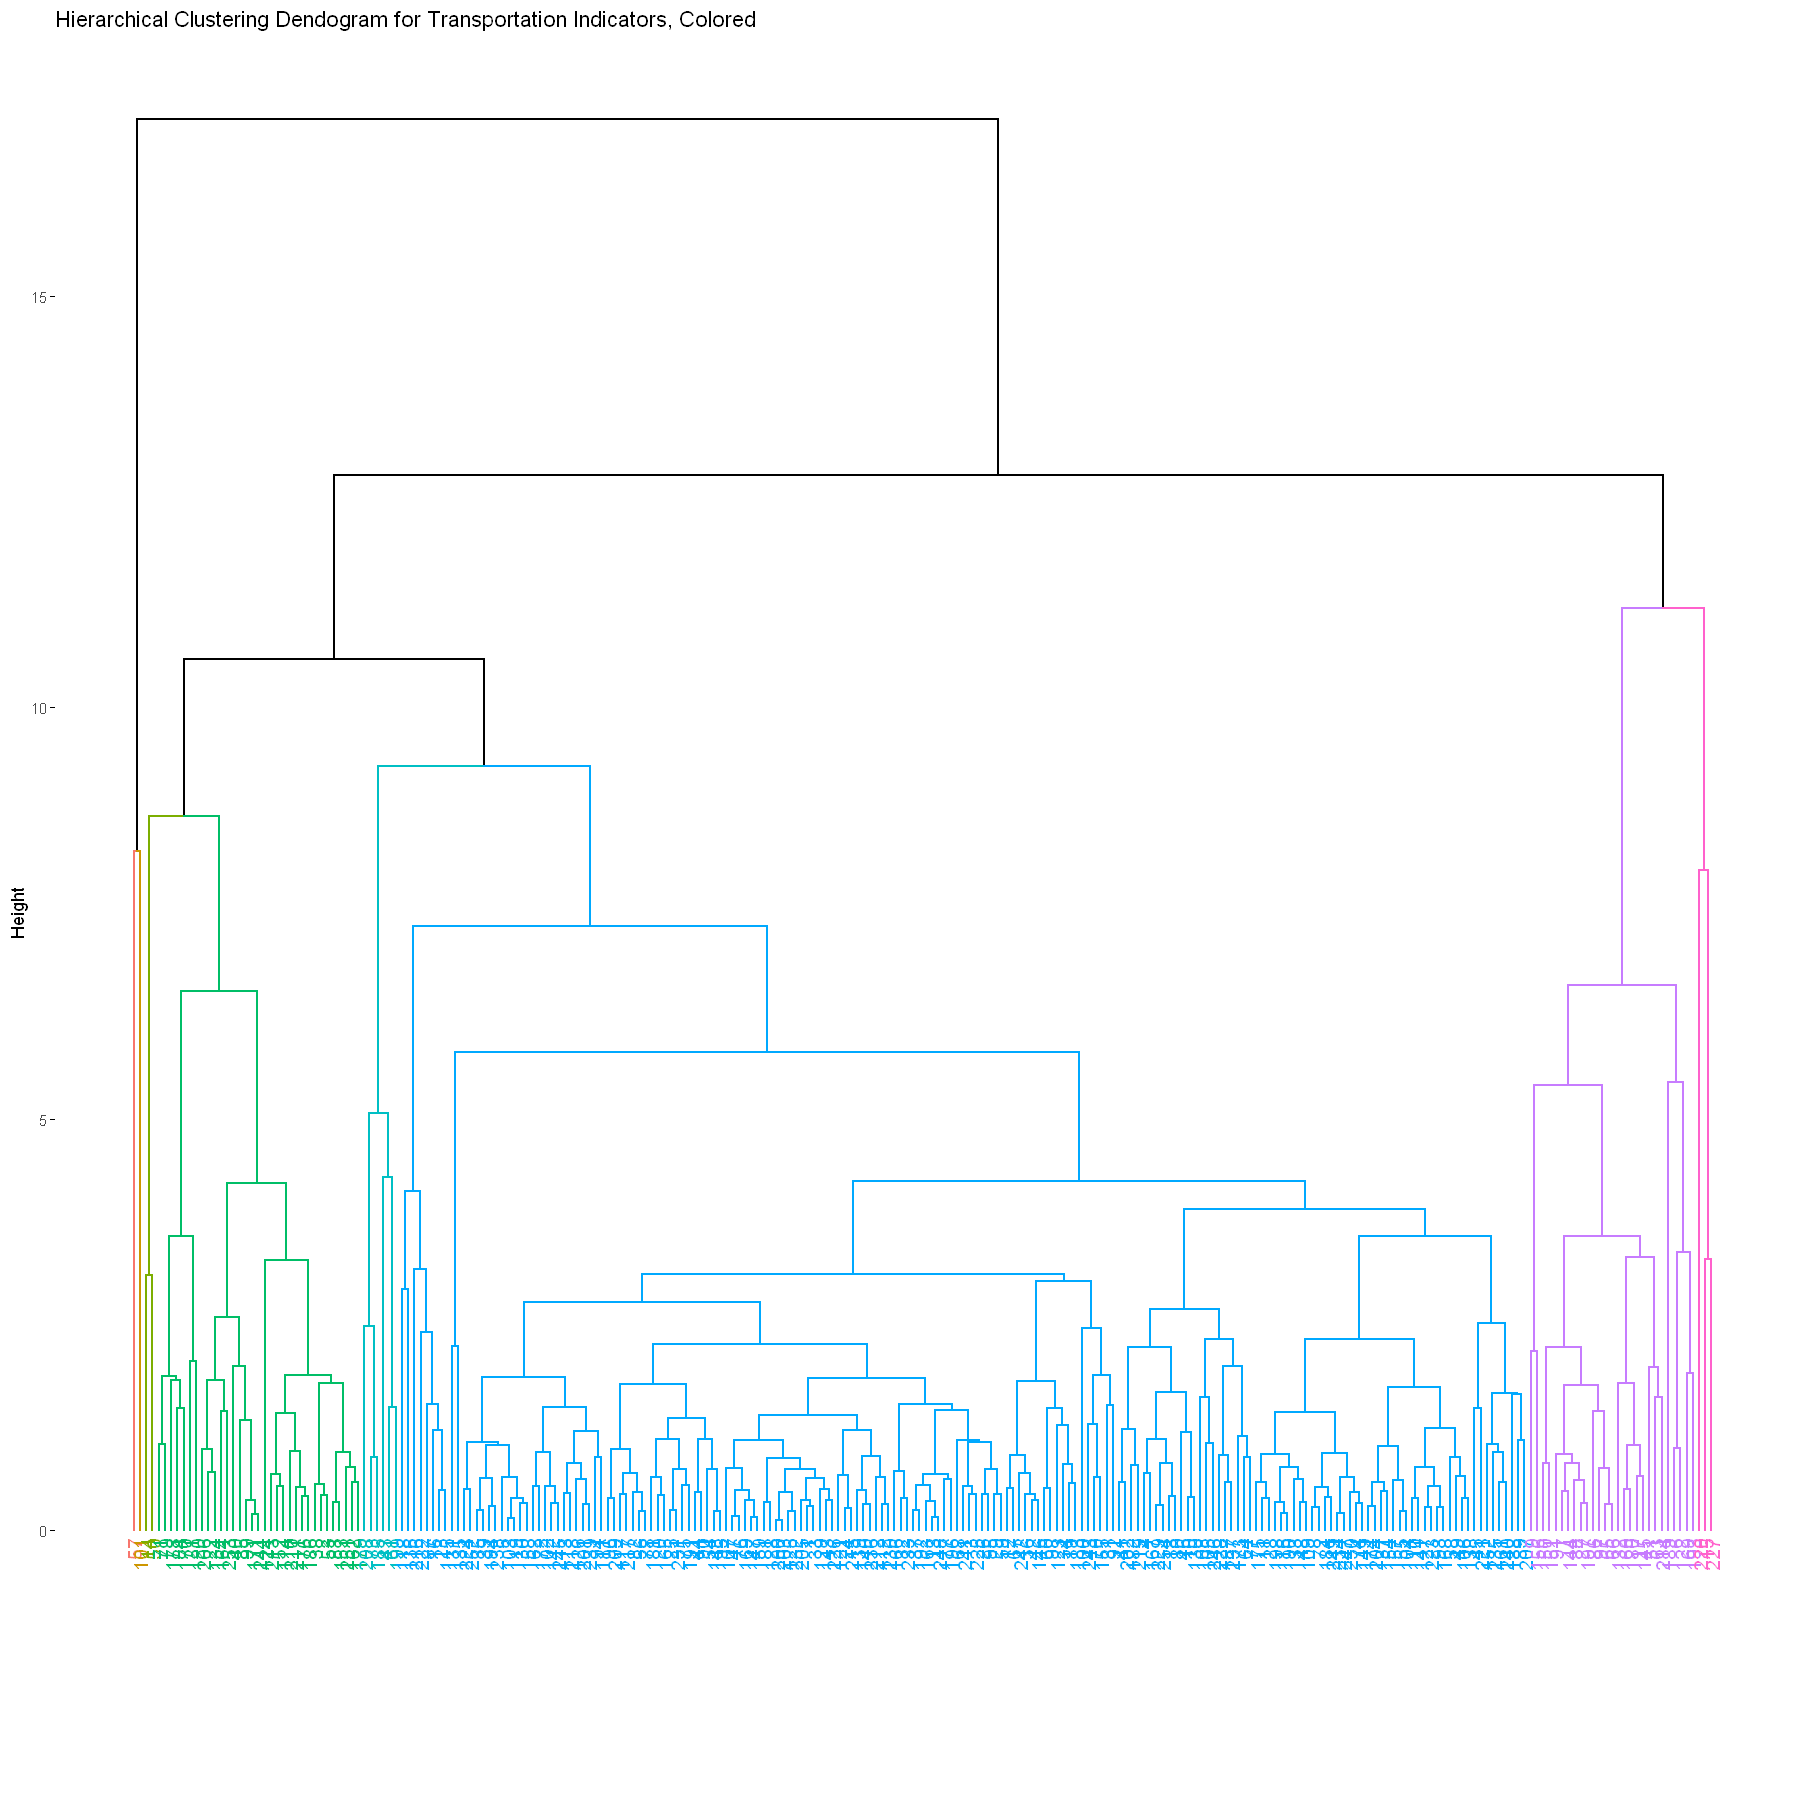

In [529]:
fviz_dend(hc, k=8, main = "Hierarchical Clustering Dendogram for Transportation Indicators, Colored")

In [530]:
h_clusters <- cutree(hc, k=8)
trans_data_hclust <- trans_data_prepped %>% add_column(cluster = factor(h_clusters))

In [531]:
counties_TX_hclust <- counties_TX %>% left_join(transport_data %>% 
    add_column(cluster = trans_data_hclust$cluster))

Joining, by = "county"


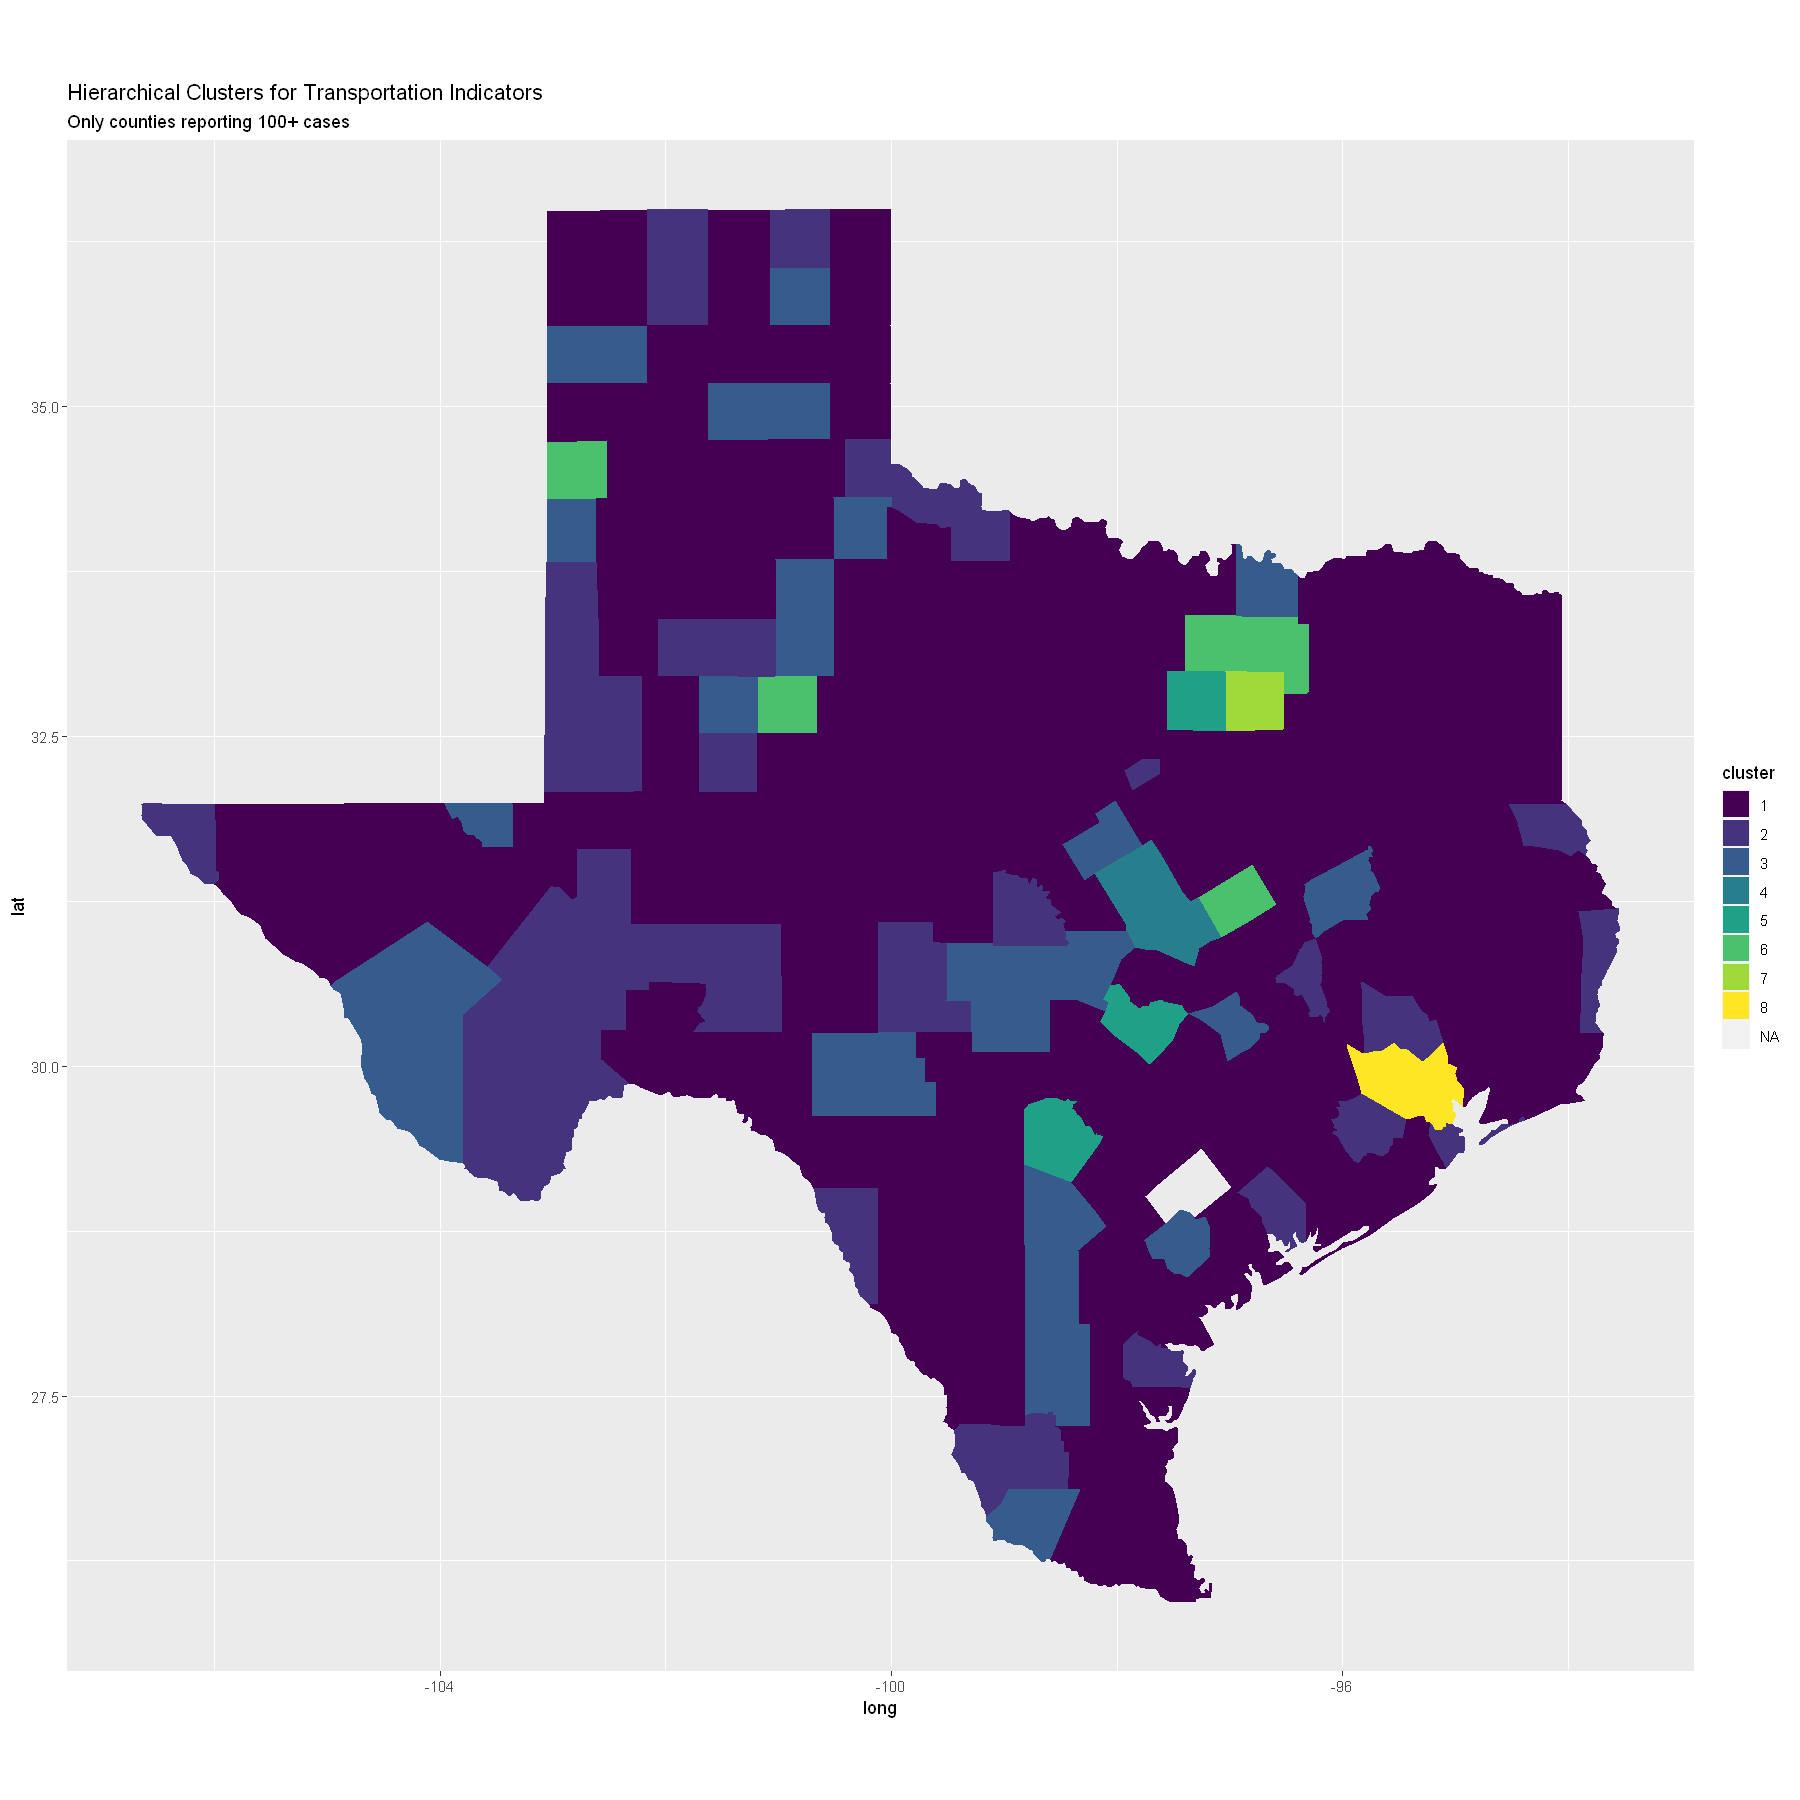

In [532]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_hclust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Hierarchical Clusters for Transportation Indicators", subtitle = "Only counties reporting 100+ cases")

In [533]:
trans_data_dc <- transport_data %>% add_column(cluster = trans_data_hclust$cluster)

trans_data_dc %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,76.62092,1.8591009,0.02519727
2,88.96342,2.0609591,0.02602549
3,73.05252,1.9274010,0.02520083
4,52.97100,0.6147368,0.01169813
5,77.08883,0.8388897,0.01092698
6,90.04007,1.5198639,0.01537866
7,91.93002,0.9611267,0.01045498
8,63.27584,0.8452069,0.01335750


### HClust Observations
+ 4,5,6,7,8 low deaths per case
+ 4, 8 low avg case

## Fuzzy Clustering

In [534]:
fc <- cmeans(as.matrix(trans_data_prepped), centers = 4)
fc

Fuzzy c-means clustering with 4 clusters

Cluster centers:
  pop_density commuters_by_public_transportation percent_commute_by_bus
1  -0.1182030                         -0.1248663             -0.1964024
2   4.3564112                          4.9229898              4.2327463
3  -0.1038592                         -0.1006253             -0.1296128
4  -0.1822815                         -0.1204235             -0.1150062
  percent_commute_by_car_truck_van percent_commute_by_carpool
1                        0.3859672                 -0.4566729
2                       -0.6861004                 -0.1698697
3                       -0.7181693                 -0.1911774
4                        0.2460586                  0.7834537
  percent_commute_by_subway percent_commute_by_driving_alone percent_wfh
1               -0.11904015                        0.6535102  -0.3070222
2                1.56136893                       -0.4246011   0.6304669
3               -0.07002074                       -0

In [535]:
trans_data_fc <- transport_data %>% add_column(cluster = fc$membership)

In [536]:
counties_TX_fc <- counties_TX %>% left_join(trans_data_fc)

Joining, by = "county"


In [537]:
fc_clust_1 <- counties_TX_fc %>% mutate(cluster = cluster[,1])
fc_clust_2 <- counties_TX_fc %>% mutate(cluster = cluster[,2])
fc_clust_3 <- counties_TX_fc %>% mutate(cluster = cluster[,3])
fc_clust_4 <- counties_TX_fc %>% mutate(cluster = cluster[,4])

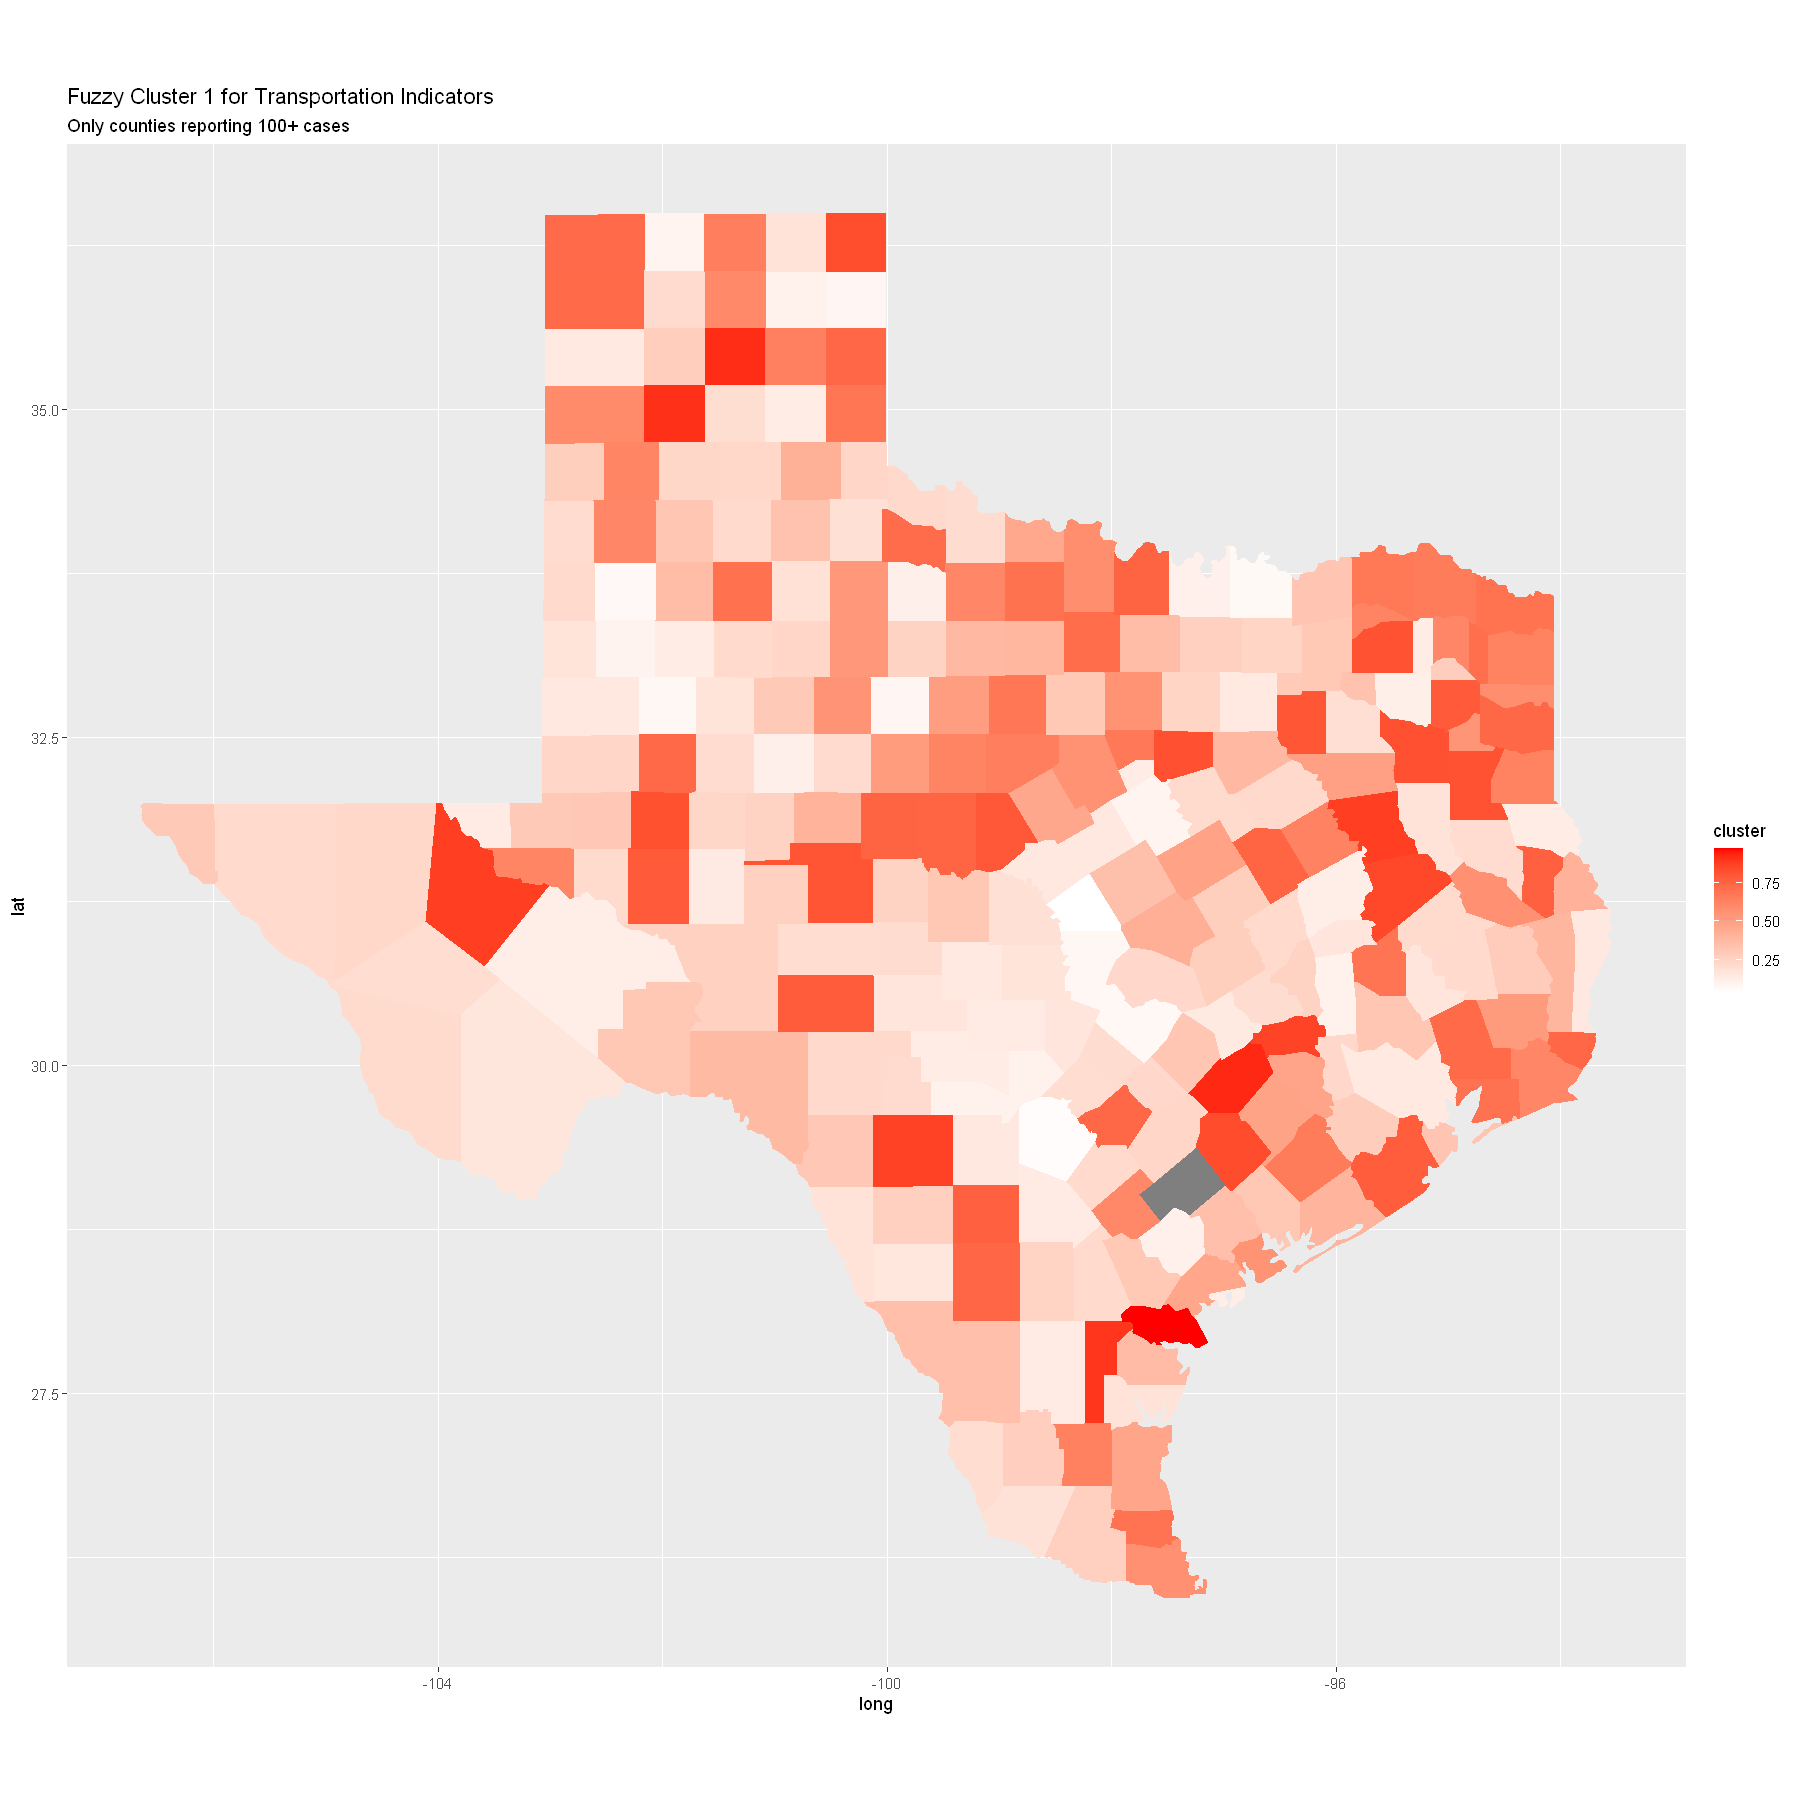

In [538]:
ggplot(fc_clust_1, aes(long, lat)) + 
  geom_polygon(data = fc_clust_1, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "red") +
  labs(title = "Fuzzy Cluster 1 for Transportation Indicators", subtitle = "Only counties reporting 100+ cases")

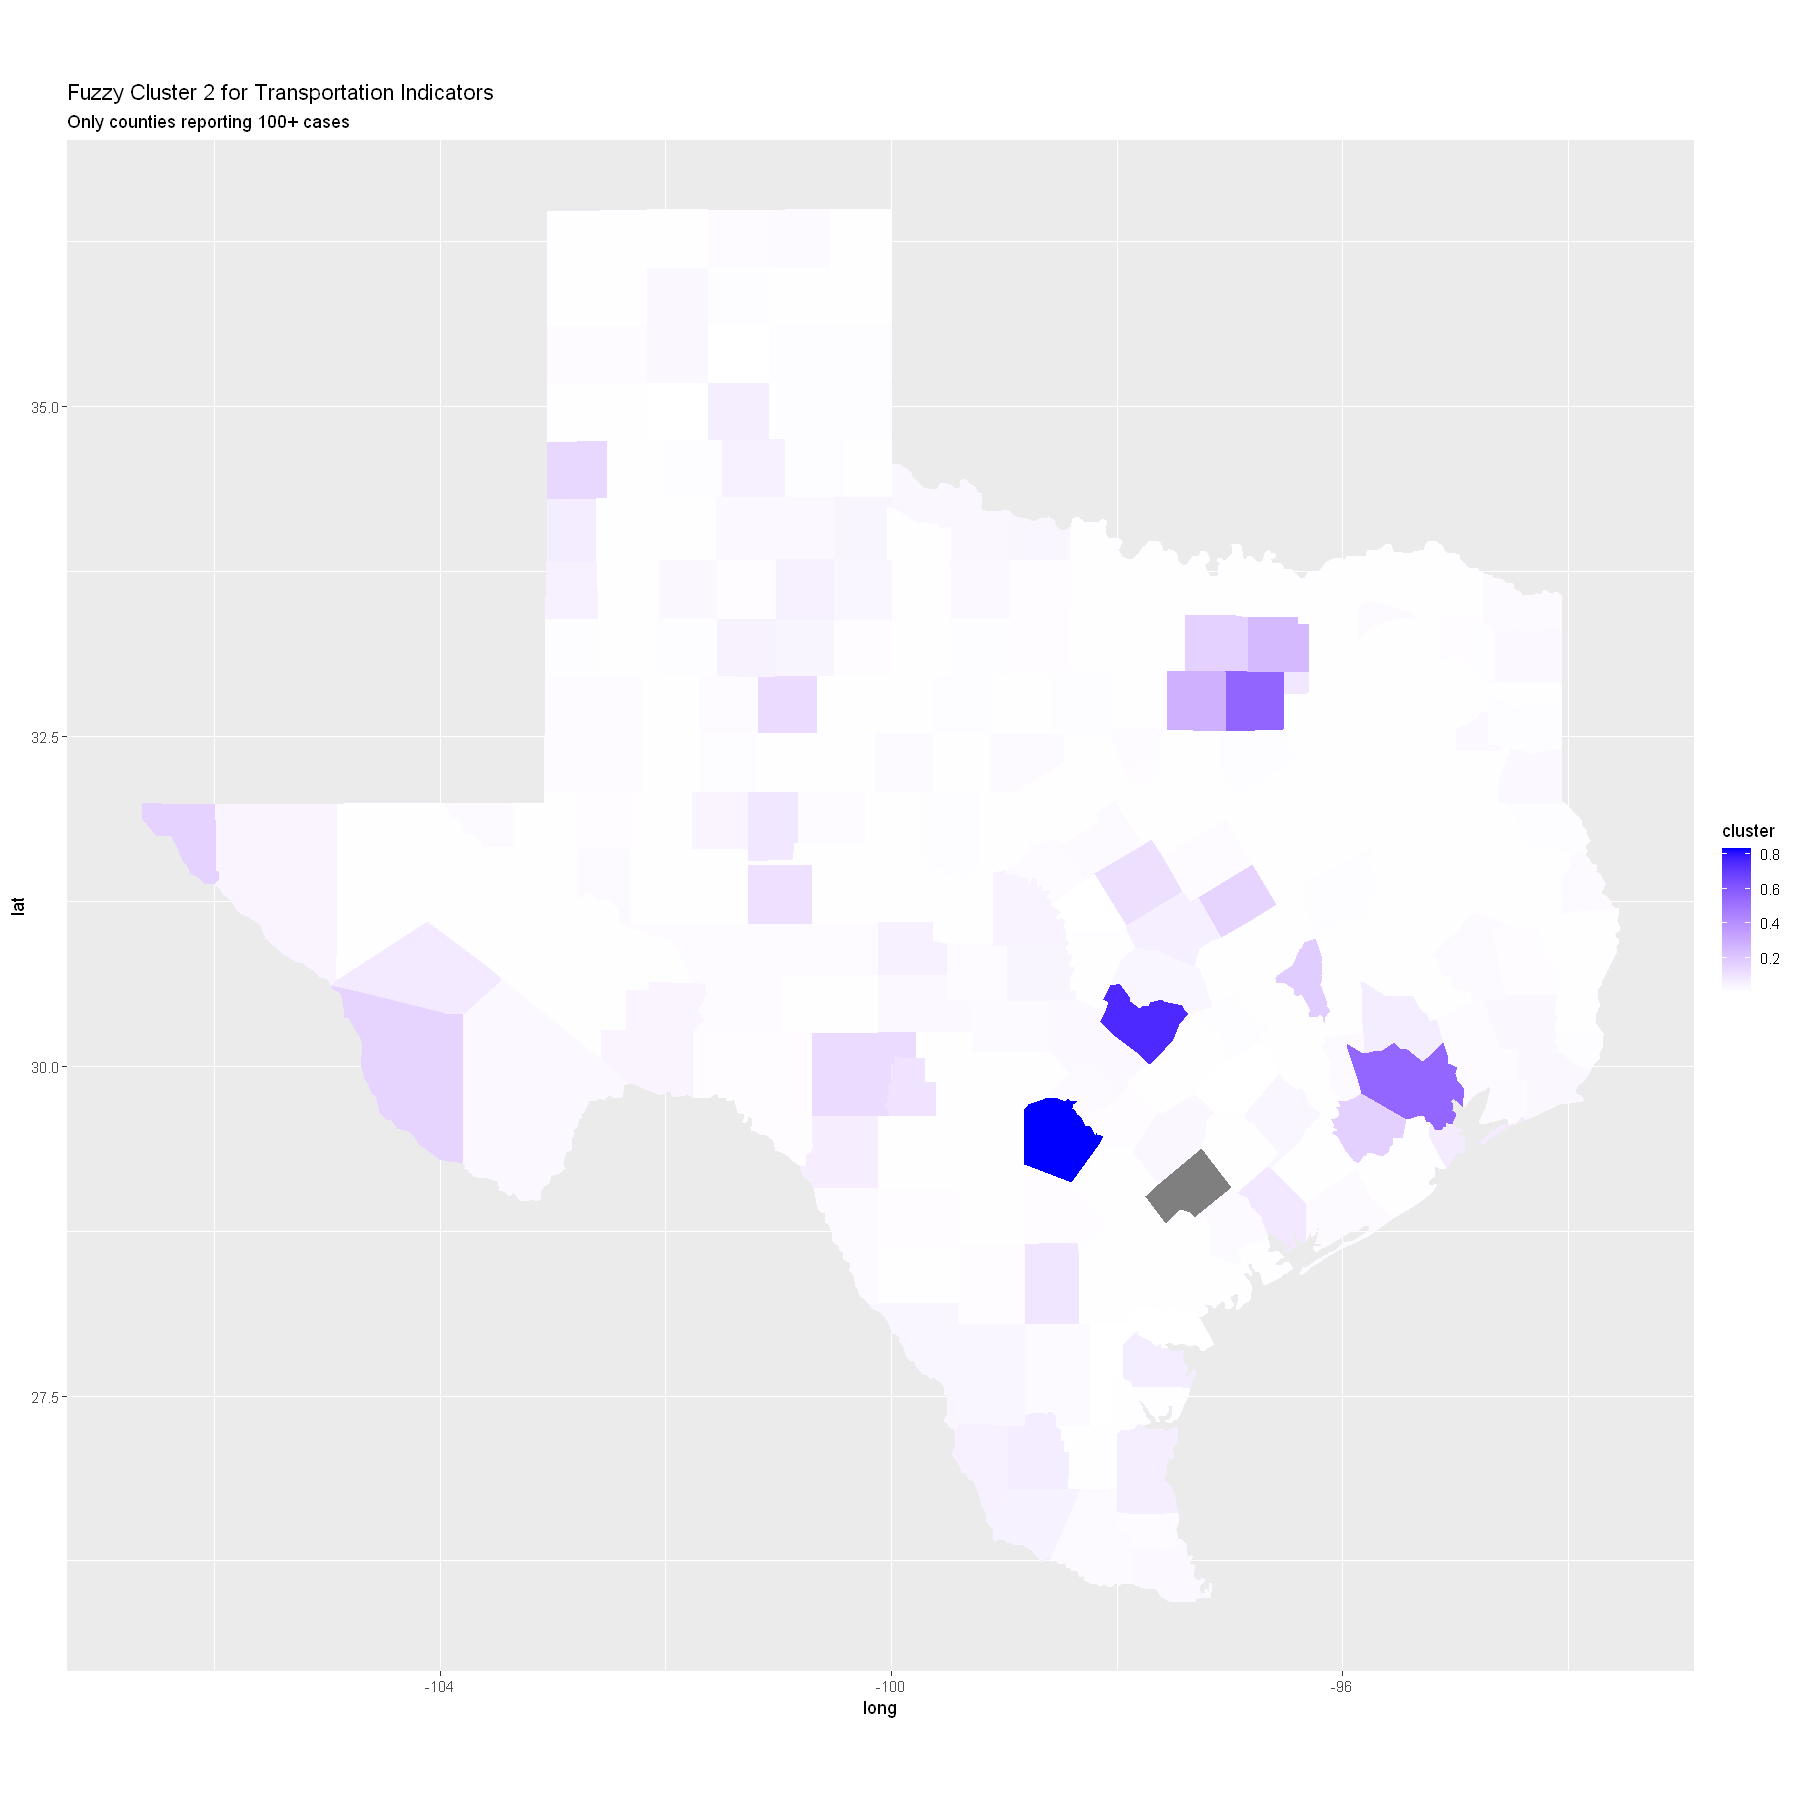

In [539]:
ggplot(fc_clust_2, aes(long, lat)) + 
  geom_polygon(data = fc_clust_2, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "blue") +
  labs(title = "Fuzzy Cluster 2 for Transportation Indicators", subtitle = "Only counties reporting 100+ cases")

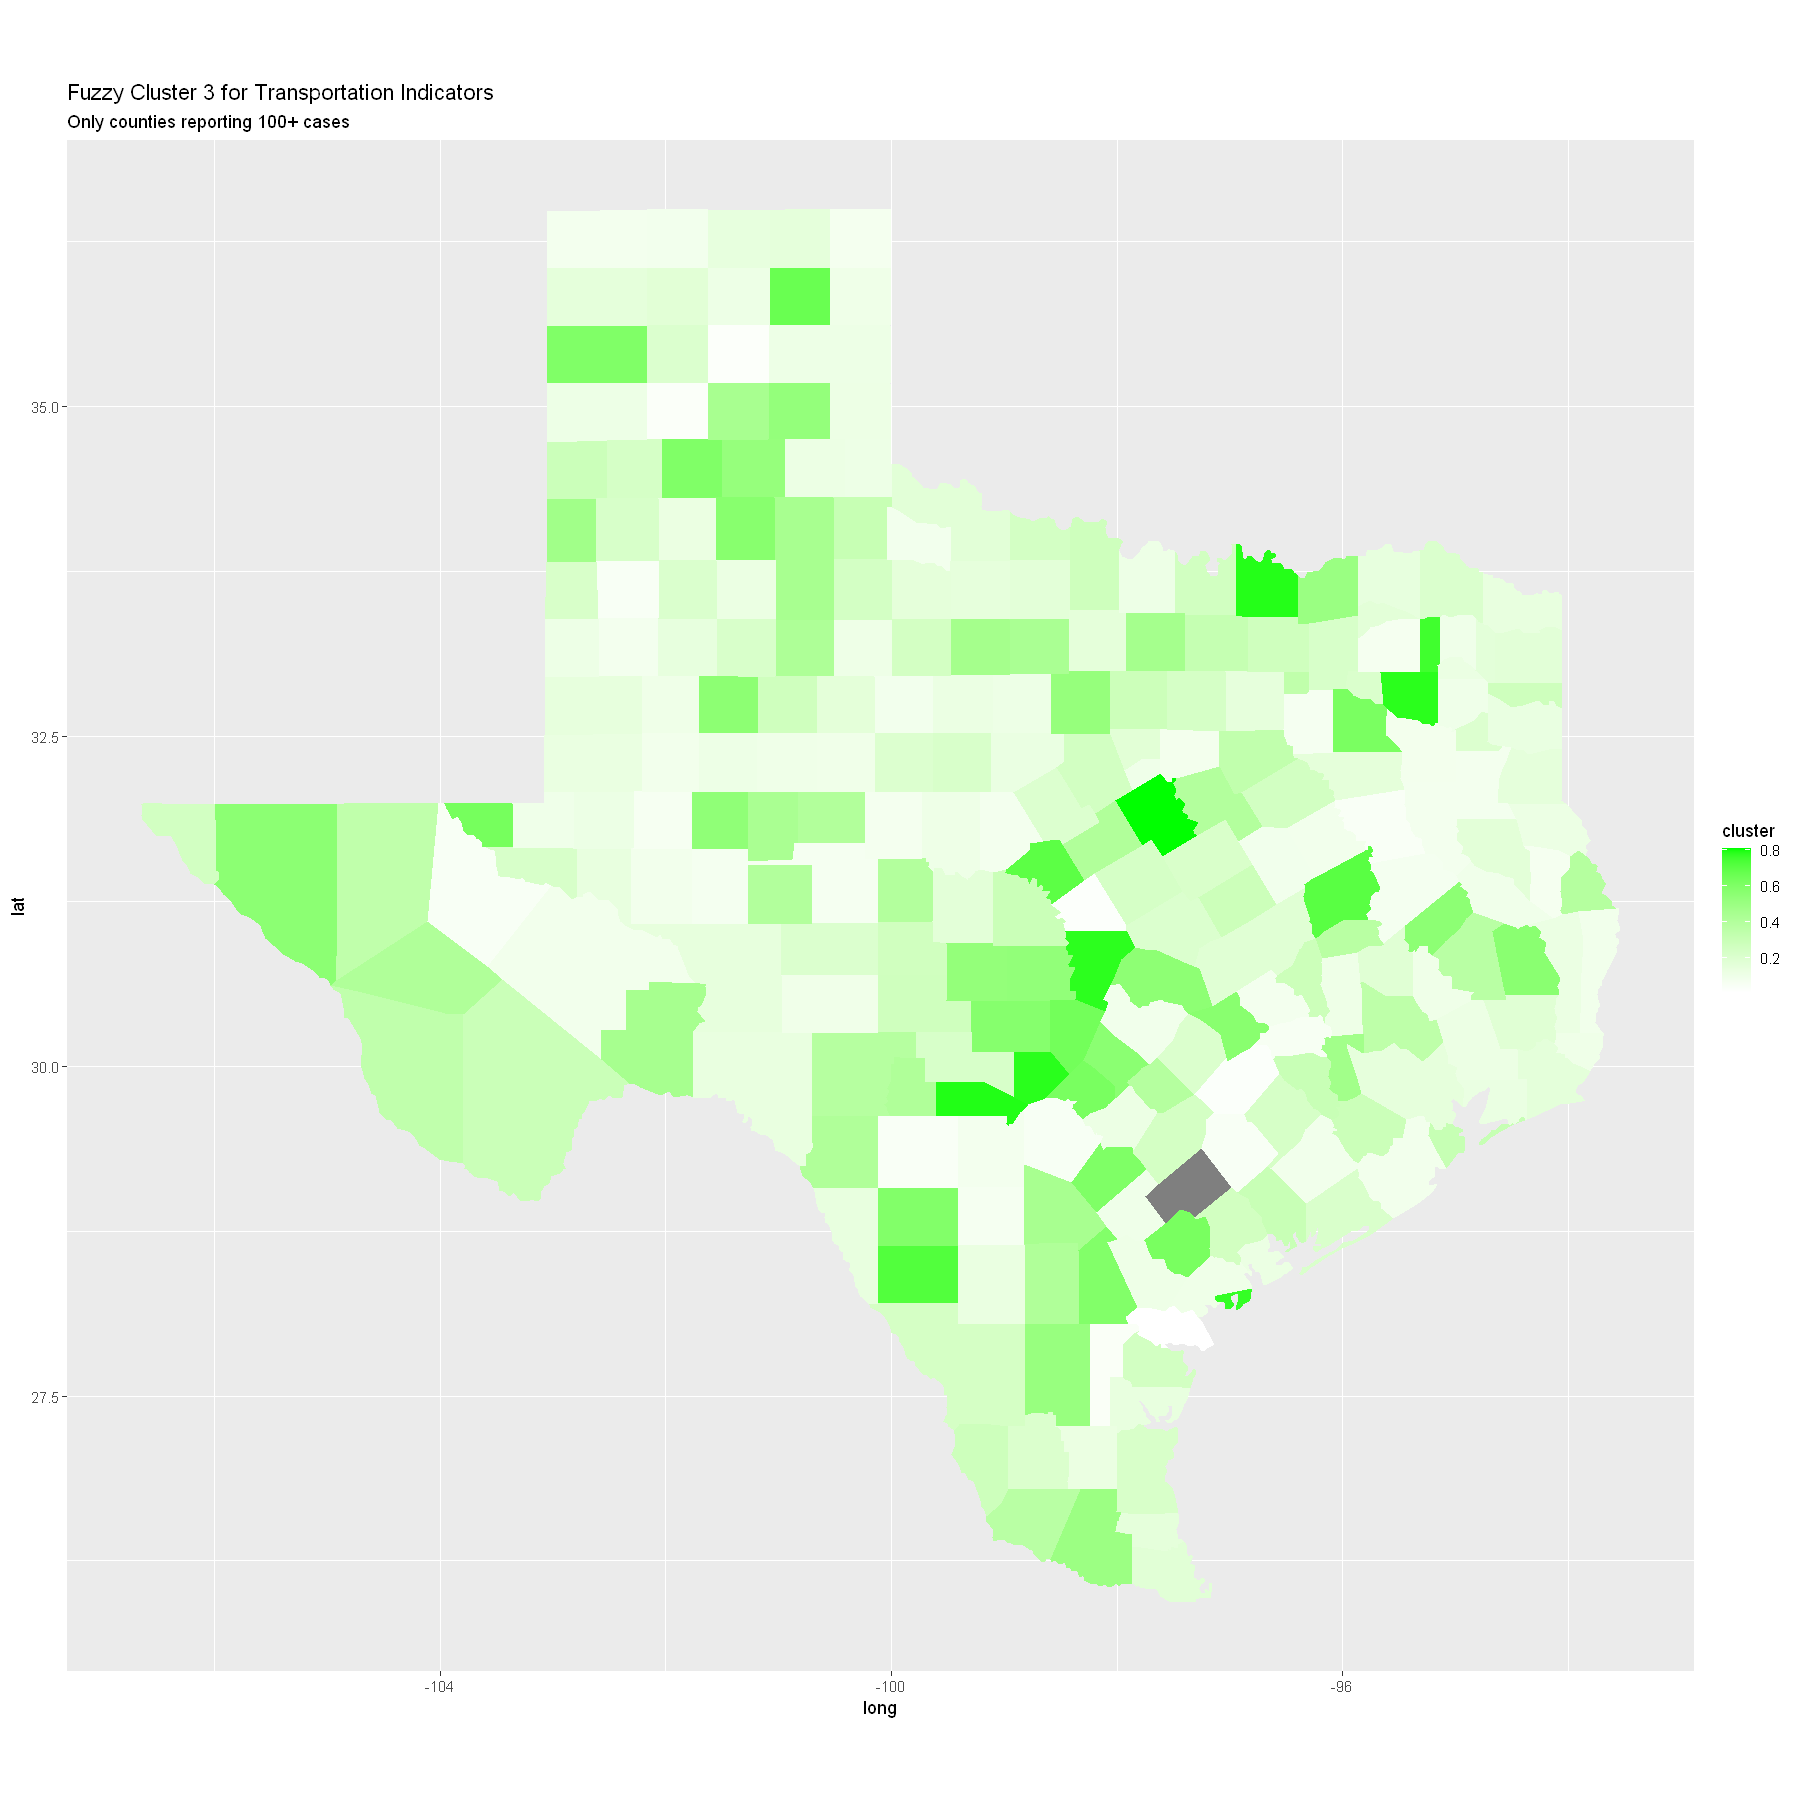

In [540]:
ggplot(fc_clust_3, aes(long, lat)) + 
  geom_polygon(data = fc_clust_3, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "green") +
  labs(title = "Fuzzy Cluster 3 for Transportation Indicators", subtitle = "Only counties reporting 100+ cases")

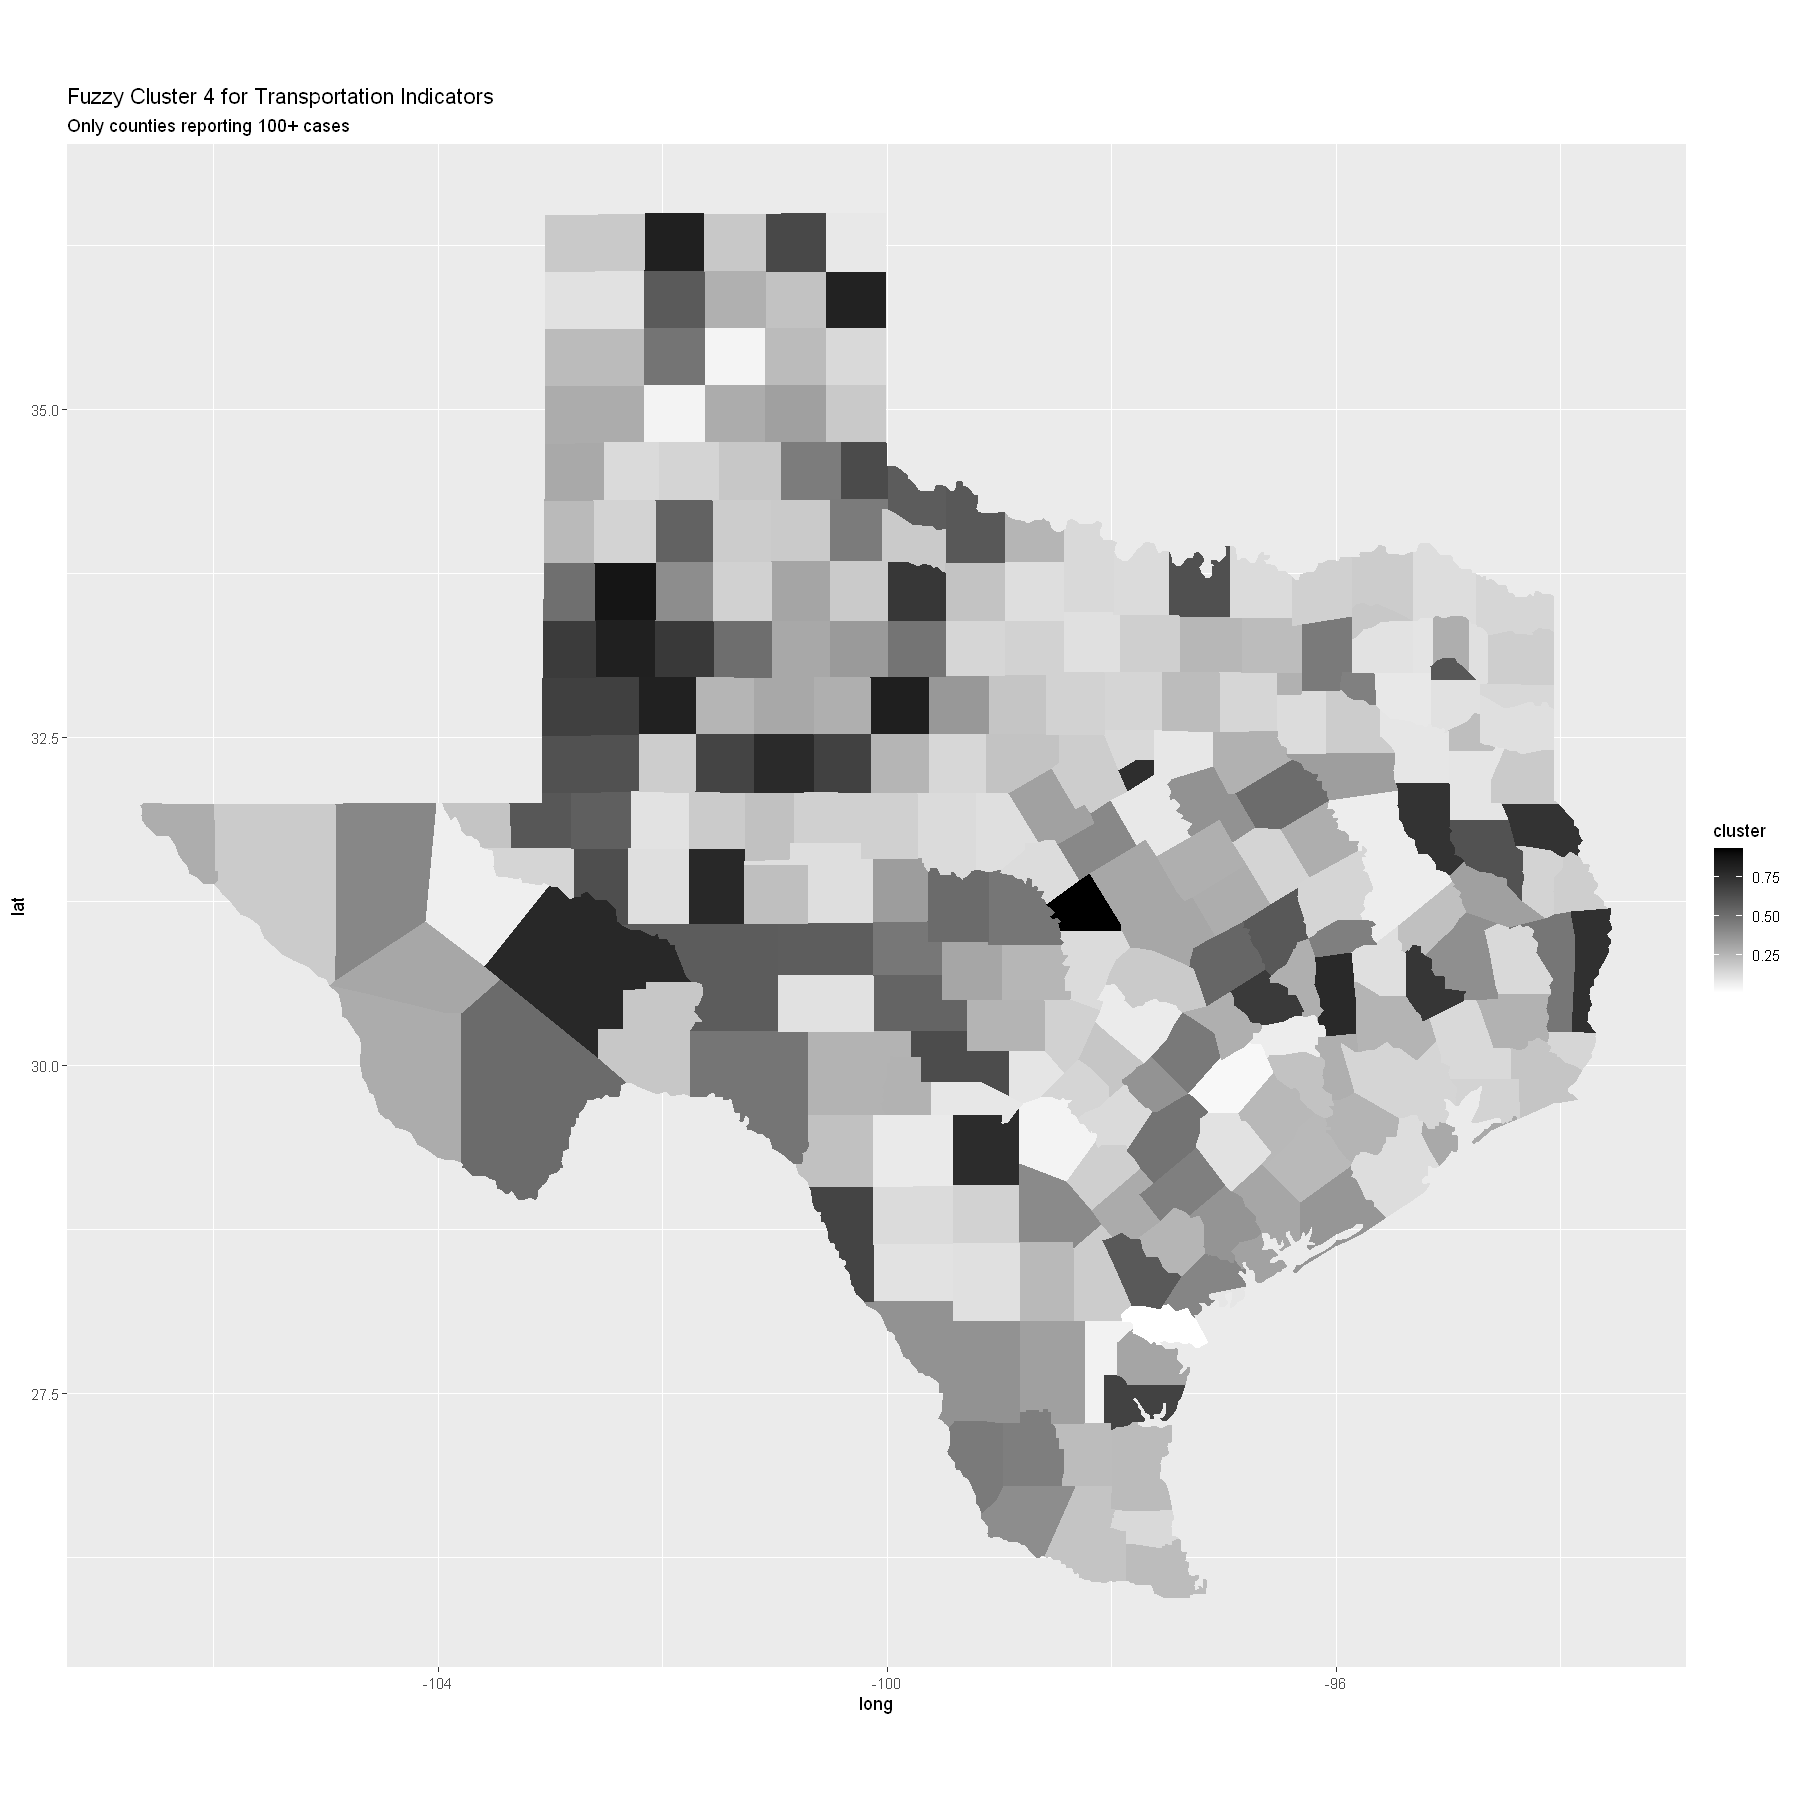

In [541]:
ggplot(fc_clust_4, aes(long, lat)) + 
  geom_polygon(data = fc_clust_4, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "black") +
  labs(title = "Fuzzy Cluster 4 for Transportation Indicators", subtitle = "Only counties reporting 100+ cases")

In [542]:
row_max_indices <- apply(fc$membership, 1, which.max)

In [543]:
trans_data_hc <- transport_data %>% add_column(cluster = row_max_indices)

trans_data_hc %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<int>,<dbl>,<dbl>,<dbl>
1,77.97850,1.8698768,0.02490303
2,77.29447,0.8646005,0.01131868
3,68.68436,1.5796515,0.02299048
4,86.72754,2.1580338,0.02688614


### Fuzzy Observations
+ cluster 2 has less avg deaths per case

# Partitioning Around Medoids (PAM) Clustering


In [547]:
dist_trans <- dist(trans_data_prepped)
p <- pam(dist_trans, k=6)
trans_data_p <- trans_data_prepped %>% add_column(cluster = factor(p$cluster))
counties_TX_p <- counties_TX %>% left_join(transport_data %>% add_column(cluster = trans_data_p$cluster))

Joining, by = "county"


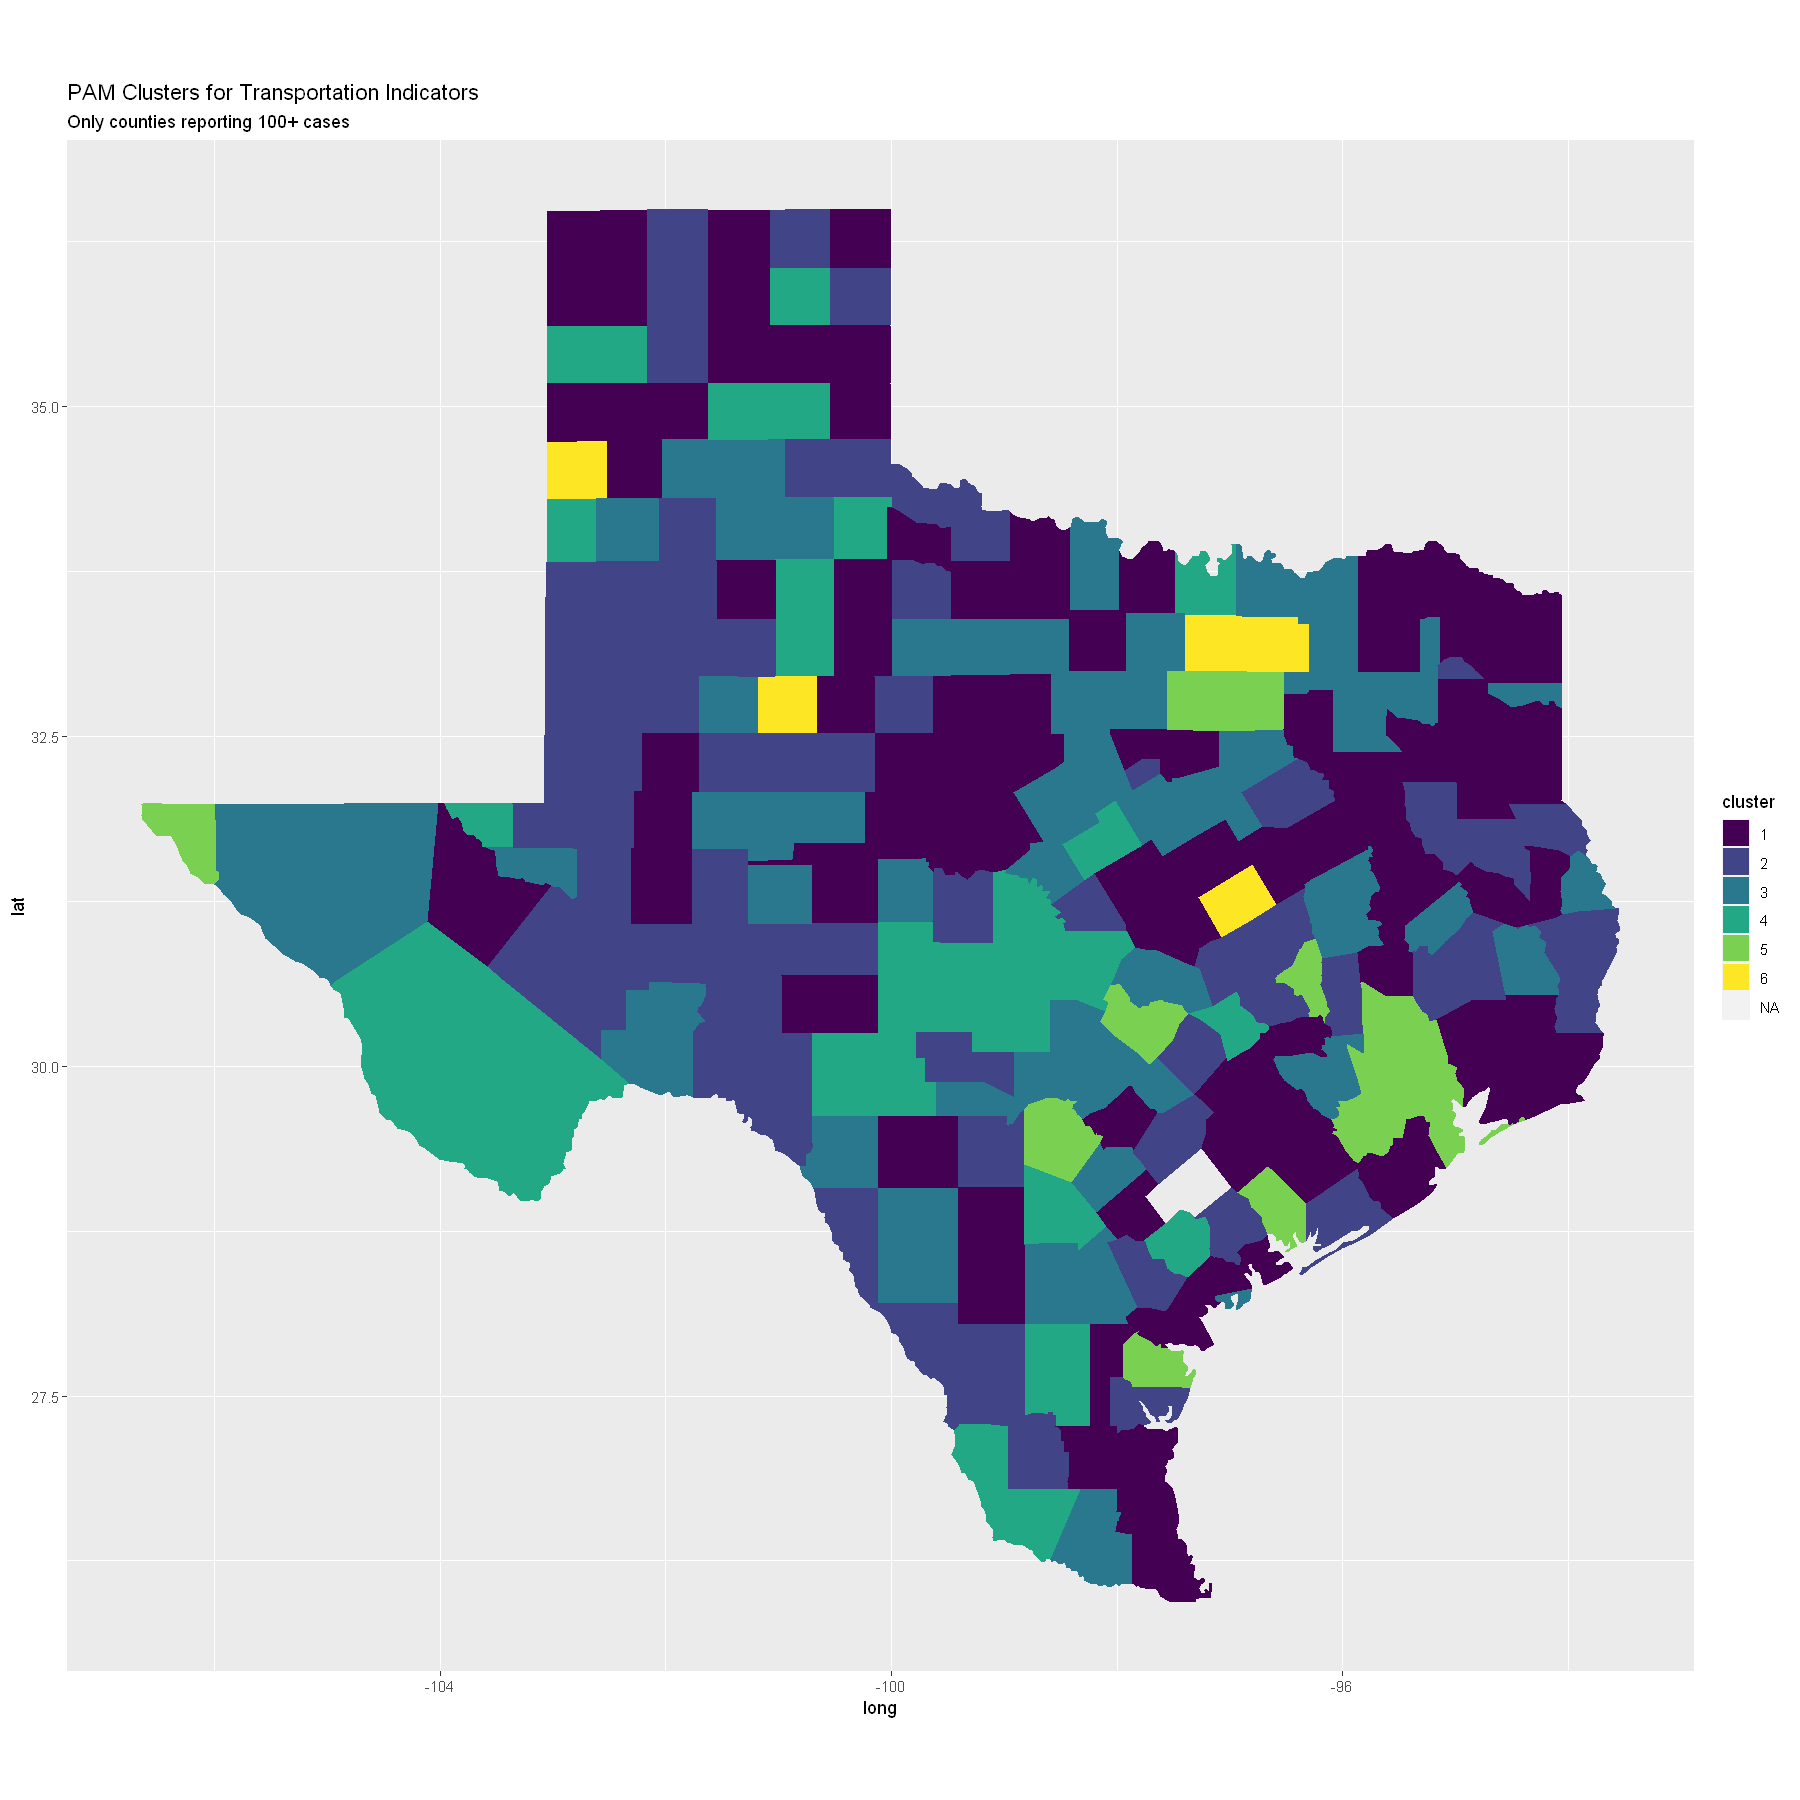

In [548]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_p, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "PAM Clusters for Transportation Indicators", subtitle = "Only counties reporting 100+ cases")

In [549]:
trans_data_p <- transport_data %>% add_column(cluster = factor(p$cluster))

trans_data_p %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,75.91900,1.859034,0.02523450
2,86.77988,2.148874,0.02703717
3,71.70394,1.714185,0.02463329
4,75.49825,1.897551,0.02483908
5,81.36530,1.034300,0.01230395
6,89.86063,1.651297,0.01655704


### PAM Observations
+ 5,6 has low deaths per case

# Employment and Industry Indicators Analysis

## K - means Clustering

In [551]:
emp_data_prepped <- emp_data[, !(colnames(emp_data) %in% c("county_name.x", "cases_per_1000", "deaths_per_1000", "death_per_case"))]


In [552]:
set.seed(123)
km <- kmeans(emp_data_prepped, centers = 4)
km

K-means clustering with 4 clusters of sizes 113, 48, 57, 36

Cluster means:
  percent_employed_agriculture_forestry_fishing_hunting_mining
1                                                  -0.35594109
2                                                   1.46695833
3                                                   0.01195128
4                                                  -0.85760779
  percent_employed_arts_entertainment_recreation_accommodation_food
1                                                       -0.04736599
2                                                       -0.44027852
3                                                       -0.14394561
4                                                        0.96362847
  percent_employed_construction percent_employed_education_health_social
1                   0.290684473                               0.01491578
2                  -0.004687609                              -0.44684062
3                  -0.655245445                   

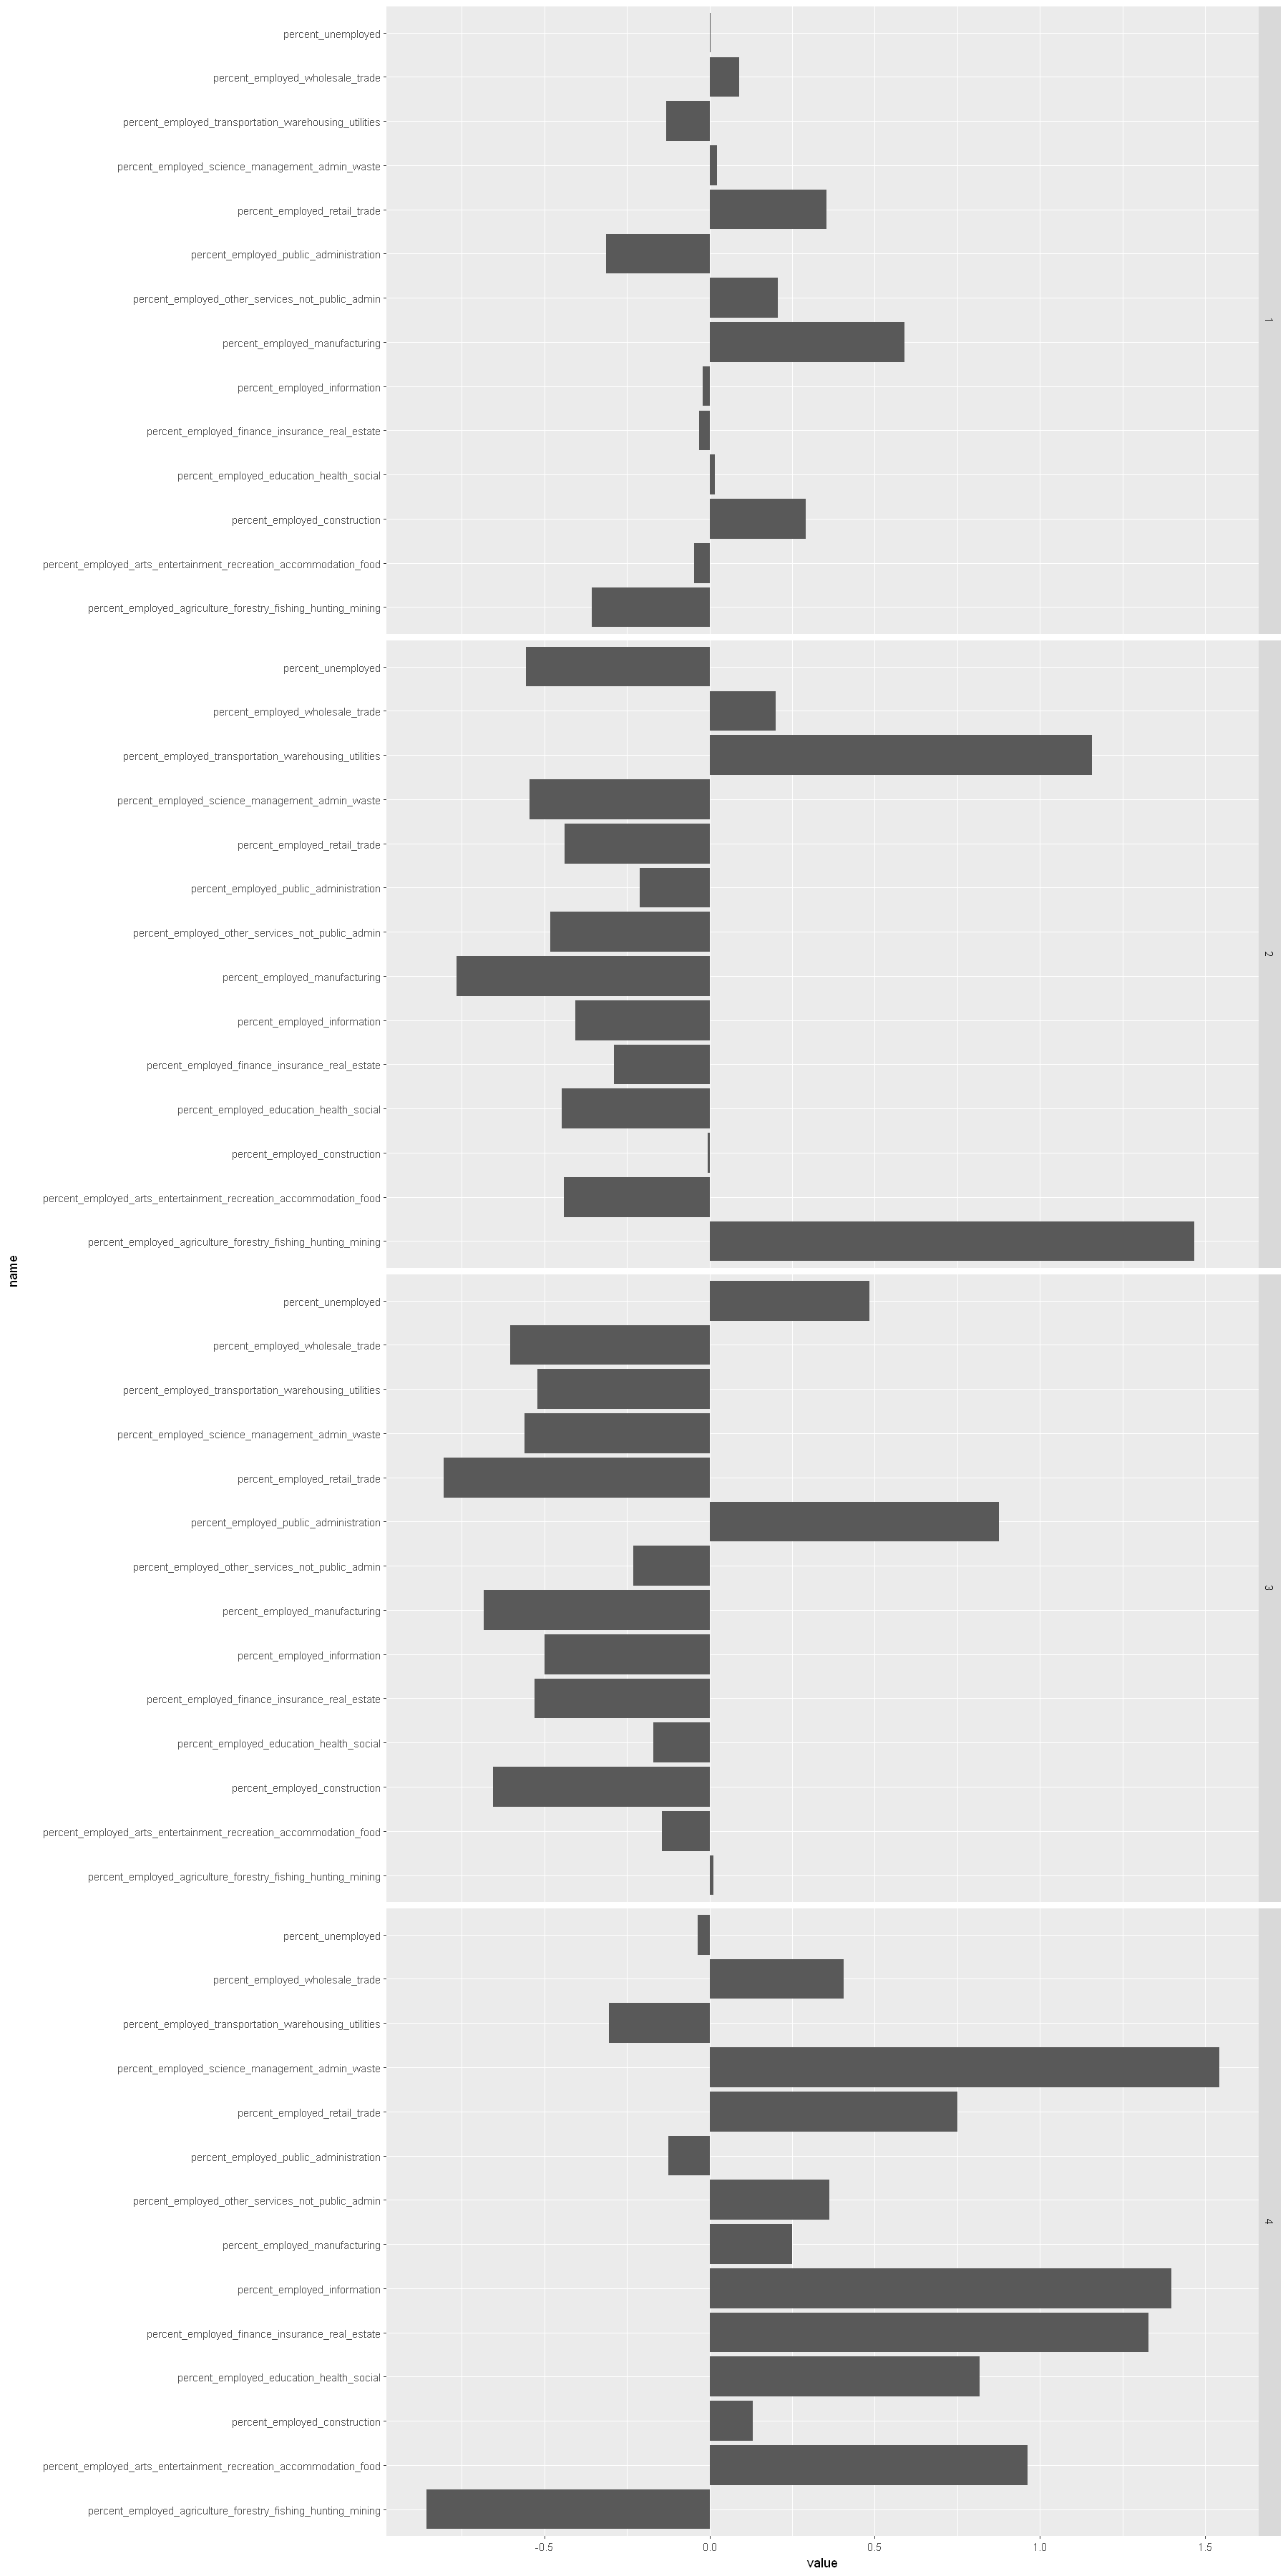

In [553]:
options(repr.plot.width = 15, repr.plot.height = 30)
ggplot(pivot_longer(as_tibble(km$centers,  rownames = "cluster"), 
  cols = colnames(km$centers)), 
  aes(y = name, x = value)) +
  geom_bar(stat = "identity") +
  facet_grid(rows = vars(cluster))

In [554]:
emp_data <- emp_data %>% mutate(county = county_name.x %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_TX_clust <- counties_TX %>% left_join(emp_data %>% 
    add_column(cluster = factor(km$cluster)))

Joining, by = "county"


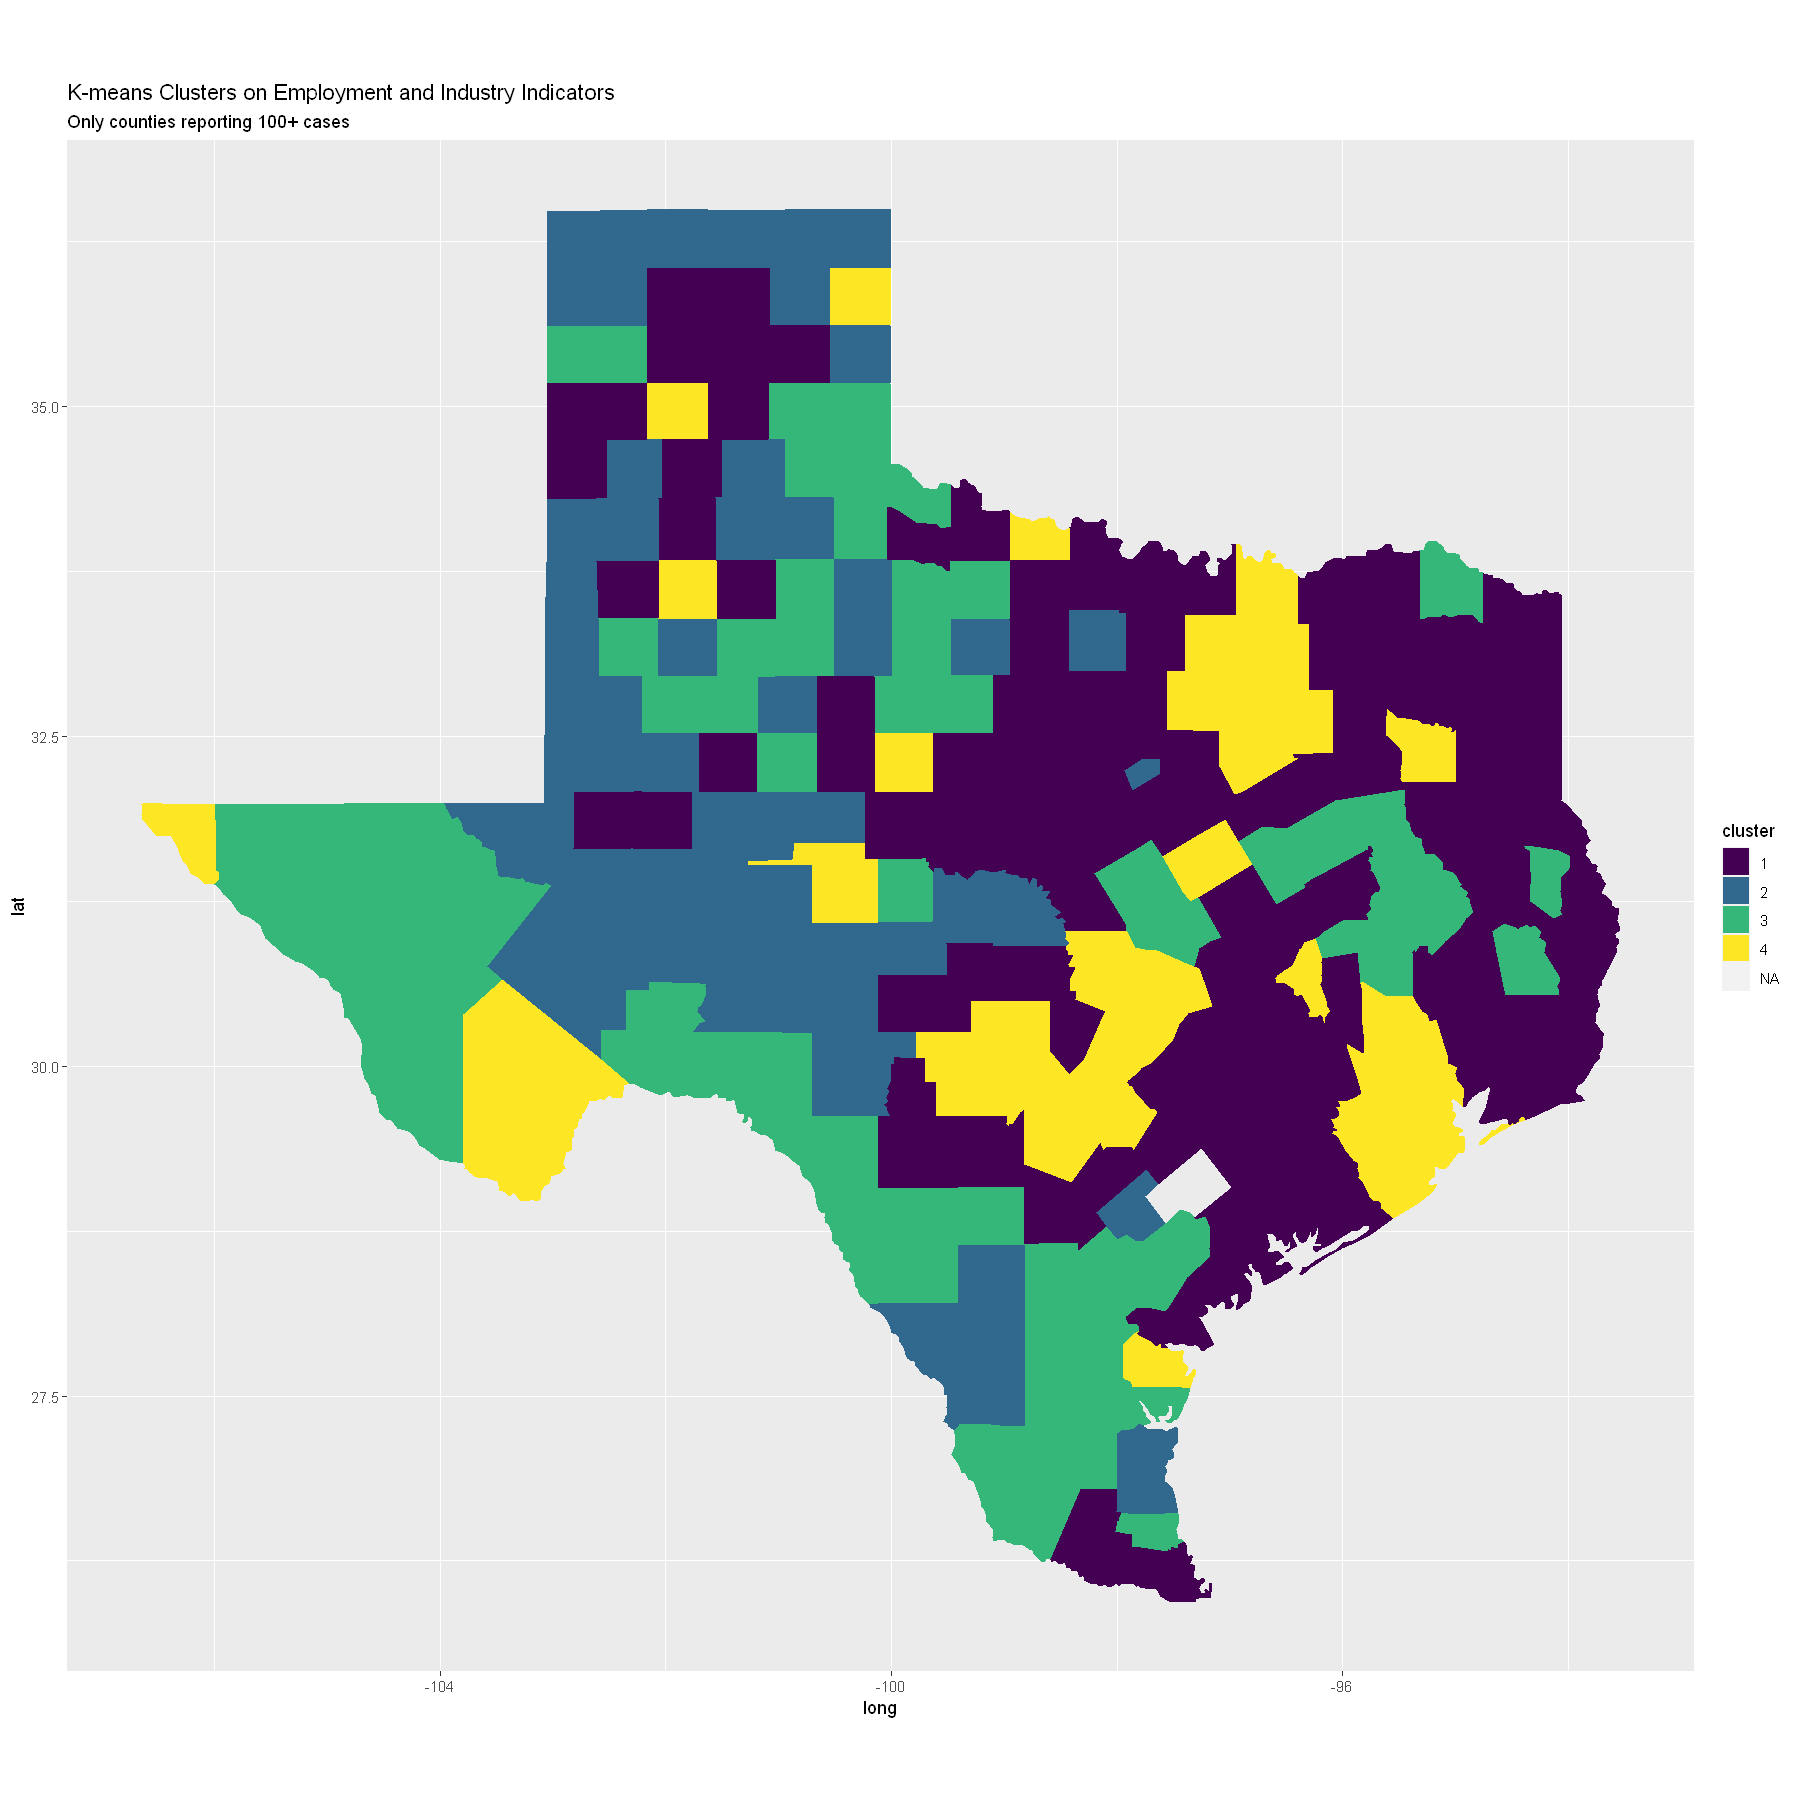

In [556]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_clust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "K-means Clusters on Employment and Industry Indicators", subtitle = "Only counties reporting 100+ cases")

In [557]:
emp_data_km <- emp_data %>% add_column(cluster = factor(km$cluster))

emp_data_km %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,71.09541,1.789460,0.02614076
2,84.38997,2.297655,0.02808952
3,84.52576,2.078304,0.02561341
4,80.74400,1.118351,0.01416845


### K - means Observations
+ 4 has lower deaths per case

# Hierarchical Clustering

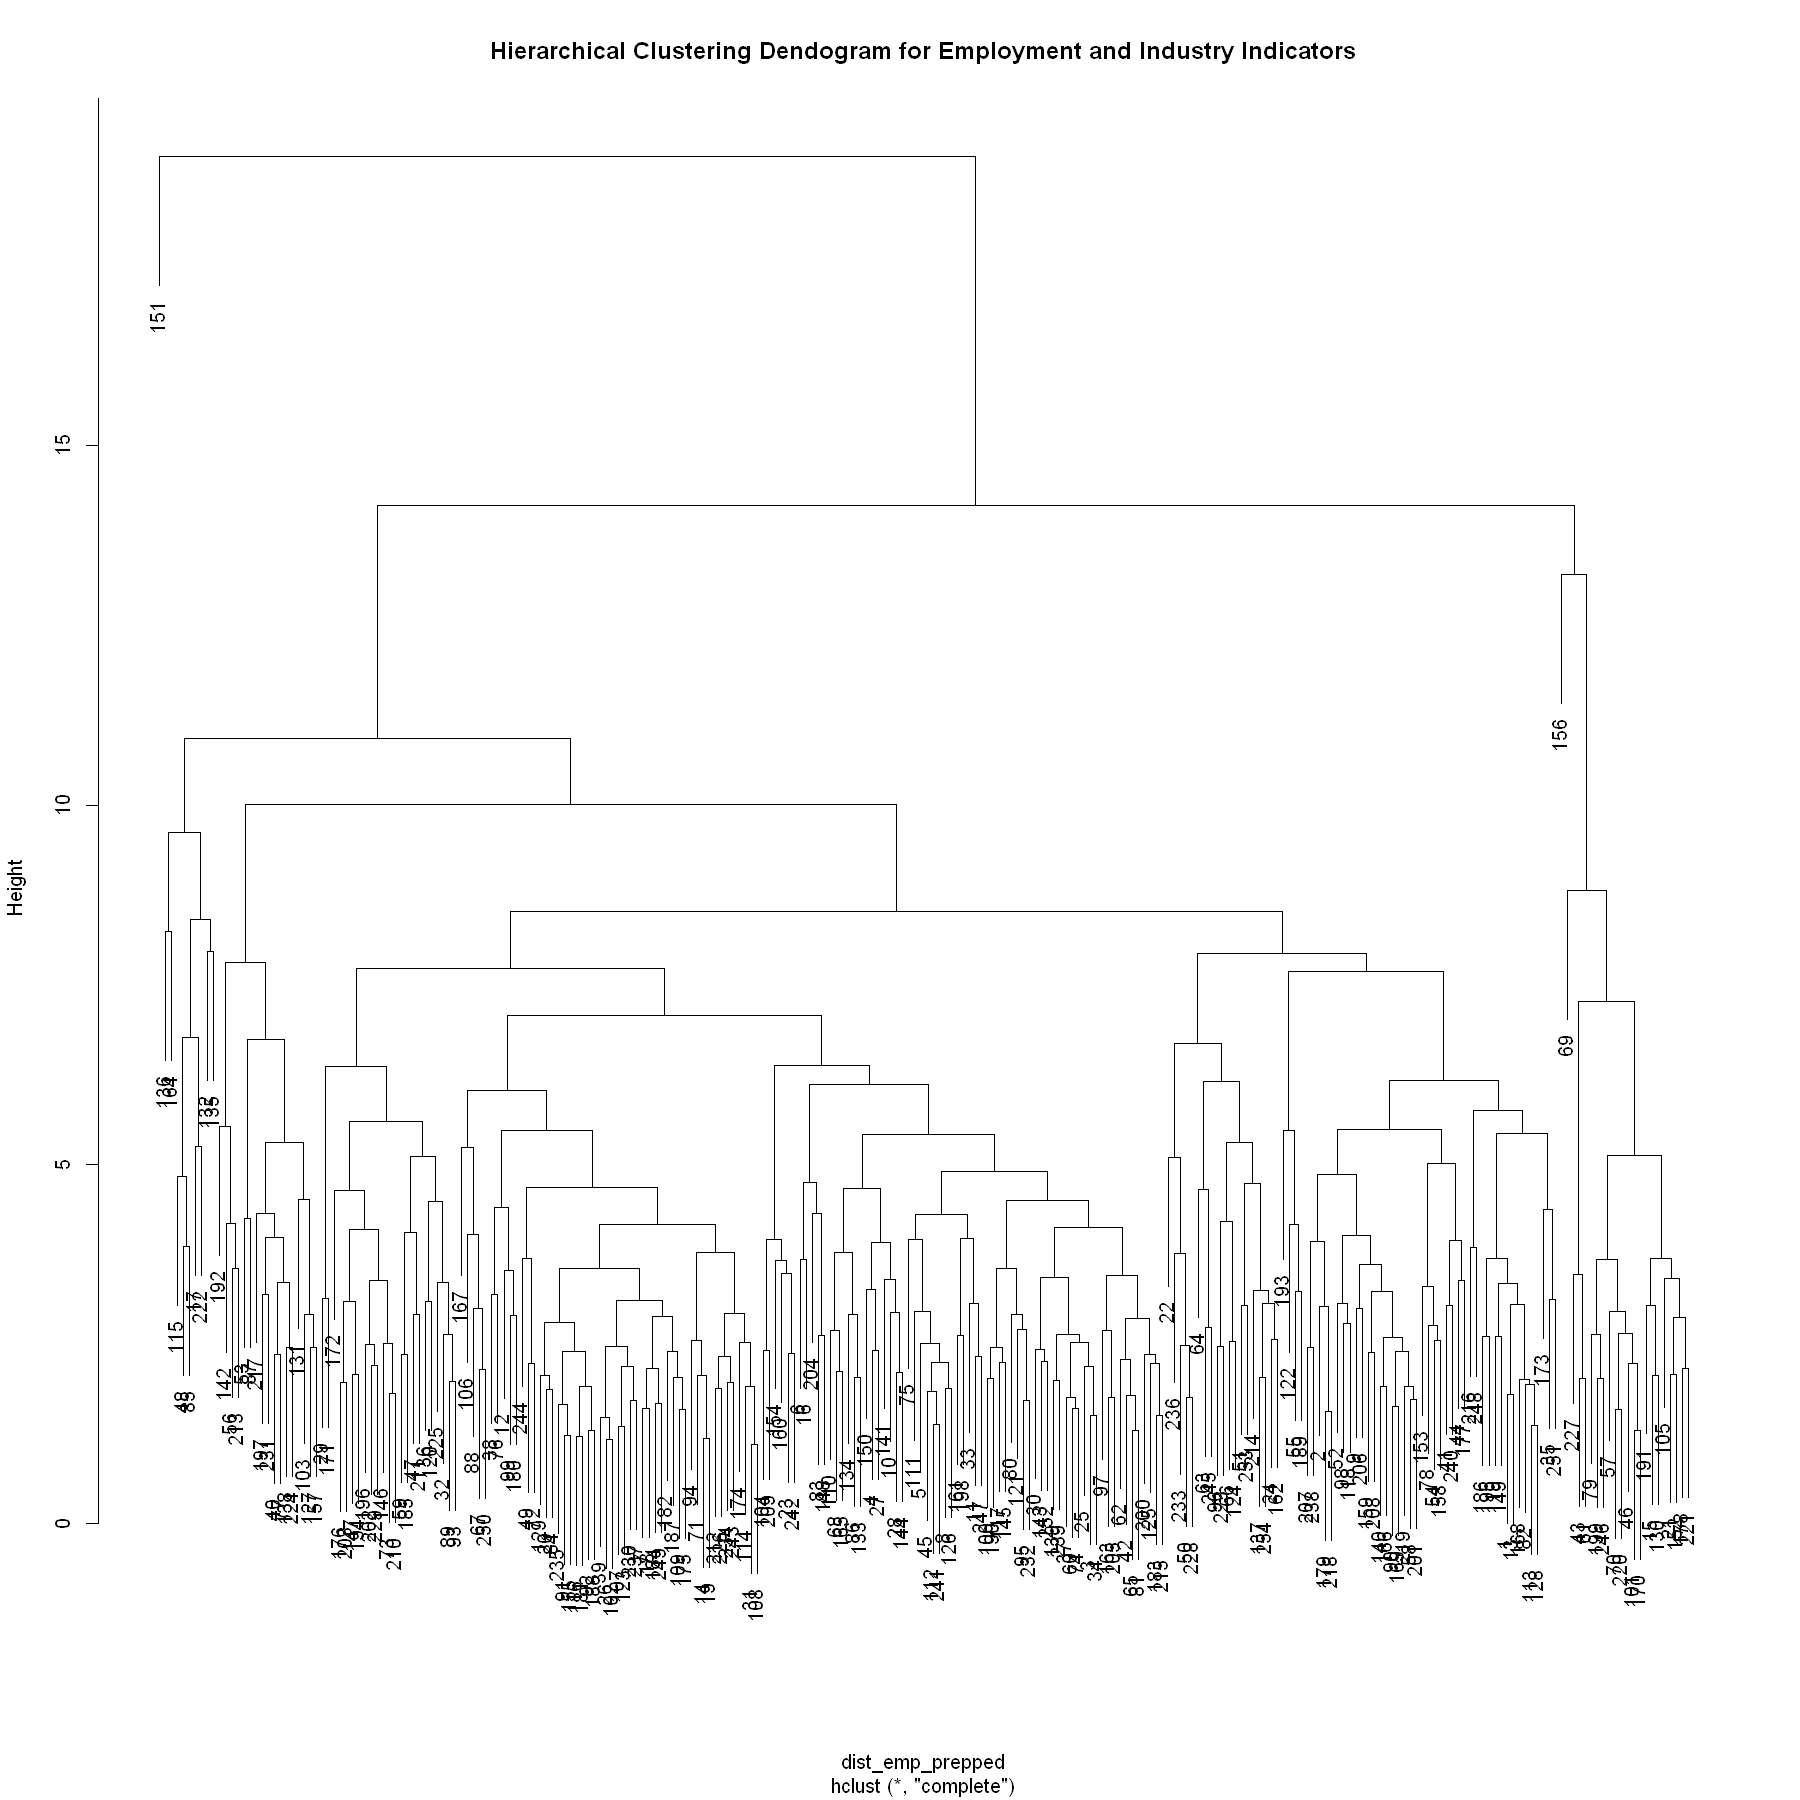

In [560]:
set.seed(420)
dist_emp_prepped <- dist(emp_data_prepped)
hc <- hclust(dist_emp_prepped, method="complete")
plot(hc, main = "Hierarchical Clustering Dendogram for Employment and Industry Indicators")

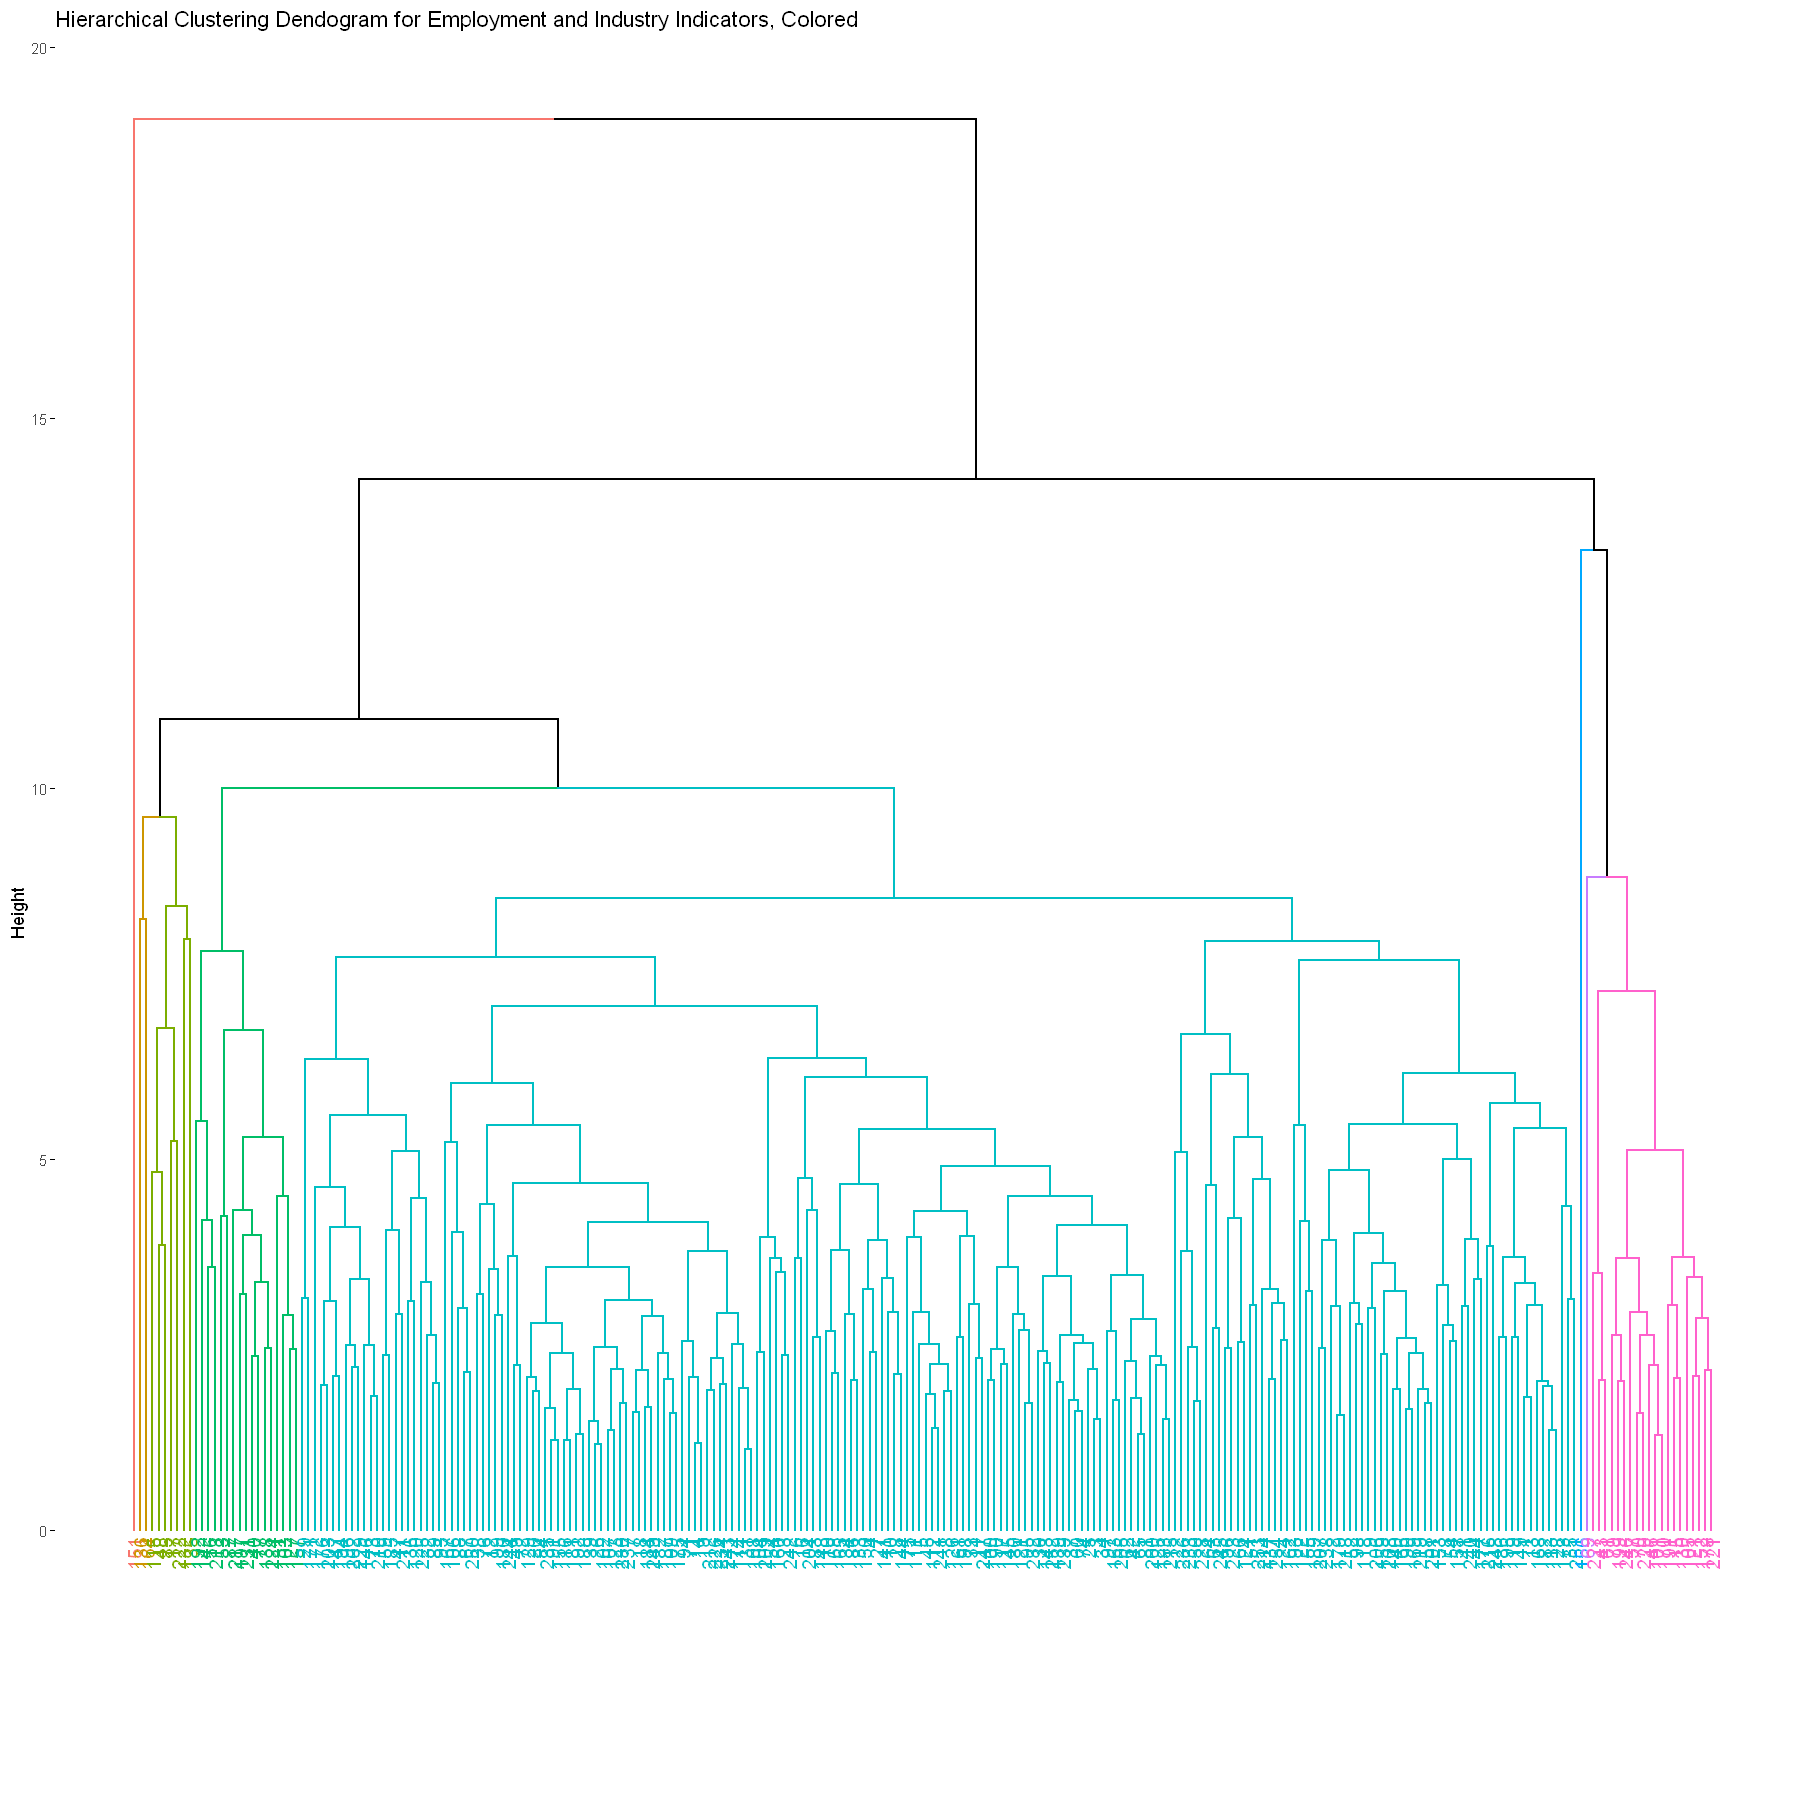

In [561]:
fviz_dend(hc, k=8, main = "Hierarchical Clustering Dendogram for Employment and Industry Indicators, Colored")

In [562]:
h_clusters <- cutree(hc, k=8)
emp_data_hclust <- emp_data_prepped %>% add_column(cluster = factor(h_clusters))

In [563]:
counties_TX_hclust <- counties_TX %>% left_join(emp_data %>% 
    add_column(cluster = emp_data_hclust$cluster))

Joining, by = "county"


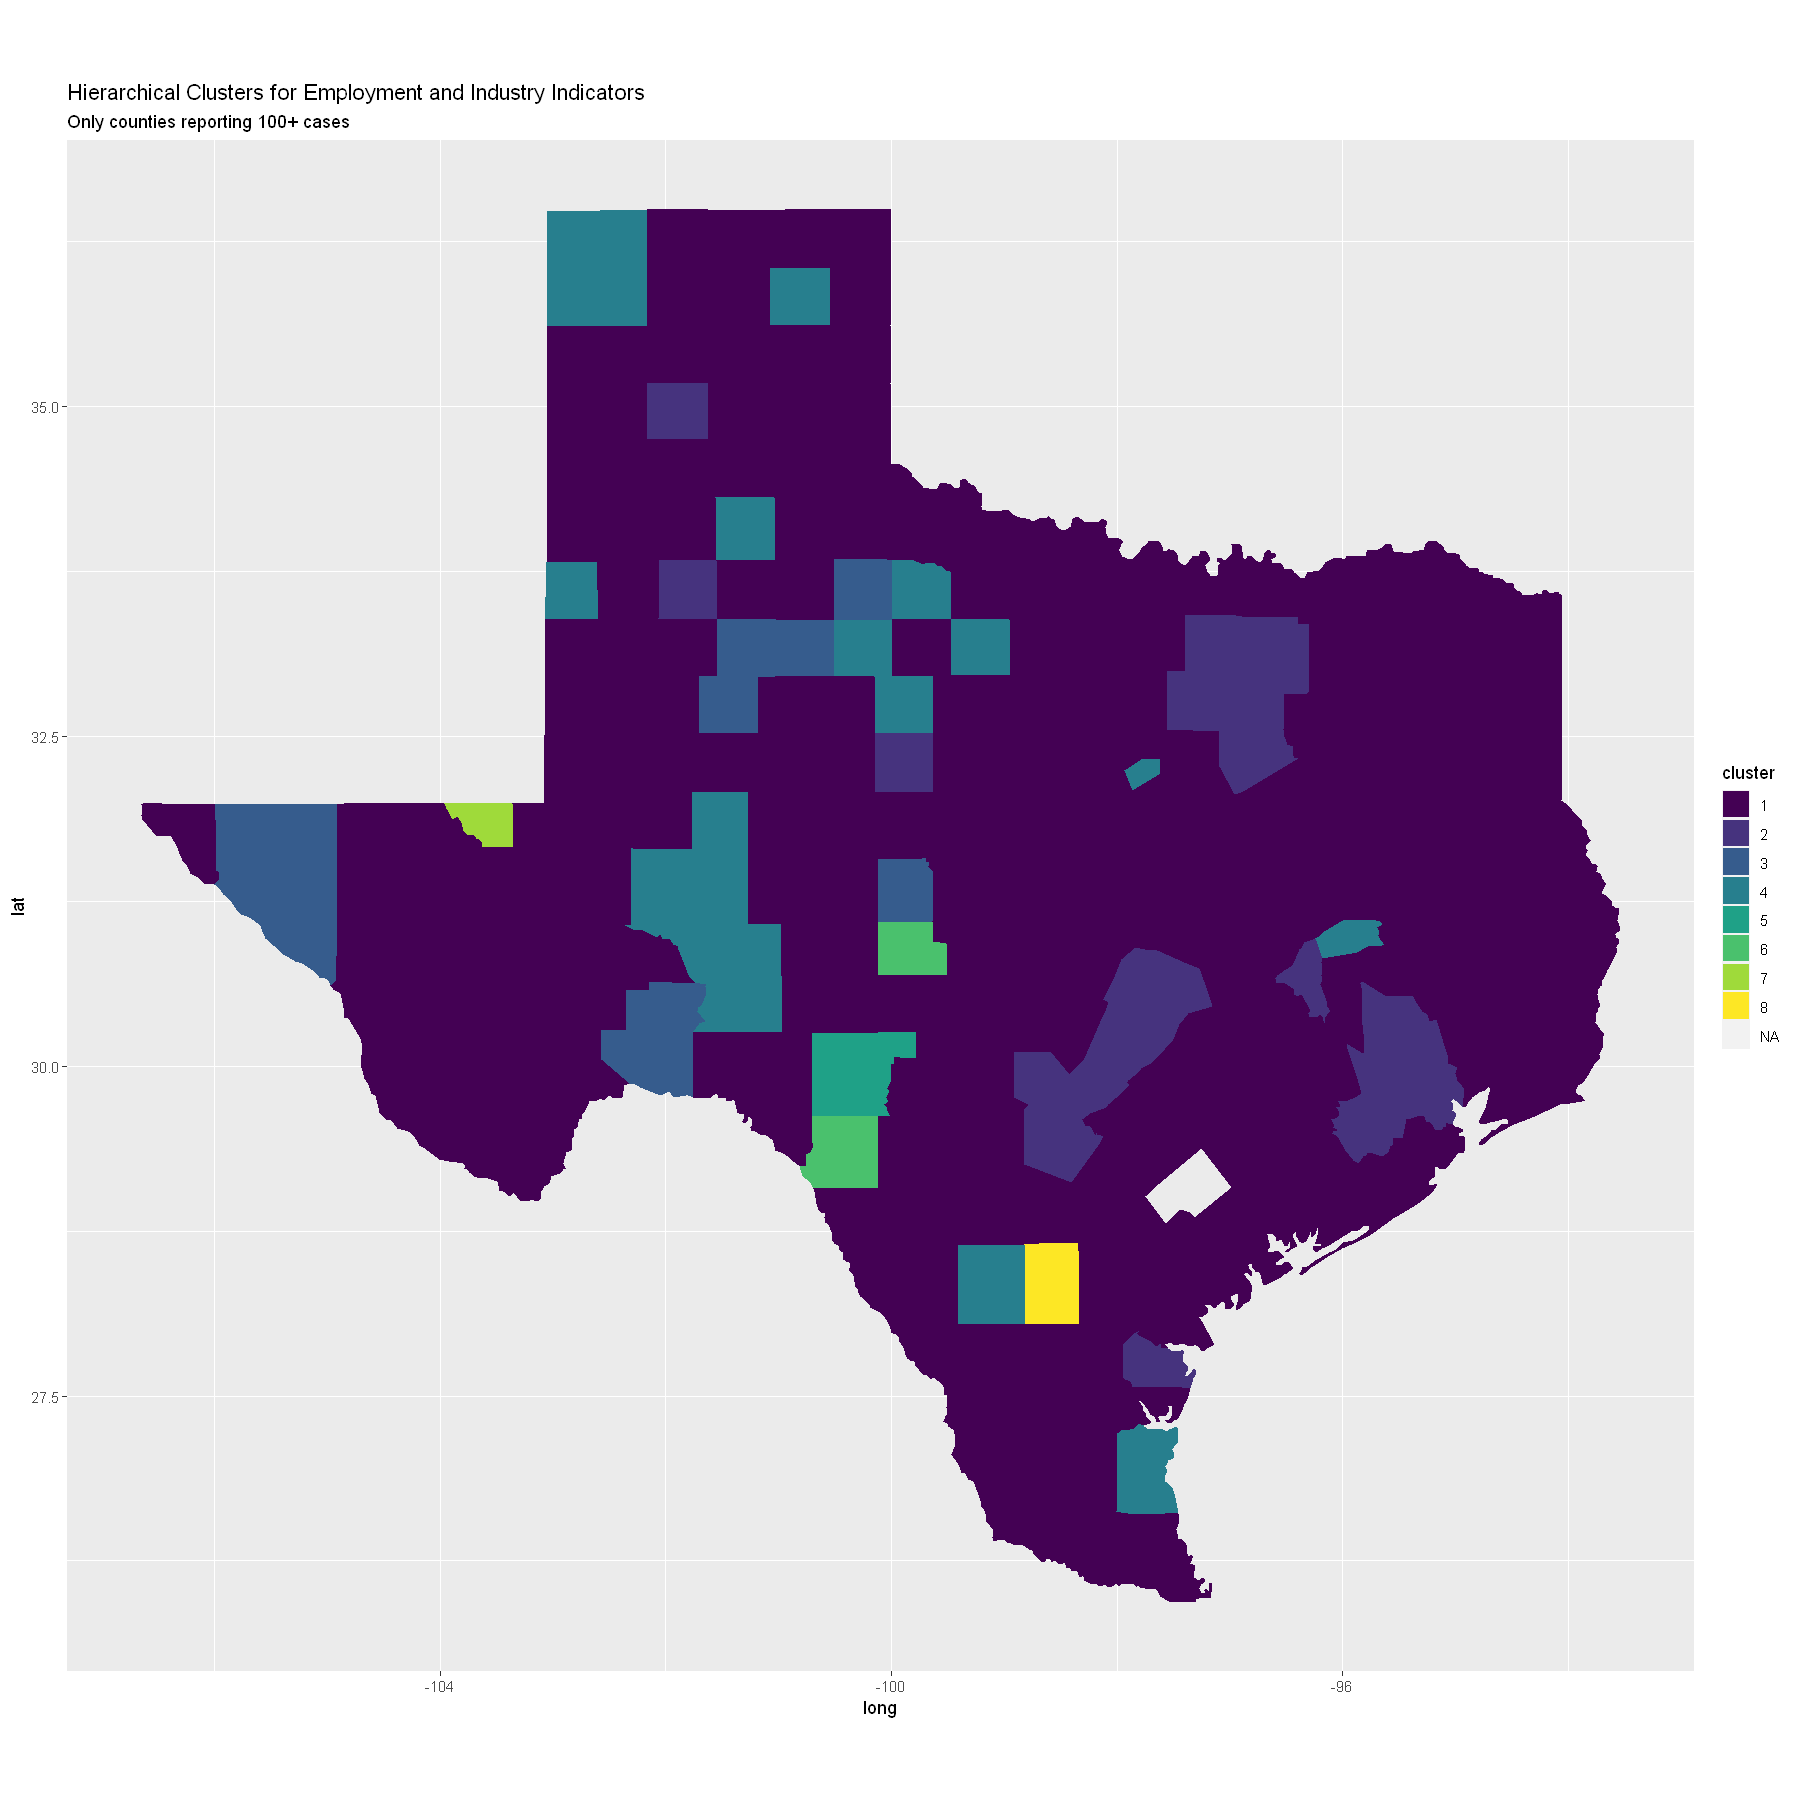

In [564]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_hclust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Hierarchical Clusters for Employment and Industry Indicators", subtitle = "Only counties reporting 100+ cases")

In [565]:
emp_data_dc <- emp_data %>% add_column(cluster = emp_data_hclust$cluster)

emp_data_dc %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,77.62728,1.927411,0.02581817
2,80.04245,1.019775,0.01280629
3,71.40651,1.246624,0.01809238
4,82.99330,2.296678,0.03025082
5,98.05779,1.421127,0.01449275
6,77.92024,1.590688,0.01970284
7,13.51351,0.000000,0.00000000
8,116.66667,3.333333,0.02857143


### HClust Observations
+ 7 has no deaths?
+ 2,3,5,6 has lower deaths per case
+ 7 has low cases
+ 8 has high cases

# Fuzzy Clustering

In [575]:
fc <- cmeans(as.matrix(emp_data_prepped), centers = 2)
fc

Fuzzy c-means clustering with 2 clusters

Cluster centers:
  percent_employed_agriculture_forestry_fishing_hunting_mining
1                                                 -0.001645131
2                                                  0.001644981
  percent_employed_arts_entertainment_recreation_accommodation_food
1                                                       0.001145987
2                                                      -0.001146157
  percent_employed_construction percent_employed_education_health_social
1                  0.0009151455                              0.001123987
2                 -0.0009158937                             -0.001124309
  percent_employed_finance_insurance_real_estate percent_employed_information
1                                    0.001382338                  0.001381654
2                                   -0.001382760                 -0.001382139
  percent_employed_manufacturing
1                    0.001366101
2                   -0.001366

In [576]:
emp_data_fc <- emp_data %>% add_column(cluster = fc$membership)
counties_TX_fc <- counties_TX %>% left_join(emp_data_fc)

Joining, by = "county"


In [577]:
fc_clust_1 <- counties_TX_fc %>% mutate(cluster = cluster[,1])
fc_clust_2 <- counties_TX_fc %>% mutate(cluster = cluster[,2])

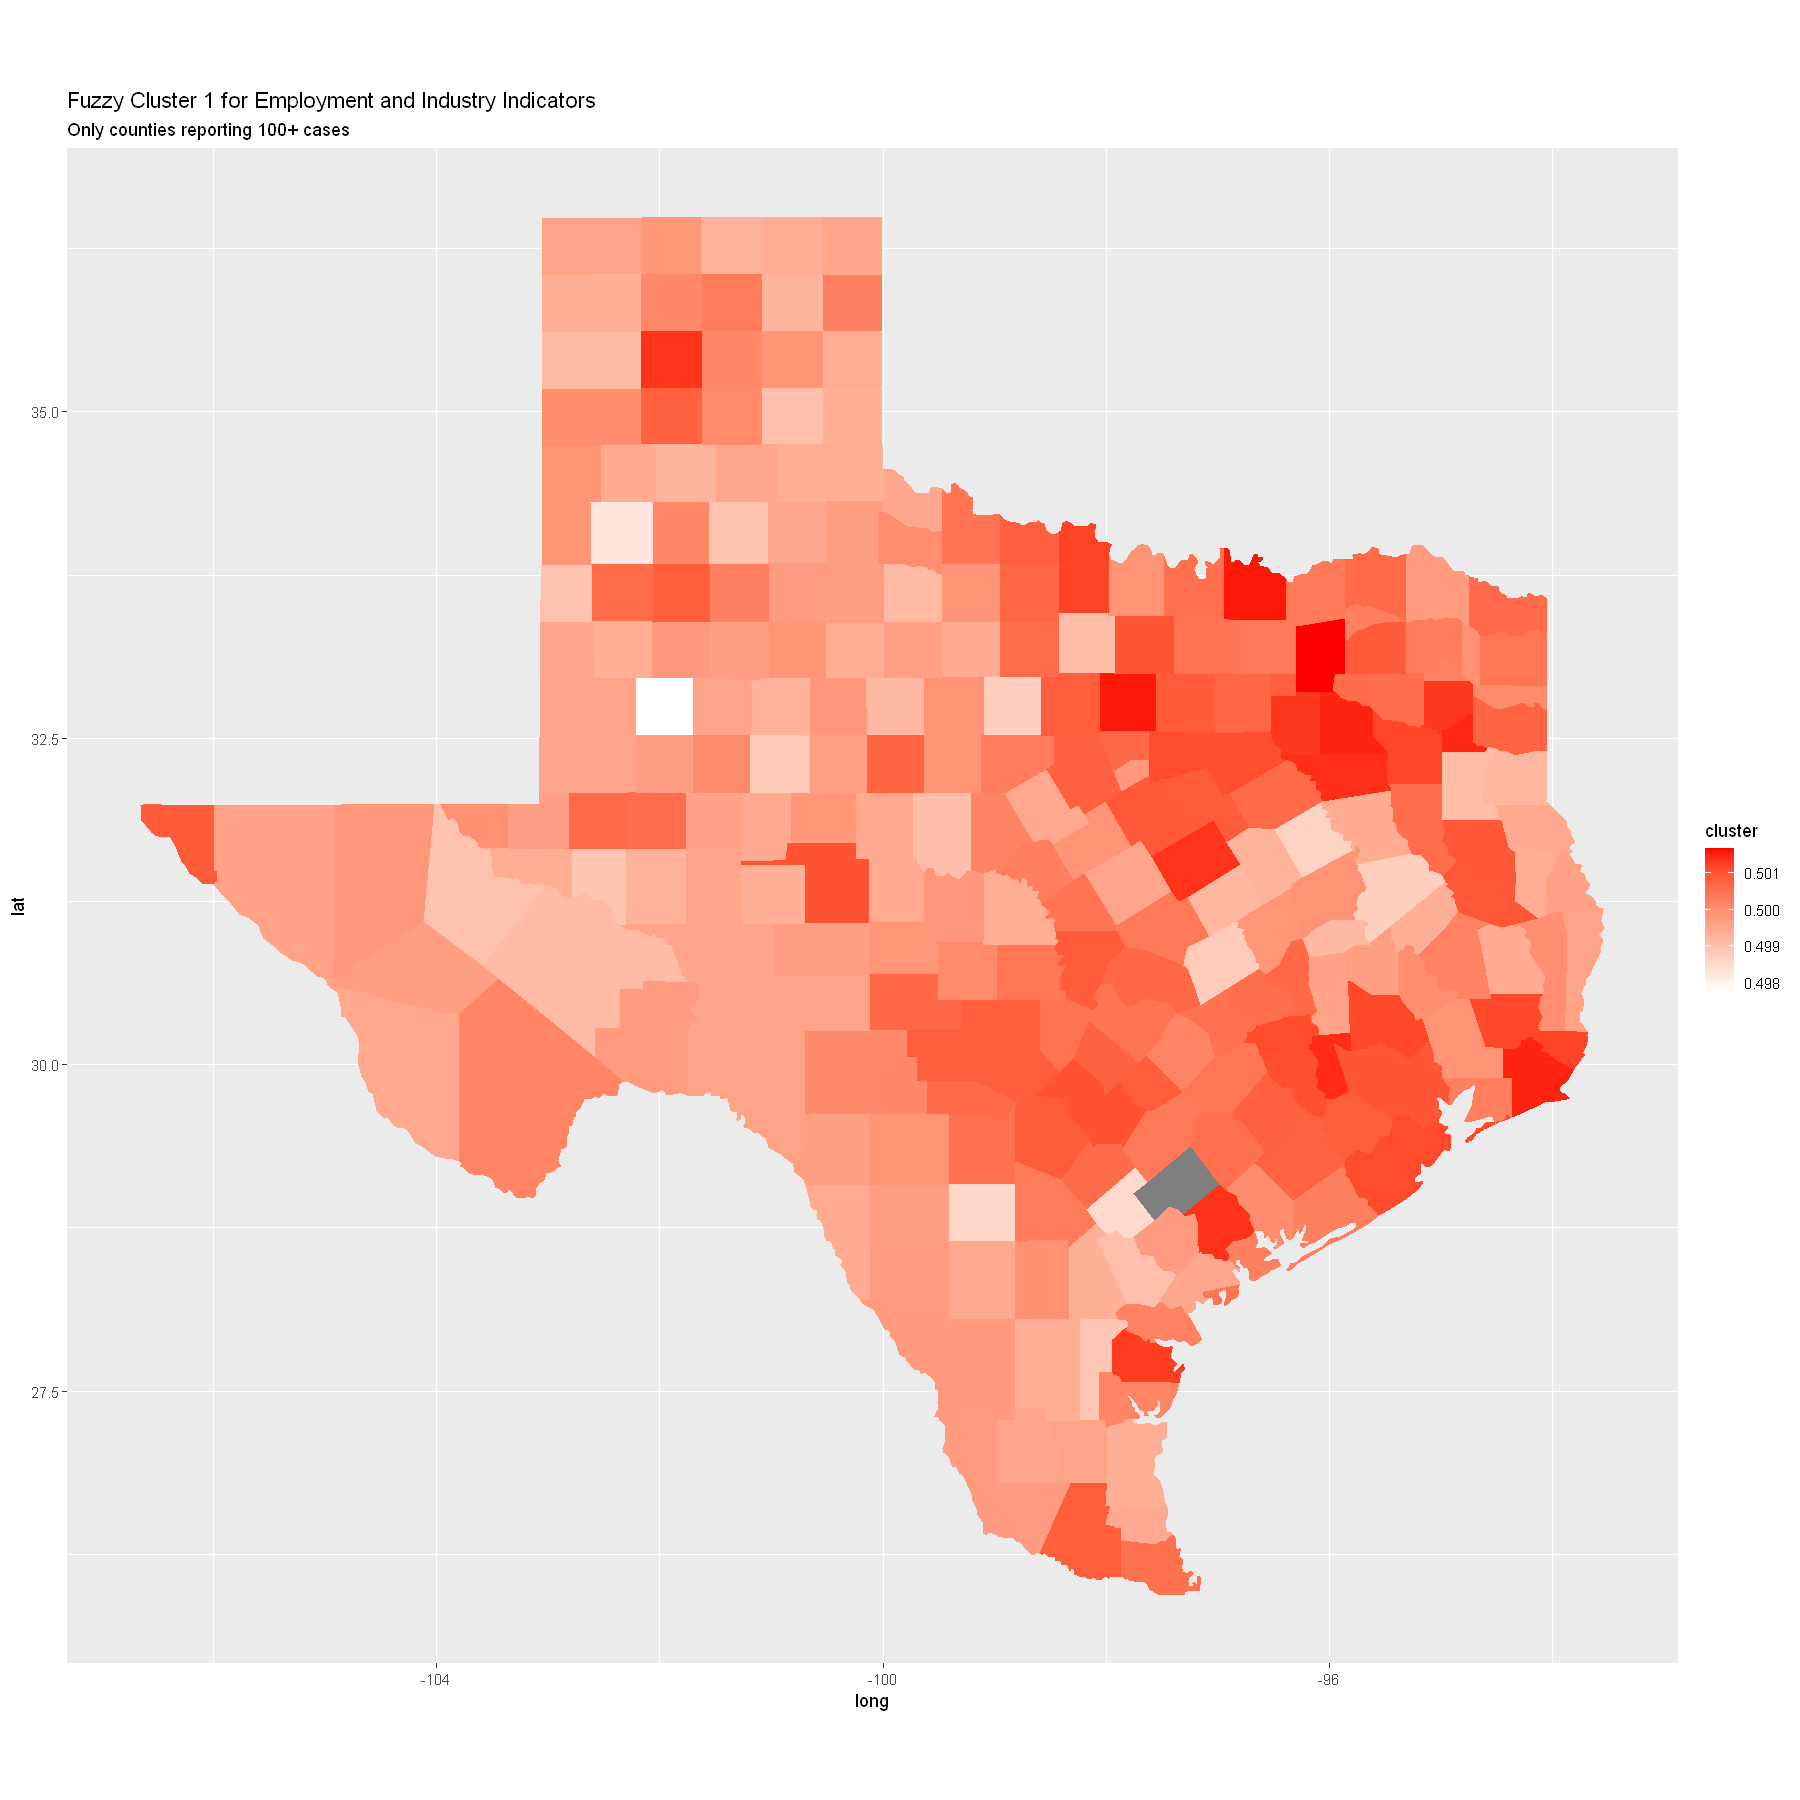

In [581]:
ggplot(fc_clust_1, aes(long, lat)) + 
  geom_polygon(data = fc_clust_1, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "red") +
  labs(title = "Fuzzy Cluster 1 for Employment and Industry Indicators", subtitle = "Only counties reporting 100+ cases")

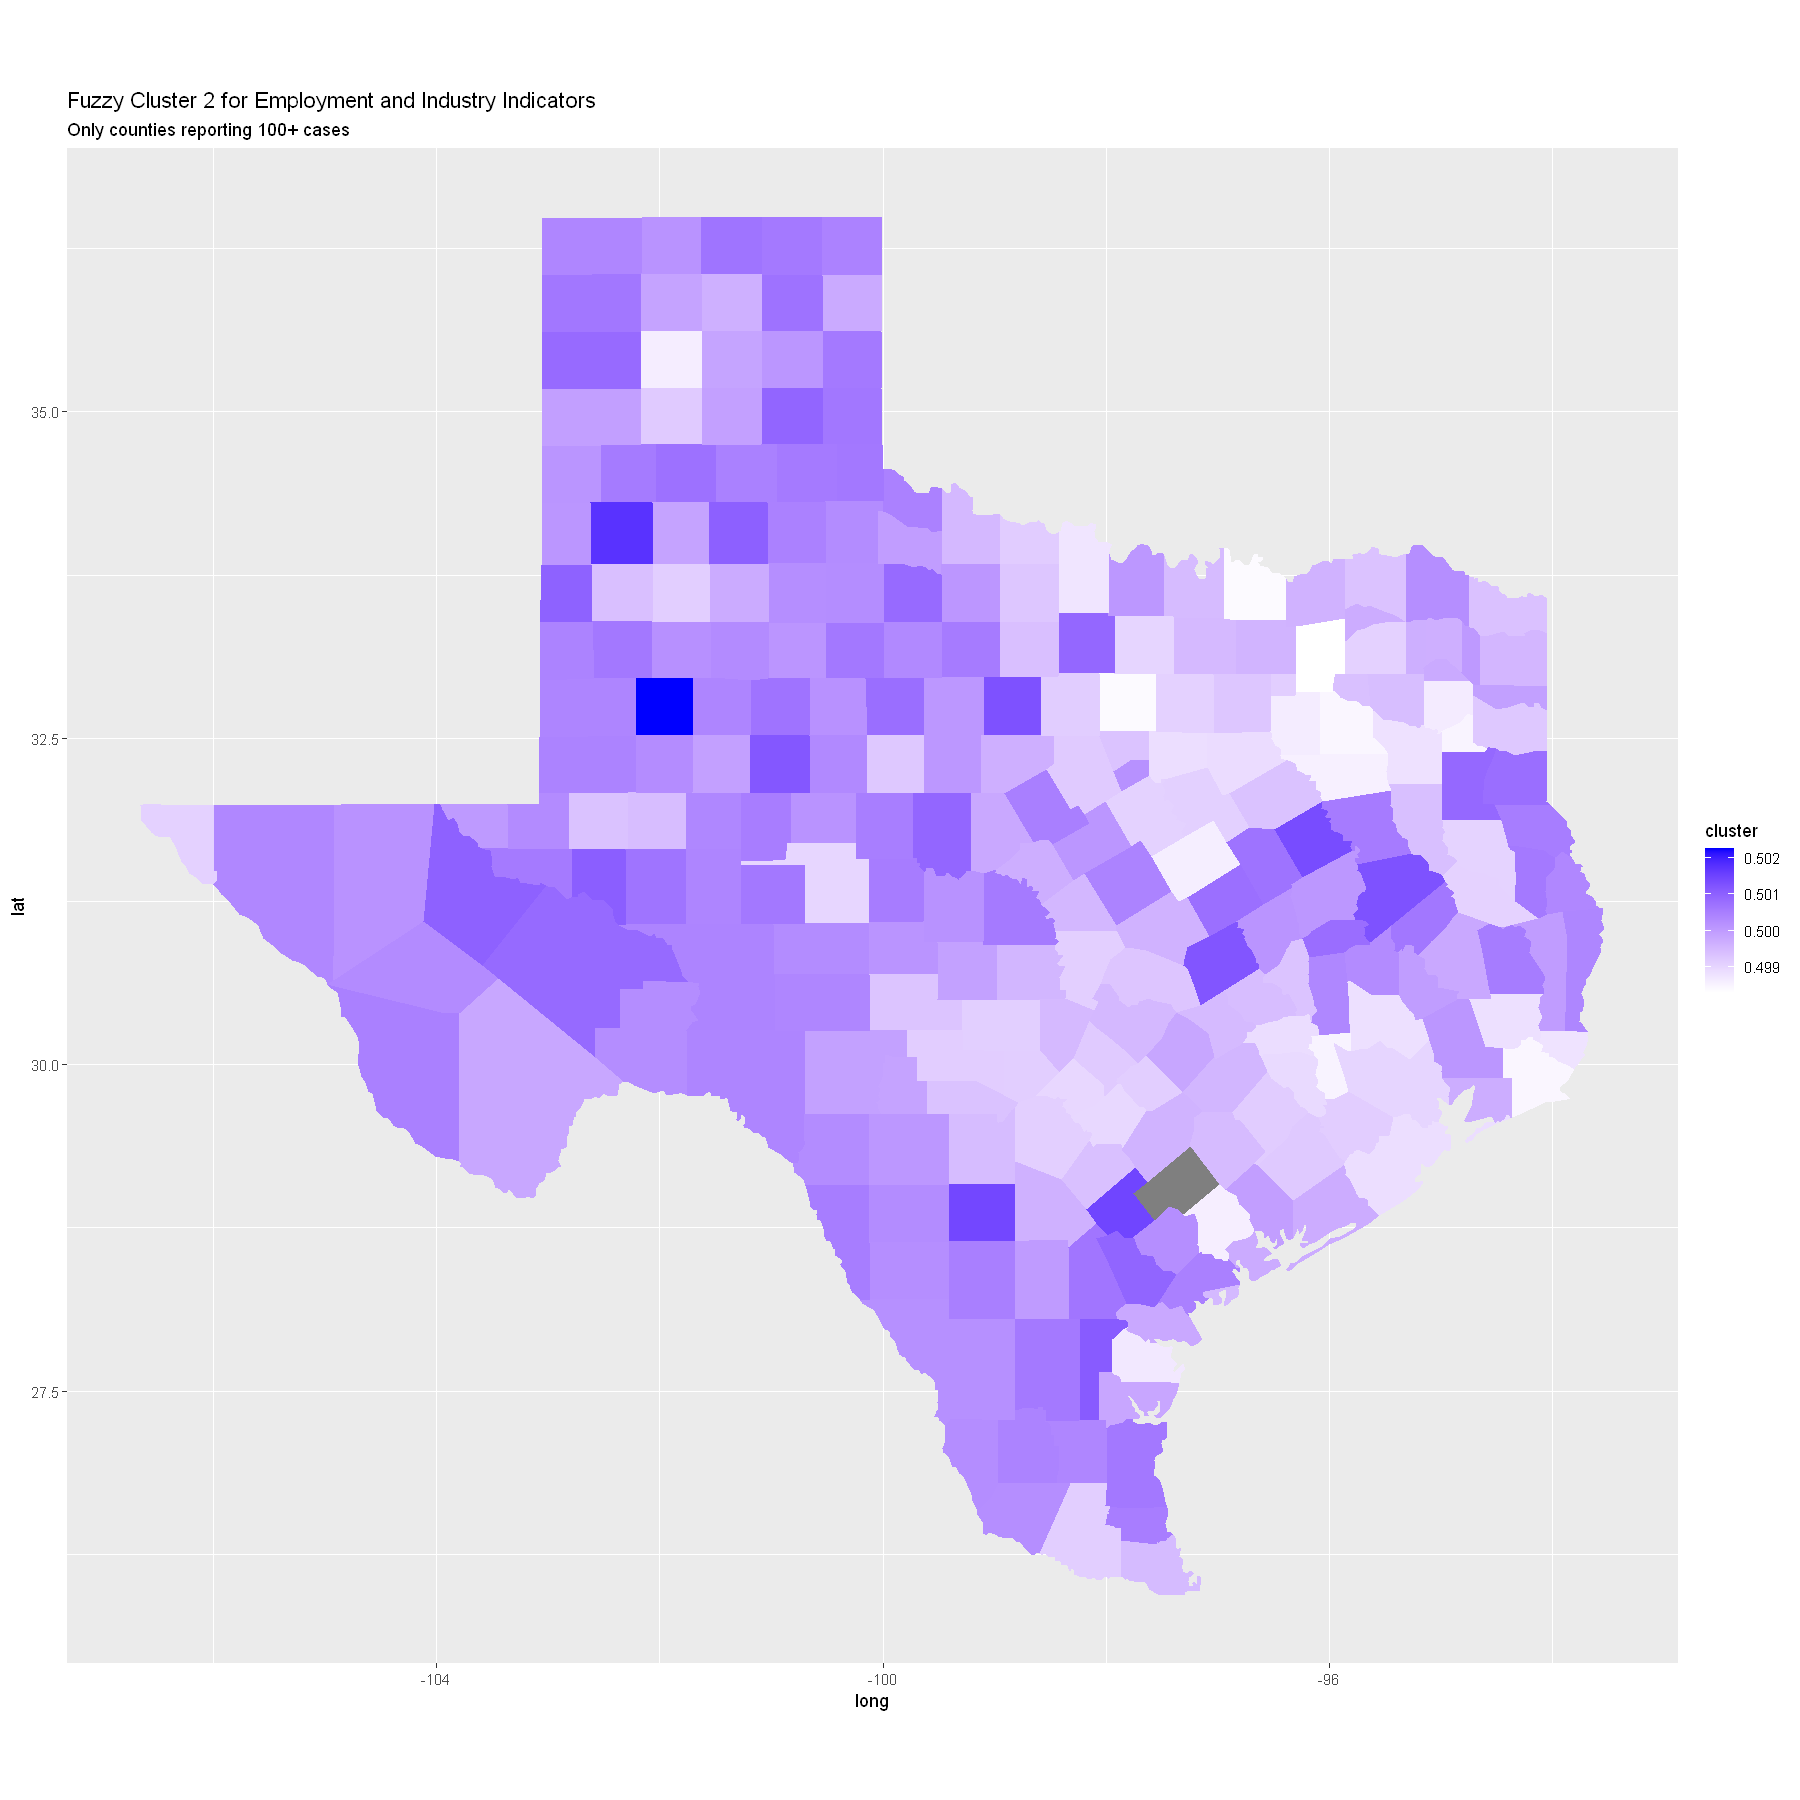

In [582]:
ggplot(fc_clust_2, aes(long, lat)) + 
  geom_polygon(data = fc_clust_2, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "blue") +
  labs(title = "Fuzzy Cluster 2 for Employment and Industry Indicators", subtitle = "Only counties reporting 100+ cases")

In [583]:
row_max_indices <- apply(fc$membership, 1, which.max)

emp_data_hc <- emp_data %>% add_column(cluster = row_max_indices)

emp_data_hc %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<int>,<dbl>,<dbl>,<dbl>
1,73.87158,1.546464,0.02192454
2,82.04245,2.159108,0.02741984


### Fuzzy Cluster Observations
+ this one wasn't very good
+ 2 clusters, but all the values are between 0.499 and 0.502

# Partitioning Around Medoids (PAM) Clustering

In [585]:
dist_emp <- dist(emp_data_prepped)
p <- pam(dist_emp, k=6)
emp_data_p <- emp_data_prepped %>% add_column(cluster = factor(p$cluster))
counties_TX_p <- counties_TX %>% left_join(emp_data %>% add_column(cluster = emp_data_p$cluster))

Joining, by = "county"


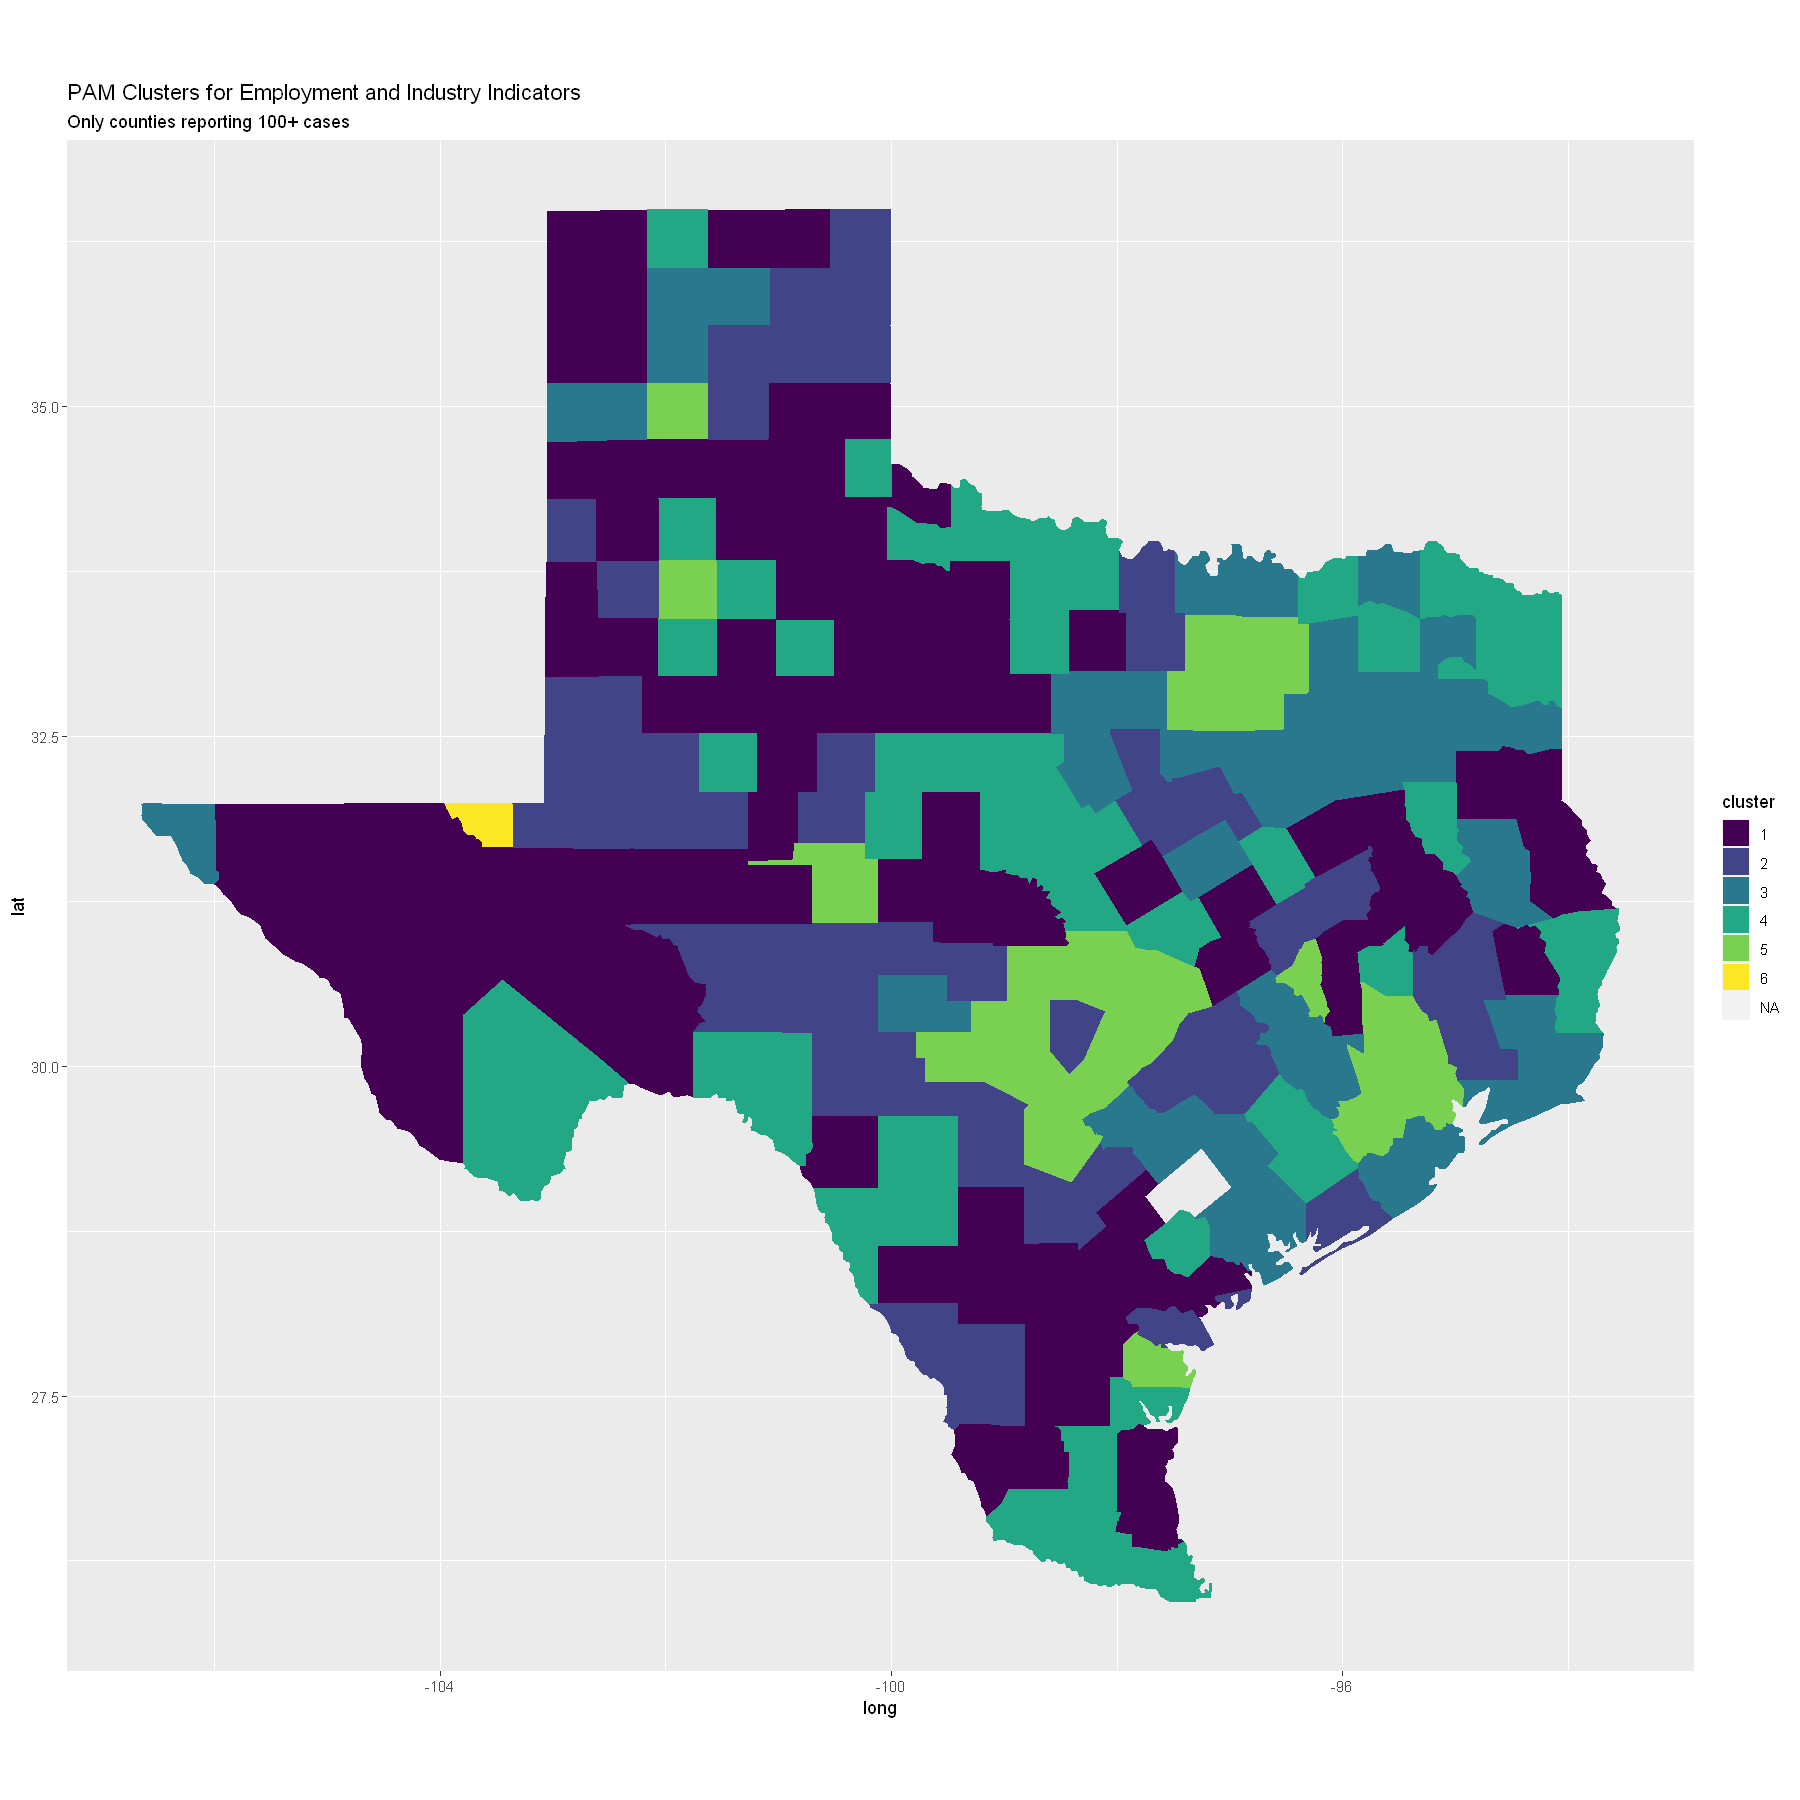

In [586]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_p, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "PAM Clusters for Employment and Industry Indicators", subtitle = "Only counties reporting 100+ cases")

In [587]:
emp_data_p <- emp_data %>% add_column(cluster = factor(p$cluster))

emp_data_p %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,80.49132,2.175474,0.02776256
2,75.11414,1.756629,0.02428818
3,76.61126,1.500856,0.02024057
4,80.57968,2.150840,0.02918129
5,74.79488,1.028214,0.01444183
6,13.51351,0.000000,0.00000000


### PAM Observations
+ 6 is weird
+ 5 has low deaths per case